Machine learning techniques 
Suppose a company wants to know what will be
the rowth in sales figure if they spemd 100$ on
TV advertisemen,35$ on FM advertisement and 75$ on NEWS PAPER advertisement.

Since year 200 the company has the database of each months advertise expenditure and sales growth figure

# Developing a classification ALgorithm : Single Layer Perceptron (SLP) 1957


In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E://Programs/MACHINE LEARNING WITH PYTHON-GLOBSYN/datasets/iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df[:3]

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
df["class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [6]:
df["type"]=(df["class"]=='Iris-versicolor').astype(np.int64)  #to conver to 0 and 1

In [7]:
df["type"]=np.where(df["class"]=='Iris-versicolor',1,-1) #this is equal to the C ternary operator

In [8]:
df.type.value_counts()

-1    100
 1     50
Name: type, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
type           150 non-null int32
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


In [10]:
df1=df.drop("class",axis=1)

In [11]:
train=df1.sample(frac=.8,random_state=42)

In [12]:
test=df1.drop(train.index)

In [13]:
train.shape

(120, 5)

In [14]:
test.shape

(30, 5)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
type           150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
data=df1.values #taking the data into an ndarray0
data


array([[ 5.1,  3.5,  1.4,  0.2, -1. ],
       [ 4.9,  3. ,  1.4,  0.2, -1. ],
       [ 4.7,  3.2,  1.3,  0.2, -1. ],
       [ 4.6,  3.1,  1.5,  0.2, -1. ],
       [ 5. ,  3.6,  1.4,  0.2, -1. ],
       [ 5.4,  3.9,  1.7,  0.4, -1. ],
       [ 4.6,  3.4,  1.4,  0.3, -1. ],
       [ 5. ,  3.4,  1.5,  0.2, -1. ],
       [ 4.4,  2.9,  1.4,  0.2, -1. ],
       [ 4.9,  3.1,  1.5,  0.1, -1. ],
       [ 5.4,  3.7,  1.5,  0.2, -1. ],
       [ 4.8,  3.4,  1.6,  0.2, -1. ],
       [ 4.8,  3. ,  1.4,  0.1, -1. ],
       [ 4.3,  3. ,  1.1,  0.1, -1. ],
       [ 5.8,  4. ,  1.2,  0.2, -1. ],
       [ 5.7,  4.4,  1.5,  0.4, -1. ],
       [ 5.4,  3.9,  1.3,  0.4, -1. ],
       [ 5.1,  3.5,  1.4,  0.3, -1. ],
       [ 5.7,  3.8,  1.7,  0.3, -1. ],
       [ 5.1,  3.8,  1.5,  0.3, -1. ],
       [ 5.4,  3.4,  1.7,  0.2, -1. ],
       [ 5.1,  3.7,  1.5,  0.4, -1. ],
       [ 4.6,  3.6,  1. ,  0.2, -1. ],
       [ 5.1,  3.3,  1.7,  0.5, -1. ],
       [ 4.8,  3.4,  1.9,  0.2, -1. ],
       [ 5. ,  3. ,  1.6,

In [17]:
np.random.shuffle(data)
data

array([[ 4.8,  3.1,  1.6,  0.2, -1. ],
       [ 7.2,  3.2,  6. ,  1.8, -1. ],
       [ 4.6,  3.6,  1. ,  0.2, -1. ],
       [ 7.7,  2.6,  6.9,  2.3, -1. ],
       [ 6.5,  3.2,  5.1,  2. , -1. ],
       [ 5. ,  3.4,  1.6,  0.4, -1. ],
       [ 5.2,  2.7,  3.9,  1.4,  1. ],
       [ 6.4,  2.8,  5.6,  2.1, -1. ],
       [ 4.4,  3. ,  1.3,  0.2, -1. ],
       [ 6.3,  3.3,  4.7,  1.6,  1. ],
       [ 6.1,  3. ,  4.6,  1.4,  1. ],
       [ 7.4,  2.8,  6.1,  1.9, -1. ],
       [ 6.3,  2.5,  4.9,  1.5,  1. ],
       [ 5.7,  4.4,  1.5,  0.4, -1. ],
       [ 6.7,  2.5,  5.8,  1.8, -1. ],
       [ 6.3,  2.9,  5.6,  1.8, -1. ],
       [ 6.7,  3.1,  4.7,  1.5,  1. ],
       [ 7.2,  3.6,  6.1,  2.5, -1. ],
       [ 4.4,  2.9,  1.4,  0.2, -1. ],
       [ 5.6,  3. ,  4.1,  1.3,  1. ],
       [ 4.8,  3.4,  1.9,  0.2, -1. ],
       [ 6.7,  3.3,  5.7,  2.5, -1. ],
       [ 5.5,  2.6,  4.4,  1.2,  1. ],
       [ 6.3,  2.5,  5. ,  1.9, -1. ],
       [ 6.3,  2.7,  4.9,  1.8, -1. ],
       [ 5.4,  3.9,  1.3,

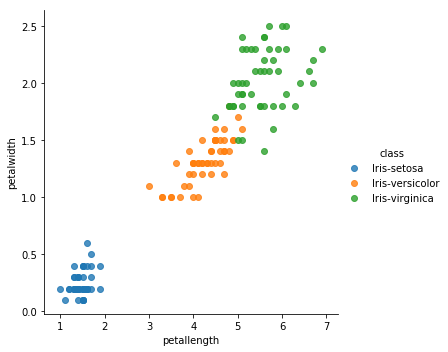

In [18]:
sns.lmplot("petallength","petalwidth",hue="class",data=df,fit_reg=False)

In machine learning we have to basically find a line which divides our data sets and that line has an equation of the form 
c0 + c1 *x + c2 *y = 0
the c0,c1 and c2 are called weights


In [19]:
w=np.array([10,20,30],dtype=np.double)
w[1:]
M=np.array([[1,2],[30,40],[5,6]],dtype=np.double)
M

array([[ 1.,  2.],
       [30., 40.],
       [ 5.,  6.]])

In [20]:
M.dot(w[1:])+w[0]

array([  90., 1810.,  290.])

In [21]:
vec1=np.array([10,20,30,40])
np.nonzero(vec1)

(array([0, 1, 2, 3], dtype=int64),)

In [22]:
Xtrain=train.values[:,:-1]
#Xtrain, sliced array with the first3 columns as the last one contains 1 or -1

In [23]:
ytrain=train.values[:,-1]
#Ytrain contains only 1 or -1 as this is our kinda label

In [55]:
def train_weights(xtrain,ytrain,learningrate=.1,nepoch=100000):
    weights=np.random.random(xtrain.shape[1]+1)
    for epoch in range(nepoch):
        value=xtrain.dot(weights[1:])+weights[0]
        yhat=np.where(value >0,1,-1)
        incorrect=np.nonzero(ytrain!= yhat)[0]
        if len(incorrect)==0:
            break;
        update=learningrate*(ytrain-yhat) #in machine learning algorithms learn from error
        for i,r in enumerate(xtrain):
            weights[1:] += update[i]*r
            weights[0] += update[i]
        print("epoch{} ,error {}".format(epoch,len(incorrect)))
    return weights


In [42]:
Xtest=test.values[:,:-1]
ytest=test.values[:,-1]

In [43]:
def predict(data,weights):
    value=data.dot(weights[1:])+weights[0]
    yhat=np.where(value>0,1,-1)
    return yhat

In [44]:
Xtest=test.values[:,:-1]
ytest=test.values[:,-1]

In [56]:
weights=train_weights(Xtrain,ytrain)

epoch0 ,error 81
epoch1 ,error 39
epoch2 ,error 39
epoch3 ,error 38
epoch4 ,error 39
epoch5 ,error 39
epoch6 ,error 81
epoch7 ,error 39
epoch8 ,error 55
epoch9 ,error 81
epoch10 ,error 39
epoch11 ,error 39
epoch12 ,error 81
epoch13 ,error 39
epoch14 ,error 39
epoch15 ,error 81
epoch16 ,error 39
epoch17 ,error 39
epoch18 ,error 77
epoch19 ,error 39
epoch20 ,error 39
epoch21 ,error 80
epoch22 ,error 39
epoch23 ,error 39
epoch24 ,error 77
epoch25 ,error 39
epoch26 ,error 42
epoch27 ,error 71
epoch28 ,error 39
epoch29 ,error 71
epoch30 ,error 42
epoch31 ,error 68
epoch32 ,error 39
epoch33 ,error 59
epoch34 ,error 39
epoch35 ,error 38
epoch36 ,error 39
epoch37 ,error 38
epoch38 ,error 39
epoch39 ,error 40
epoch40 ,error 39
epoch41 ,error 59
epoch42 ,error 39
epoch43 ,error 38
epoch44 ,error 39
epoch45 ,error 38
epoch46 ,error 39
epoch47 ,error 38
epoch48 ,error 39
epoch49 ,error 54
epoch50 ,error 38
epoch51 ,error 39
epoch52 ,error 52
epoch53 ,error 38
epoch54 ,error 39
epoch55 ,error 47
ep

epoch602 ,error 36
epoch603 ,error 39
epoch604 ,error 65
epoch605 ,error 39
epoch606 ,error 34
epoch607 ,error 44
epoch608 ,error 39
epoch609 ,error 35
epoch610 ,error 38
epoch611 ,error 65
epoch612 ,error 39
epoch613 ,error 33
epoch614 ,error 40
epoch615 ,error 39
epoch616 ,error 39
epoch617 ,error 39
epoch618 ,error 40
epoch619 ,error 39
epoch620 ,error 39
epoch621 ,error 39
epoch622 ,error 41
epoch623 ,error 39
epoch624 ,error 38
epoch625 ,error 39
epoch626 ,error 52
epoch627 ,error 39
epoch628 ,error 24
epoch629 ,error 25
epoch630 ,error 25
epoch631 ,error 24
epoch632 ,error 27
epoch633 ,error 27
epoch634 ,error 35
epoch635 ,error 38
epoch636 ,error 76
epoch637 ,error 39
epoch638 ,error 40
epoch639 ,error 71
epoch640 ,error 39
epoch641 ,error 36
epoch642 ,error 59
epoch643 ,error 39
epoch644 ,error 30
epoch645 ,error 38
epoch646 ,error 39
epoch647 ,error 41
epoch648 ,error 39
epoch649 ,error 39
epoch650 ,error 39
epoch651 ,error 40
epoch652 ,error 39
epoch653 ,error 41
epoch654 ,er

epoch1055 ,error 51
epoch1056 ,error 39
epoch1057 ,error 24
epoch1058 ,error 32
epoch1059 ,error 49
epoch1060 ,error 39
epoch1061 ,error 33
epoch1062 ,error 39
epoch1063 ,error 71
epoch1064 ,error 39
epoch1065 ,error 33
epoch1066 ,error 49
epoch1067 ,error 39
epoch1068 ,error 29
epoch1069 ,error 39
epoch1070 ,error 62
epoch1071 ,error 39
epoch1072 ,error 31
epoch1073 ,error 37
epoch1074 ,error 39
epoch1075 ,error 43
epoch1076 ,error 39
epoch1077 ,error 34
epoch1078 ,error 39
epoch1079 ,error 49
epoch1080 ,error 39
epoch1081 ,error 29
epoch1082 ,error 38
epoch1083 ,error 62
epoch1084 ,error 39
epoch1085 ,error 33
epoch1086 ,error 42
epoch1087 ,error 39
epoch1088 ,error 33
epoch1089 ,error 39
epoch1090 ,error 54
epoch1091 ,error 39
epoch1092 ,error 25
epoch1093 ,error 26
epoch1094 ,error 27
epoch1095 ,error 33
epoch1096 ,error 53
epoch1097 ,error 39
epoch1098 ,error 24
epoch1099 ,error 25
epoch1100 ,error 29
epoch1101 ,error 34
epoch1102 ,error 54
epoch1103 ,error 39
epoch1104 ,error 25


epoch1470 ,error 39
epoch1471 ,error 42
epoch1472 ,error 39
epoch1473 ,error 40
epoch1474 ,error 39
epoch1475 ,error 42
epoch1476 ,error 39
epoch1477 ,error 41
epoch1478 ,error 39
epoch1479 ,error 41
epoch1480 ,error 39
epoch1481 ,error 41
epoch1482 ,error 39
epoch1483 ,error 41
epoch1484 ,error 39
epoch1485 ,error 41
epoch1486 ,error 39
epoch1487 ,error 41
epoch1488 ,error 39
epoch1489 ,error 41
epoch1490 ,error 39
epoch1491 ,error 43
epoch1492 ,error 39
epoch1493 ,error 38
epoch1494 ,error 39
epoch1495 ,error 49
epoch1496 ,error 39
epoch1497 ,error 33
epoch1498 ,error 38
epoch1499 ,error 65
epoch1500 ,error 39
epoch1501 ,error 31
epoch1502 ,error 42
epoch1503 ,error 39
epoch1504 ,error 39
epoch1505 ,error 39
epoch1506 ,error 44
epoch1507 ,error 39
epoch1508 ,error 37
epoch1509 ,error 39
epoch1510 ,error 48
epoch1511 ,error 39
epoch1512 ,error 32
epoch1513 ,error 39
epoch1514 ,error 67
epoch1515 ,error 39
epoch1516 ,error 31
epoch1517 ,error 41
epoch1518 ,error 39
epoch1519 ,error 40


epoch2053 ,error 39
epoch2054 ,error 35
epoch2055 ,error 37
epoch2056 ,error 51
epoch2057 ,error 39
epoch2058 ,error 33
epoch2059 ,error 38
epoch2060 ,error 54
epoch2061 ,error 39
epoch2062 ,error 24
epoch2063 ,error 28
epoch2064 ,error 35
epoch2065 ,error 39
epoch2066 ,error 54
epoch2067 ,error 39
epoch2068 ,error 27
epoch2069 ,error 33
epoch2070 ,error 39
epoch2071 ,error 38
epoch2072 ,error 42
epoch2073 ,error 38
epoch2074 ,error 39
epoch2075 ,error 38
epoch2076 ,error 42
epoch2077 ,error 38
epoch2078 ,error 40
epoch2079 ,error 38
epoch2080 ,error 40
epoch2081 ,error 38
epoch2082 ,error 42
epoch2083 ,error 38
epoch2084 ,error 38
epoch2085 ,error 38
epoch2086 ,error 46
epoch2087 ,error 39
epoch2088 ,error 34
epoch2089 ,error 37
epoch2090 ,error 48
epoch2091 ,error 39
epoch2092 ,error 35
epoch2093 ,error 37
epoch2094 ,error 48
epoch2095 ,error 39
epoch2096 ,error 35
epoch2097 ,error 37
epoch2098 ,error 51
epoch2099 ,error 39
epoch2100 ,error 33
epoch2101 ,error 39
epoch2102 ,error 50


epoch2524 ,error 40
epoch2525 ,error 37
epoch2526 ,error 41
epoch2527 ,error 37
epoch2528 ,error 38
epoch2529 ,error 38
epoch2530 ,error 40
epoch2531 ,error 37
epoch2532 ,error 41
epoch2533 ,error 37
epoch2534 ,error 38
epoch2535 ,error 38
epoch2536 ,error 40
epoch2537 ,error 37
epoch2538 ,error 41
epoch2539 ,error 37
epoch2540 ,error 38
epoch2541 ,error 38
epoch2542 ,error 40
epoch2543 ,error 37
epoch2544 ,error 41
epoch2545 ,error 37
epoch2546 ,error 38
epoch2547 ,error 38
epoch2548 ,error 40
epoch2549 ,error 37
epoch2550 ,error 41
epoch2551 ,error 37
epoch2552 ,error 38
epoch2553 ,error 38
epoch2554 ,error 40
epoch2555 ,error 37
epoch2556 ,error 41
epoch2557 ,error 37
epoch2558 ,error 38
epoch2559 ,error 38
epoch2560 ,error 40
epoch2561 ,error 37
epoch2562 ,error 41
epoch2563 ,error 37
epoch2564 ,error 38
epoch2565 ,error 38
epoch2566 ,error 40
epoch2567 ,error 37
epoch2568 ,error 41
epoch2569 ,error 37
epoch2570 ,error 38
epoch2571 ,error 38
epoch2572 ,error 40
epoch2573 ,error 37


epoch3170 ,error 41
epoch3171 ,error 38
epoch3172 ,error 38
epoch3173 ,error 39
epoch3174 ,error 41
epoch3175 ,error 38
epoch3176 ,error 38
epoch3177 ,error 39
epoch3178 ,error 40
epoch3179 ,error 38
epoch3180 ,error 40
epoch3181 ,error 38
epoch3182 ,error 39
epoch3183 ,error 39
epoch3184 ,error 40
epoch3185 ,error 38
epoch3186 ,error 40
epoch3187 ,error 39
epoch3188 ,error 40
epoch3189 ,error 38
epoch3190 ,error 39
epoch3191 ,error 39
epoch3192 ,error 40
epoch3193 ,error 38
epoch3194 ,error 40
epoch3195 ,error 39
epoch3196 ,error 40
epoch3197 ,error 38
epoch3198 ,error 39
epoch3199 ,error 39
epoch3200 ,error 40
epoch3201 ,error 38
epoch3202 ,error 39
epoch3203 ,error 39
epoch3204 ,error 41
epoch3205 ,error 38
epoch3206 ,error 38
epoch3207 ,error 39
epoch3208 ,error 41
epoch3209 ,error 38
epoch3210 ,error 38
epoch3211 ,error 39
epoch3212 ,error 40
epoch3213 ,error 38
epoch3214 ,error 40
epoch3215 ,error 38
epoch3216 ,error 39
epoch3217 ,error 39
epoch3218 ,error 40
epoch3219 ,error 38


epoch3774 ,error 40
epoch3775 ,error 39
epoch3776 ,error 41
epoch3777 ,error 39
epoch3778 ,error 40
epoch3779 ,error 39
epoch3780 ,error 40
epoch3781 ,error 39
epoch3782 ,error 41
epoch3783 ,error 39
epoch3784 ,error 39
epoch3785 ,error 39
epoch3786 ,error 41
epoch3787 ,error 39
epoch3788 ,error 40
epoch3789 ,error 39
epoch3790 ,error 41
epoch3791 ,error 39
epoch3792 ,error 39
epoch3793 ,error 39
epoch3794 ,error 41
epoch3795 ,error 39
epoch3796 ,error 40
epoch3797 ,error 39
epoch3798 ,error 41
epoch3799 ,error 39
epoch3800 ,error 39
epoch3801 ,error 39
epoch3802 ,error 41
epoch3803 ,error 39
epoch3804 ,error 40
epoch3805 ,error 39
epoch3806 ,error 41
epoch3807 ,error 39
epoch3808 ,error 40
epoch3809 ,error 39
epoch3810 ,error 40
epoch3811 ,error 39
epoch3812 ,error 41
epoch3813 ,error 39
epoch3814 ,error 39
epoch3815 ,error 39
epoch3816 ,error 41
epoch3817 ,error 39
epoch3818 ,error 40
epoch3819 ,error 39
epoch3820 ,error 41
epoch3821 ,error 39
epoch3822 ,error 39
epoch3823 ,error 39


epoch4334 ,error 35
epoch4335 ,error 37
epoch4336 ,error 41
epoch4337 ,error 39
epoch4338 ,error 37
epoch4339 ,error 37
epoch4340 ,error 41
epoch4341 ,error 38
epoch4342 ,error 37
epoch4343 ,error 37
epoch4344 ,error 41
epoch4345 ,error 38
epoch4346 ,error 37
epoch4347 ,error 37
epoch4348 ,error 41
epoch4349 ,error 38
epoch4350 ,error 37
epoch4351 ,error 37
epoch4352 ,error 40
epoch4353 ,error 39
epoch4354 ,error 36
epoch4355 ,error 37
epoch4356 ,error 41
epoch4357 ,error 39
epoch4358 ,error 34
epoch4359 ,error 35
epoch4360 ,error 41
epoch4361 ,error 39
epoch4362 ,error 33
epoch4363 ,error 37
epoch4364 ,error 39
epoch4365 ,error 39
epoch4366 ,error 41
epoch4367 ,error 39
epoch4368 ,error 34
epoch4369 ,error 35
epoch4370 ,error 41
epoch4371 ,error 38
epoch4372 ,error 39
epoch4373 ,error 39
epoch4374 ,error 41
epoch4375 ,error 39
epoch4376 ,error 34
epoch4377 ,error 35
epoch4378 ,error 41
epoch4379 ,error 38
epoch4380 ,error 39
epoch4381 ,error 39
epoch4382 ,error 41
epoch4383 ,error 39


epoch4845 ,error 37
epoch4846 ,error 41
epoch4847 ,error 38
epoch4848 ,error 37
epoch4849 ,error 38
epoch4850 ,error 41
epoch4851 ,error 39
epoch4852 ,error 37
epoch4853 ,error 38
epoch4854 ,error 41
epoch4855 ,error 39
epoch4856 ,error 36
epoch4857 ,error 37
epoch4858 ,error 41
epoch4859 ,error 39
epoch4860 ,error 34
epoch4861 ,error 37
epoch4862 ,error 41
epoch4863 ,error 39
epoch4864 ,error 40
epoch4865 ,error 39
epoch4866 ,error 41
epoch4867 ,error 39
epoch4868 ,error 41
epoch4869 ,error 39
epoch4870 ,error 37
epoch4871 ,error 37
epoch4872 ,error 41
epoch4873 ,error 38
epoch4874 ,error 37
epoch4875 ,error 37
epoch4876 ,error 41
epoch4877 ,error 38
epoch4878 ,error 37
epoch4879 ,error 37
epoch4880 ,error 41
epoch4881 ,error 38
epoch4882 ,error 37
epoch4883 ,error 38
epoch4884 ,error 41
epoch4885 ,error 39
epoch4886 ,error 37
epoch4887 ,error 38
epoch4888 ,error 41
epoch4889 ,error 39
epoch4890 ,error 36
epoch4891 ,error 37
epoch4892 ,error 41
epoch4893 ,error 39
epoch4894 ,error 33


epoch5289 ,error 37
epoch5290 ,error 41
epoch5291 ,error 39
epoch5292 ,error 35
epoch5293 ,error 37
epoch5294 ,error 41
epoch5295 ,error 39
epoch5296 ,error 39
epoch5297 ,error 39
epoch5298 ,error 41
epoch5299 ,error 39
epoch5300 ,error 35
epoch5301 ,error 37
epoch5302 ,error 41
epoch5303 ,error 39
epoch5304 ,error 38
epoch5305 ,error 38
epoch5306 ,error 41
epoch5307 ,error 39
epoch5308 ,error 34
epoch5309 ,error 37
epoch5310 ,error 41
epoch5311 ,error 39
epoch5312 ,error 40
epoch5313 ,error 39
epoch5314 ,error 41
epoch5315 ,error 38
epoch5316 ,error 37
epoch5317 ,error 38
epoch5318 ,error 41
epoch5319 ,error 39
epoch5320 ,error 36
epoch5321 ,error 37
epoch5322 ,error 41
epoch5323 ,error 39
epoch5324 ,error 36
epoch5325 ,error 37
epoch5326 ,error 41
epoch5327 ,error 39
epoch5328 ,error 36
epoch5329 ,error 37
epoch5330 ,error 41
epoch5331 ,error 39
epoch5332 ,error 36
epoch5333 ,error 37
epoch5334 ,error 41
epoch5335 ,error 39
epoch5336 ,error 35
epoch5337 ,error 37
epoch5338 ,error 41


epoch5714 ,error 41
epoch5715 ,error 39
epoch5716 ,error 33
epoch5717 ,error 36
epoch5718 ,error 41
epoch5719 ,error 39
epoch5720 ,error 39
epoch5721 ,error 39
epoch5722 ,error 41
epoch5723 ,error 39
epoch5724 ,error 36
epoch5725 ,error 37
epoch5726 ,error 41
epoch5727 ,error 39
epoch5728 ,error 35
epoch5729 ,error 37
epoch5730 ,error 41
epoch5731 ,error 39
epoch5732 ,error 39
epoch5733 ,error 39
epoch5734 ,error 41
epoch5735 ,error 39
epoch5736 ,error 36
epoch5737 ,error 37
epoch5738 ,error 41
epoch5739 ,error 39
epoch5740 ,error 34
epoch5741 ,error 37
epoch5742 ,error 41
epoch5743 ,error 39
epoch5744 ,error 39
epoch5745 ,error 38
epoch5746 ,error 41
epoch5747 ,error 39
epoch5748 ,error 33
epoch5749 ,error 36
epoch5750 ,error 41
epoch5751 ,error 39
epoch5752 ,error 39
epoch5753 ,error 39
epoch5754 ,error 41
epoch5755 ,error 39
epoch5756 ,error 35
epoch5757 ,error 37
epoch5758 ,error 41
epoch5759 ,error 39
epoch5760 ,error 39
epoch5761 ,error 39
epoch5762 ,error 41
epoch5763 ,error 39


epoch6224 ,error 37
epoch6225 ,error 38
epoch6226 ,error 41
epoch6227 ,error 39
epoch6228 ,error 36
epoch6229 ,error 38
epoch6230 ,error 41
epoch6231 ,error 39
epoch6232 ,error 38
epoch6233 ,error 38
epoch6234 ,error 41
epoch6235 ,error 39
epoch6236 ,error 35
epoch6237 ,error 37
epoch6238 ,error 41
epoch6239 ,error 39
epoch6240 ,error 38
epoch6241 ,error 38
epoch6242 ,error 41
epoch6243 ,error 39
epoch6244 ,error 35
epoch6245 ,error 37
epoch6246 ,error 41
epoch6247 ,error 39
epoch6248 ,error 38
epoch6249 ,error 38
epoch6250 ,error 41
epoch6251 ,error 39
epoch6252 ,error 34
epoch6253 ,error 37
epoch6254 ,error 41
epoch6255 ,error 39
epoch6256 ,error 40
epoch6257 ,error 39
epoch6258 ,error 41
epoch6259 ,error 39
epoch6260 ,error 33
epoch6261 ,error 36
epoch6262 ,error 41
epoch6263 ,error 39
epoch6264 ,error 38
epoch6265 ,error 38
epoch6266 ,error 41
epoch6267 ,error 39
epoch6268 ,error 35
epoch6269 ,error 37
epoch6270 ,error 41
epoch6271 ,error 39
epoch6272 ,error 38
epoch6273 ,error 38


epoch6740 ,error 34
epoch6741 ,error 37
epoch6742 ,error 41
epoch6743 ,error 39
epoch6744 ,error 40
epoch6745 ,error 39
epoch6746 ,error 41
epoch6747 ,error 39
epoch6748 ,error 33
epoch6749 ,error 36
epoch6750 ,error 41
epoch6751 ,error 39
epoch6752 ,error 38
epoch6753 ,error 38
epoch6754 ,error 41
epoch6755 ,error 39
epoch6756 ,error 35
epoch6757 ,error 37
epoch6758 ,error 41
epoch6759 ,error 39
epoch6760 ,error 38
epoch6761 ,error 38
epoch6762 ,error 41
epoch6763 ,error 39
epoch6764 ,error 35
epoch6765 ,error 37
epoch6766 ,error 41
epoch6767 ,error 39
epoch6768 ,error 38
epoch6769 ,error 38
epoch6770 ,error 41
epoch6771 ,error 39
epoch6772 ,error 34
epoch6773 ,error 37
epoch6774 ,error 41
epoch6775 ,error 39
epoch6776 ,error 39
epoch6777 ,error 38
epoch6778 ,error 41
epoch6779 ,error 39
epoch6780 ,error 33
epoch6781 ,error 36
epoch6782 ,error 41
epoch6783 ,error 39
epoch6784 ,error 38
epoch6785 ,error 38
epoch6786 ,error 41
epoch6787 ,error 39
epoch6788 ,error 35
epoch6789 ,error 37


epoch7220 ,error 37
epoch7221 ,error 38
epoch7222 ,error 41
epoch7223 ,error 39
epoch7224 ,error 37
epoch7225 ,error 38
epoch7226 ,error 41
epoch7227 ,error 39
epoch7228 ,error 36
epoch7229 ,error 37
epoch7230 ,error 41
epoch7231 ,error 39
epoch7232 ,error 36
epoch7233 ,error 37
epoch7234 ,error 41
epoch7235 ,error 39
epoch7236 ,error 37
epoch7237 ,error 38
epoch7238 ,error 41
epoch7239 ,error 39
epoch7240 ,error 36
epoch7241 ,error 37
epoch7242 ,error 41
epoch7243 ,error 39
epoch7244 ,error 37
epoch7245 ,error 38
epoch7246 ,error 41
epoch7247 ,error 39
epoch7248 ,error 35
epoch7249 ,error 37
epoch7250 ,error 41
epoch7251 ,error 39
epoch7252 ,error 38
epoch7253 ,error 38
epoch7254 ,error 41
epoch7255 ,error 39
epoch7256 ,error 35
epoch7257 ,error 37
epoch7258 ,error 41
epoch7259 ,error 39
epoch7260 ,error 38
epoch7261 ,error 38
epoch7262 ,error 41
epoch7263 ,error 39
epoch7264 ,error 34
epoch7265 ,error 37
epoch7266 ,error 41
epoch7267 ,error 39
epoch7268 ,error 40
epoch7269 ,error 39


epoch7658 ,error 41
epoch7659 ,error 39
epoch7660 ,error 37
epoch7661 ,error 38
epoch7662 ,error 41
epoch7663 ,error 39
epoch7664 ,error 37
epoch7665 ,error 38
epoch7666 ,error 41
epoch7667 ,error 39
epoch7668 ,error 37
epoch7669 ,error 38
epoch7670 ,error 41
epoch7671 ,error 39
epoch7672 ,error 36
epoch7673 ,error 37
epoch7674 ,error 41
epoch7675 ,error 39
epoch7676 ,error 37
epoch7677 ,error 38
epoch7678 ,error 41
epoch7679 ,error 39
epoch7680 ,error 36
epoch7681 ,error 37
epoch7682 ,error 41
epoch7683 ,error 39
epoch7684 ,error 36
epoch7685 ,error 37
epoch7686 ,error 41
epoch7687 ,error 39
epoch7688 ,error 37
epoch7689 ,error 38
epoch7690 ,error 41
epoch7691 ,error 39
epoch7692 ,error 36
epoch7693 ,error 37
epoch7694 ,error 41
epoch7695 ,error 39
epoch7696 ,error 37
epoch7697 ,error 38
epoch7698 ,error 41
epoch7699 ,error 39
epoch7700 ,error 35
epoch7701 ,error 37
epoch7702 ,error 41
epoch7703 ,error 39
epoch7704 ,error 38
epoch7705 ,error 38
epoch7706 ,error 41
epoch7707 ,error 39


epoch8155 ,error 39
epoch8156 ,error 38
epoch8157 ,error 38
epoch8158 ,error 40
epoch8159 ,error 39
epoch8160 ,error 39
epoch8161 ,error 38
epoch8162 ,error 41
epoch8163 ,error 39
epoch8164 ,error 40
epoch8165 ,error 39
epoch8166 ,error 41
epoch8167 ,error 39
epoch8168 ,error 34
epoch8169 ,error 36
epoch8170 ,error 41
epoch8171 ,error 39
epoch8172 ,error 37
epoch8173 ,error 38
epoch8174 ,error 41
epoch8175 ,error 39
epoch8176 ,error 37
epoch8177 ,error 38
epoch8178 ,error 41
epoch8179 ,error 39
epoch8180 ,error 37
epoch8181 ,error 38
epoch8182 ,error 41
epoch8183 ,error 39
epoch8184 ,error 36
epoch8185 ,error 38
epoch8186 ,error 41
epoch8187 ,error 39
epoch8188 ,error 38
epoch8189 ,error 38
epoch8190 ,error 40
epoch8191 ,error 39
epoch8192 ,error 39
epoch8193 ,error 38
epoch8194 ,error 41
epoch8195 ,error 39
epoch8196 ,error 40
epoch8197 ,error 38
epoch8198 ,error 41
epoch8199 ,error 39
epoch8200 ,error 39
epoch8201 ,error 38
epoch8202 ,error 41
epoch8203 ,error 39
epoch8204 ,error 33


epoch8650 ,error 39
epoch8651 ,error 38
epoch8652 ,error 41
epoch8653 ,error 39
epoch8654 ,error 40
epoch8655 ,error 38
epoch8656 ,error 41
epoch8657 ,error 39
epoch8658 ,error 40
epoch8659 ,error 38
epoch8660 ,error 41
epoch8661 ,error 39
epoch8662 ,error 39
epoch8663 ,error 38
epoch8664 ,error 41
epoch8665 ,error 39
epoch8666 ,error 32
epoch8667 ,error 33
epoch8668 ,error 35
epoch8669 ,error 37
epoch8670 ,error 41
epoch8671 ,error 39
epoch8672 ,error 38
epoch8673 ,error 38
epoch8674 ,error 41
epoch8675 ,error 39
epoch8676 ,error 40
epoch8677 ,error 38
epoch8678 ,error 41
epoch8679 ,error 39
epoch8680 ,error 40
epoch8681 ,error 38
epoch8682 ,error 40
epoch8683 ,error 38
epoch8684 ,error 40
epoch8685 ,error 39
epoch8686 ,error 40
epoch8687 ,error 39
epoch8688 ,error 38
epoch8689 ,error 38
epoch8690 ,error 41
epoch8691 ,error 39
epoch8692 ,error 34
epoch8693 ,error 36
epoch8694 ,error 41
epoch8695 ,error 39
epoch8696 ,error 35
epoch8697 ,error 37
epoch8698 ,error 41
epoch8699 ,error 39


epoch9293 ,error 35
epoch9294 ,error 40
epoch9295 ,error 39
epoch9296 ,error 38
epoch9297 ,error 38
epoch9298 ,error 40
epoch9299 ,error 39
epoch9300 ,error 38
epoch9301 ,error 38
epoch9302 ,error 40
epoch9303 ,error 39
epoch9304 ,error 38
epoch9305 ,error 38
epoch9306 ,error 41
epoch9307 ,error 39
epoch9308 ,error 35
epoch9309 ,error 35
epoch9310 ,error 40
epoch9311 ,error 39
epoch9312 ,error 38
epoch9313 ,error 38
epoch9314 ,error 40
epoch9315 ,error 39
epoch9316 ,error 38
epoch9317 ,error 38
epoch9318 ,error 40
epoch9319 ,error 39
epoch9320 ,error 38
epoch9321 ,error 38
epoch9322 ,error 41
epoch9323 ,error 39
epoch9324 ,error 35
epoch9325 ,error 35
epoch9326 ,error 40
epoch9327 ,error 39
epoch9328 ,error 38
epoch9329 ,error 38
epoch9330 ,error 40
epoch9331 ,error 39
epoch9332 ,error 38
epoch9333 ,error 38
epoch9334 ,error 40
epoch9335 ,error 39
epoch9336 ,error 38
epoch9337 ,error 38
epoch9338 ,error 41
epoch9339 ,error 39
epoch9340 ,error 35
epoch9341 ,error 35
epoch9342 ,error 40


epoch9769 ,error 39
epoch9770 ,error 38
epoch9771 ,error 38
epoch9772 ,error 41
epoch9773 ,error 39
epoch9774 ,error 36
epoch9775 ,error 37
epoch9776 ,error 41
epoch9777 ,error 39
epoch9778 ,error 36
epoch9779 ,error 38
epoch9780 ,error 41
epoch9781 ,error 39
epoch9782 ,error 38
epoch9783 ,error 38
epoch9784 ,error 40
epoch9785 ,error 39
epoch9786 ,error 39
epoch9787 ,error 38
epoch9788 ,error 39
epoch9789 ,error 39
epoch9790 ,error 39
epoch9791 ,error 39
epoch9792 ,error 39
epoch9793 ,error 38
epoch9794 ,error 41
epoch9795 ,error 39
epoch9796 ,error 35
epoch9797 ,error 35
epoch9798 ,error 39
epoch9799 ,error 38
epoch9800 ,error 40
epoch9801 ,error 39
epoch9802 ,error 38
epoch9803 ,error 38
epoch9804 ,error 40
epoch9805 ,error 39
epoch9806 ,error 38
epoch9807 ,error 38
epoch9808 ,error 41
epoch9809 ,error 39
epoch9810 ,error 35
epoch9811 ,error 35
epoch9812 ,error 39
epoch9813 ,error 38
epoch9814 ,error 40
epoch9815 ,error 39
epoch9816 ,error 38
epoch9817 ,error 38
epoch9818 ,error 41


epoch10277 ,error 35
epoch10278 ,error 39
epoch10279 ,error 38
epoch10280 ,error 40
epoch10281 ,error 39
epoch10282 ,error 38
epoch10283 ,error 38
epoch10284 ,error 40
epoch10285 ,error 39
epoch10286 ,error 38
epoch10287 ,error 38
epoch10288 ,error 41
epoch10289 ,error 39
epoch10290 ,error 36
epoch10291 ,error 37
epoch10292 ,error 41
epoch10293 ,error 39
epoch10294 ,error 36
epoch10295 ,error 37
epoch10296 ,error 40
epoch10297 ,error 39
epoch10298 ,error 39
epoch10299 ,error 38
epoch10300 ,error 40
epoch10301 ,error 39
epoch10302 ,error 38
epoch10303 ,error 38
epoch10304 ,error 40
epoch10305 ,error 39
epoch10306 ,error 38
epoch10307 ,error 38
epoch10308 ,error 40
epoch10309 ,error 39
epoch10310 ,error 38
epoch10311 ,error 38
epoch10312 ,error 41
epoch10313 ,error 39
epoch10314 ,error 36
epoch10315 ,error 37
epoch10316 ,error 41
epoch10317 ,error 39
epoch10318 ,error 36
epoch10319 ,error 37
epoch10320 ,error 41
epoch10321 ,error 39
epoch10322 ,error 36
epoch10323 ,error 37
epoch10324 ,e

epoch10830 ,error 38
epoch10831 ,error 38
epoch10832 ,error 39
epoch10833 ,error 38
epoch10834 ,error 40
epoch10835 ,error 39
epoch10836 ,error 38
epoch10837 ,error 38
epoch10838 ,error 41
epoch10839 ,error 39
epoch10840 ,error 35
epoch10841 ,error 35
epoch10842 ,error 39
epoch10843 ,error 38
epoch10844 ,error 40
epoch10845 ,error 39
epoch10846 ,error 38
epoch10847 ,error 38
epoch10848 ,error 41
epoch10849 ,error 39
epoch10850 ,error 36
epoch10851 ,error 36
epoch10852 ,error 39
epoch10853 ,error 38
epoch10854 ,error 40
epoch10855 ,error 39
epoch10856 ,error 39
epoch10857 ,error 38
epoch10858 ,error 38
epoch10859 ,error 38
epoch10860 ,error 39
epoch10861 ,error 38
epoch10862 ,error 41
epoch10863 ,error 39
epoch10864 ,error 35
epoch10865 ,error 35
epoch10866 ,error 39
epoch10867 ,error 38
epoch10868 ,error 40
epoch10869 ,error 39
epoch10870 ,error 38
epoch10871 ,error 38
epoch10872 ,error 40
epoch10873 ,error 39
epoch10874 ,error 38
epoch10875 ,error 38
epoch10876 ,error 41
epoch10877 ,e

epoch11530 ,error 38
epoch11531 ,error 38
epoch11532 ,error 39
epoch11533 ,error 38
epoch11534 ,error 39
epoch11535 ,error 38
epoch11536 ,error 38
epoch11537 ,error 38
epoch11538 ,error 40
epoch11539 ,error 39
epoch11540 ,error 38
epoch11541 ,error 38
epoch11542 ,error 41
epoch11543 ,error 39
epoch11544 ,error 36
epoch11545 ,error 35
epoch11546 ,error 38
epoch11547 ,error 38
epoch11548 ,error 40
epoch11549 ,error 39
epoch11550 ,error 39
epoch11551 ,error 38
epoch11552 ,error 38
epoch11553 ,error 38
epoch11554 ,error 39
epoch11555 ,error 38
epoch11556 ,error 39
epoch11557 ,error 38
epoch11558 ,error 38
epoch11559 ,error 38
epoch11560 ,error 40
epoch11561 ,error 39
epoch11562 ,error 38
epoch11563 ,error 38
epoch11564 ,error 41
epoch11565 ,error 39
epoch11566 ,error 36
epoch11567 ,error 35
epoch11568 ,error 38
epoch11569 ,error 38
epoch11570 ,error 40
epoch11571 ,error 39
epoch11572 ,error 39
epoch11573 ,error 38
epoch11574 ,error 38
epoch11575 ,error 38
epoch11576 ,error 39
epoch11577 ,e

epoch12071 ,error 39
epoch12072 ,error 39
epoch12073 ,error 38
epoch12074 ,error 38
epoch12075 ,error 38
epoch12076 ,error 38
epoch12077 ,error 38
epoch12078 ,error 39
epoch12079 ,error 38
epoch12080 ,error 39
epoch12081 ,error 38
epoch12082 ,error 37
epoch12083 ,error 35
epoch12084 ,error 38
epoch12085 ,error 38
epoch12086 ,error 39
epoch12087 ,error 38
epoch12088 ,error 38
epoch12089 ,error 38
epoch12090 ,error 39
epoch12091 ,error 38
epoch12092 ,error 38
epoch12093 ,error 38
epoch12094 ,error 40
epoch12095 ,error 39
epoch12096 ,error 39
epoch12097 ,error 38
epoch12098 ,error 38
epoch12099 ,error 38
epoch12100 ,error 38
epoch12101 ,error 38
epoch12102 ,error 39
epoch12103 ,error 38
epoch12104 ,error 39
epoch12105 ,error 38
epoch12106 ,error 37
epoch12107 ,error 35
epoch12108 ,error 38
epoch12109 ,error 38
epoch12110 ,error 39
epoch12111 ,error 38
epoch12112 ,error 38
epoch12113 ,error 38
epoch12114 ,error 39
epoch12115 ,error 38
epoch12116 ,error 38
epoch12117 ,error 38
epoch12118 ,e

epoch12528 ,error 38
epoch12529 ,error 38
epoch12530 ,error 38
epoch12531 ,error 38
epoch12532 ,error 39
epoch12533 ,error 38
epoch12534 ,error 38
epoch12535 ,error 38
epoch12536 ,error 38
epoch12537 ,error 38
epoch12538 ,error 39
epoch12539 ,error 38
epoch12540 ,error 39
epoch12541 ,error 38
epoch12542 ,error 37
epoch12543 ,error 36
epoch12544 ,error 38
epoch12545 ,error 38
epoch12546 ,error 38
epoch12547 ,error 38
epoch12548 ,error 38
epoch12549 ,error 37
epoch12550 ,error 39
epoch12551 ,error 39
epoch12552 ,error 39
epoch12553 ,error 38
epoch12554 ,error 39
epoch12555 ,error 38
epoch12556 ,error 37
epoch12557 ,error 35
epoch12558 ,error 37
epoch12559 ,error 35
epoch12560 ,error 38
epoch12561 ,error 38
epoch12562 ,error 40
epoch12563 ,error 39
epoch12564 ,error 37
epoch12565 ,error 36
epoch12566 ,error 38
epoch12567 ,error 38
epoch12568 ,error 38
epoch12569 ,error 38
epoch12570 ,error 39
epoch12571 ,error 38
epoch12572 ,error 38
epoch12573 ,error 38
epoch12574 ,error 38
epoch12575 ,e

epoch13028 ,error 39
epoch13029 ,error 38
epoch13030 ,error 36
epoch13031 ,error 35
epoch13032 ,error 38
epoch13033 ,error 38
epoch13034 ,error 39
epoch13035 ,error 38
epoch13036 ,error 39
epoch13037 ,error 39
epoch13038 ,error 38
epoch13039 ,error 38
epoch13040 ,error 38
epoch13041 ,error 37
epoch13042 ,error 38
epoch13043 ,error 38
epoch13044 ,error 38
epoch13045 ,error 38
epoch13046 ,error 38
epoch13047 ,error 37
epoch13048 ,error 39
epoch13049 ,error 39
epoch13050 ,error 39
epoch13051 ,error 38
epoch13052 ,error 39
epoch13053 ,error 38
epoch13054 ,error 37
epoch13055 ,error 36
epoch13056 ,error 38
epoch13057 ,error 38
epoch13058 ,error 38
epoch13059 ,error 38
epoch13060 ,error 38
epoch13061 ,error 37
epoch13062 ,error 39
epoch13063 ,error 39
epoch13064 ,error 39
epoch13065 ,error 38
epoch13066 ,error 39
epoch13067 ,error 38
epoch13068 ,error 37
epoch13069 ,error 36
epoch13070 ,error 38
epoch13071 ,error 38
epoch13072 ,error 38
epoch13073 ,error 38
epoch13074 ,error 38
epoch13075 ,e

epoch13527 ,error 38
epoch13528 ,error 38
epoch13529 ,error 38
epoch13530 ,error 37
epoch13531 ,error 35
epoch13532 ,error 38
epoch13533 ,error 37
epoch13534 ,error 39
epoch13535 ,error 39
epoch13536 ,error 38
epoch13537 ,error 38
epoch13538 ,error 37
epoch13539 ,error 35
epoch13540 ,error 39
epoch13541 ,error 38
epoch13542 ,error 39
epoch13543 ,error 39
epoch13544 ,error 38
epoch13545 ,error 38
epoch13546 ,error 37
epoch13547 ,error 35
epoch13548 ,error 39
epoch13549 ,error 38
epoch13550 ,error 39
epoch13551 ,error 39
epoch13552 ,error 38
epoch13553 ,error 38
epoch13554 ,error 38
epoch13555 ,error 37
epoch13556 ,error 39
epoch13557 ,error 39
epoch13558 ,error 38
epoch13559 ,error 38
epoch13560 ,error 37
epoch13561 ,error 35
epoch13562 ,error 37
epoch13563 ,error 35
epoch13564 ,error 38
epoch13565 ,error 38
epoch13566 ,error 37
epoch13567 ,error 35
epoch13568 ,error 39
epoch13569 ,error 38
epoch13570 ,error 39
epoch13571 ,error 39
epoch13572 ,error 38
epoch13573 ,error 38
epoch13574 ,e

epoch14026 ,error 39
epoch14027 ,error 39
epoch14028 ,error 38
epoch14029 ,error 38
epoch14030 ,error 38
epoch14031 ,error 38
epoch14032 ,error 37
epoch14033 ,error 36
epoch14034 ,error 39
epoch14035 ,error 39
epoch14036 ,error 38
epoch14037 ,error 38
epoch14038 ,error 38
epoch14039 ,error 38
epoch14040 ,error 37
epoch14041 ,error 35
epoch14042 ,error 37
epoch14043 ,error 38
epoch14044 ,error 38
epoch14045 ,error 38
epoch14046 ,error 38
epoch14047 ,error 38
epoch14048 ,error 37
epoch14049 ,error 35
epoch14050 ,error 37
epoch14051 ,error 38
epoch14052 ,error 38
epoch14053 ,error 38
epoch14054 ,error 38
epoch14055 ,error 38
epoch14056 ,error 36
epoch14057 ,error 37
epoch14058 ,error 39
epoch14059 ,error 39
epoch14060 ,error 38
epoch14061 ,error 38
epoch14062 ,error 37
epoch14063 ,error 38
epoch14064 ,error 38
epoch14065 ,error 38
epoch14066 ,error 38
epoch14067 ,error 38
epoch14068 ,error 37
epoch14069 ,error 36
epoch14070 ,error 39
epoch14071 ,error 39
epoch14072 ,error 38
epoch14073 ,e

epoch14525 ,error 38
epoch14526 ,error 37
epoch14527 ,error 36
epoch14528 ,error 39
epoch14529 ,error 39
epoch14530 ,error 38
epoch14531 ,error 38
epoch14532 ,error 38
epoch14533 ,error 38
epoch14534 ,error 37
epoch14535 ,error 36
epoch14536 ,error 39
epoch14537 ,error 39
epoch14538 ,error 38
epoch14539 ,error 38
epoch14540 ,error 37
epoch14541 ,error 38
epoch14542 ,error 39
epoch14543 ,error 39
epoch14544 ,error 36
epoch14545 ,error 37
epoch14546 ,error 39
epoch14547 ,error 39
epoch14548 ,error 38
epoch14549 ,error 38
epoch14550 ,error 36
epoch14551 ,error 37
epoch14552 ,error 39
epoch14553 ,error 38
epoch14554 ,error 37
epoch14555 ,error 36
epoch14556 ,error 39
epoch14557 ,error 39
epoch14558 ,error 38
epoch14559 ,error 38
epoch14560 ,error 36
epoch14561 ,error 37
epoch14562 ,error 39
epoch14563 ,error 39
epoch14564 ,error 38
epoch14565 ,error 38
epoch14566 ,error 36
epoch14567 ,error 37
epoch14568 ,error 39
epoch14569 ,error 39
epoch14570 ,error 38
epoch14571 ,error 38
epoch14572 ,e

epoch15024 ,error 38
epoch15025 ,error 38
epoch15026 ,error 36
epoch15027 ,error 36
epoch15028 ,error 38
epoch15029 ,error 38
epoch15030 ,error 36
epoch15031 ,error 37
epoch15032 ,error 39
epoch15033 ,error 39
epoch15034 ,error 38
epoch15035 ,error 38
epoch15036 ,error 36
epoch15037 ,error 37
epoch15038 ,error 39
epoch15039 ,error 39
epoch15040 ,error 38
epoch15041 ,error 38
epoch15042 ,error 36
epoch15043 ,error 36
epoch15044 ,error 38
epoch15045 ,error 38
epoch15046 ,error 36
epoch15047 ,error 37
epoch15048 ,error 39
epoch15049 ,error 39
epoch15050 ,error 38
epoch15051 ,error 38
epoch15052 ,error 36
epoch15053 ,error 37
epoch15054 ,error 39
epoch15055 ,error 38
epoch15056 ,error 36
epoch15057 ,error 35
epoch15058 ,error 38
epoch15059 ,error 38
epoch15060 ,error 37
epoch15061 ,error 37
epoch15062 ,error 38
epoch15063 ,error 38
epoch15064 ,error 36
epoch15065 ,error 36
epoch15066 ,error 38
epoch15067 ,error 38
epoch15068 ,error 36
epoch15069 ,error 37
epoch15070 ,error 39
epoch15071 ,e

epoch15523 ,error 39
epoch15524 ,error 36
epoch15525 ,error 36
epoch15526 ,error 40
epoch15527 ,error 39
epoch15528 ,error 36
epoch15529 ,error 36
epoch15530 ,error 40
epoch15531 ,error 39
epoch15532 ,error 36
epoch15533 ,error 36
epoch15534 ,error 40
epoch15535 ,error 39
epoch15536 ,error 37
epoch15537 ,error 36
epoch15538 ,error 38
epoch15539 ,error 38
epoch15540 ,error 37
epoch15541 ,error 37
epoch15542 ,error 38
epoch15543 ,error 38
epoch15544 ,error 37
epoch15545 ,error 37
epoch15546 ,error 38
epoch15547 ,error 38
epoch15548 ,error 37
epoch15549 ,error 37
epoch15550 ,error 38
epoch15551 ,error 38
epoch15552 ,error 37
epoch15553 ,error 37
epoch15554 ,error 38
epoch15555 ,error 38
epoch15556 ,error 37
epoch15557 ,error 37
epoch15558 ,error 38
epoch15559 ,error 38
epoch15560 ,error 36
epoch15561 ,error 36
epoch15562 ,error 37
epoch15563 ,error 37
epoch15564 ,error 38
epoch15565 ,error 38
epoch15566 ,error 36
epoch15567 ,error 36
epoch15568 ,error 38
epoch15569 ,error 38
epoch15570 ,e

epoch16023 ,error 38
epoch16024 ,error 37
epoch16025 ,error 37
epoch16026 ,error 38
epoch16027 ,error 38
epoch16028 ,error 37
epoch16029 ,error 37
epoch16030 ,error 38
epoch16031 ,error 38
epoch16032 ,error 36
epoch16033 ,error 36
epoch16034 ,error 37
epoch16035 ,error 37
epoch16036 ,error 39
epoch16037 ,error 39
epoch16038 ,error 36
epoch16039 ,error 37
epoch16040 ,error 40
epoch16041 ,error 39
epoch16042 ,error 36
epoch16043 ,error 36
epoch16044 ,error 40
epoch16045 ,error 39
epoch16046 ,error 36
epoch16047 ,error 36
epoch16048 ,error 40
epoch16049 ,error 39
epoch16050 ,error 36
epoch16051 ,error 36
epoch16052 ,error 40
epoch16053 ,error 39
epoch16054 ,error 37
epoch16055 ,error 36
epoch16056 ,error 38
epoch16057 ,error 38
epoch16058 ,error 37
epoch16059 ,error 37
epoch16060 ,error 38
epoch16061 ,error 38
epoch16062 ,error 37
epoch16063 ,error 37
epoch16064 ,error 38
epoch16065 ,error 38
epoch16066 ,error 37
epoch16067 ,error 37
epoch16068 ,error 38
epoch16069 ,error 38
epoch16070 ,e

epoch16416 ,error 36
epoch16417 ,error 36
epoch16418 ,error 37
epoch16419 ,error 37
epoch16420 ,error 39
epoch16421 ,error 39
epoch16422 ,error 35
epoch16423 ,error 36
epoch16424 ,error 39
epoch16425 ,error 39
epoch16426 ,error 37
epoch16427 ,error 37
epoch16428 ,error 38
epoch16429 ,error 38
epoch16430 ,error 36
epoch16431 ,error 36
epoch16432 ,error 36
epoch16433 ,error 36
epoch16434 ,error 37
epoch16435 ,error 37
epoch16436 ,error 39
epoch16437 ,error 39
epoch16438 ,error 36
epoch16439 ,error 37
epoch16440 ,error 40
epoch16441 ,error 39
epoch16442 ,error 36
epoch16443 ,error 36
epoch16444 ,error 39
epoch16445 ,error 39
epoch16446 ,error 34
epoch16447 ,error 36
epoch16448 ,error 40
epoch16449 ,error 39
epoch16450 ,error 33
epoch16451 ,error 33
epoch16452 ,error 36
epoch16453 ,error 37
epoch16454 ,error 39
epoch16455 ,error 39
epoch16456 ,error 37
epoch16457 ,error 37
epoch16458 ,error 38
epoch16459 ,error 38
epoch16460 ,error 37
epoch16461 ,error 37
epoch16462 ,error 38
epoch16463 ,e

epoch16893 ,error 39
epoch16894 ,error 37
epoch16895 ,error 37
epoch16896 ,error 37
epoch16897 ,error 37
epoch16898 ,error 39
epoch16899 ,error 39
epoch16900 ,error 37
epoch16901 ,error 37
epoch16902 ,error 37
epoch16903 ,error 37
epoch16904 ,error 39
epoch16905 ,error 39
epoch16906 ,error 37
epoch16907 ,error 37
epoch16908 ,error 37
epoch16909 ,error 37
epoch16910 ,error 38
epoch16911 ,error 38
epoch16912 ,error 37
epoch16913 ,error 37
epoch16914 ,error 38
epoch16915 ,error 38
epoch16916 ,error 37
epoch16917 ,error 37
epoch16918 ,error 38
epoch16919 ,error 38
epoch16920 ,error 37
epoch16921 ,error 37
epoch16922 ,error 38
epoch16923 ,error 38
epoch16924 ,error 36
epoch16925 ,error 37
epoch16926 ,error 40
epoch16927 ,error 39
epoch16928 ,error 33
epoch16929 ,error 33
epoch16930 ,error 35
epoch16931 ,error 36
epoch16932 ,error 37
epoch16933 ,error 37
epoch16934 ,error 39
epoch16935 ,error 39
epoch16936 ,error 37
epoch16937 ,error 37
epoch16938 ,error 37
epoch16939 ,error 37
epoch16940 ,e

epoch17521 ,error 37
epoch17522 ,error 38
epoch17523 ,error 38
epoch17524 ,error 37
epoch17525 ,error 37
epoch17526 ,error 38
epoch17527 ,error 38
epoch17528 ,error 37
epoch17529 ,error 37
epoch17530 ,error 37
epoch17531 ,error 37
epoch17532 ,error 39
epoch17533 ,error 39
epoch17534 ,error 34
epoch17535 ,error 36
epoch17536 ,error 39
epoch17537 ,error 39
epoch17538 ,error 36
epoch17539 ,error 37
epoch17540 ,error 39
epoch17541 ,error 39
epoch17542 ,error 36
epoch17543 ,error 37
epoch17544 ,error 38
epoch17545 ,error 39
epoch17546 ,error 38
epoch17547 ,error 37
epoch17548 ,error 37
epoch17549 ,error 37
epoch17550 ,error 38
epoch17551 ,error 39
epoch17552 ,error 37
epoch17553 ,error 36
epoch17554 ,error 37
epoch17555 ,error 37
epoch17556 ,error 38
epoch17557 ,error 38
epoch17558 ,error 37
epoch17559 ,error 37
epoch17560 ,error 38
epoch17561 ,error 38
epoch17562 ,error 37
epoch17563 ,error 37
epoch17564 ,error 38
epoch17565 ,error 38
epoch17566 ,error 37
epoch17567 ,error 37
epoch17568 ,e

epoch18020 ,error 37
epoch18021 ,error 37
epoch18022 ,error 38
epoch18023 ,error 38
epoch18024 ,error 37
epoch18025 ,error 37
epoch18026 ,error 37
epoch18027 ,error 37
epoch18028 ,error 39
epoch18029 ,error 39
epoch18030 ,error 34
epoch18031 ,error 36
epoch18032 ,error 39
epoch18033 ,error 39
epoch18034 ,error 36
epoch18035 ,error 37
epoch18036 ,error 39
epoch18037 ,error 39
epoch18038 ,error 36
epoch18039 ,error 37
epoch18040 ,error 39
epoch18041 ,error 39
epoch18042 ,error 36
epoch18043 ,error 37
epoch18044 ,error 38
epoch18045 ,error 39
epoch18046 ,error 38
epoch18047 ,error 37
epoch18048 ,error 37
epoch18049 ,error 37
epoch18050 ,error 37
epoch18051 ,error 39
epoch18052 ,error 37
epoch18053 ,error 37
epoch18054 ,error 37
epoch18055 ,error 37
epoch18056 ,error 38
epoch18057 ,error 39
epoch18058 ,error 37
epoch18059 ,error 36
epoch18060 ,error 37
epoch18061 ,error 37
epoch18062 ,error 38
epoch18063 ,error 37
epoch18064 ,error 37
epoch18065 ,error 37
epoch18066 ,error 37
epoch18067 ,e

epoch18519 ,error 37
epoch18520 ,error 38
epoch18521 ,error 37
epoch18522 ,error 37
epoch18523 ,error 37
epoch18524 ,error 37
epoch18525 ,error 37
epoch18526 ,error 37
epoch18527 ,error 37
epoch18528 ,error 37
epoch18529 ,error 37
epoch18530 ,error 37
epoch18531 ,error 37
epoch18532 ,error 39
epoch18533 ,error 39
epoch18534 ,error 35
epoch18535 ,error 36
epoch18536 ,error 37
epoch18537 ,error 37
epoch18538 ,error 38
epoch18539 ,error 39
epoch18540 ,error 36
epoch18541 ,error 36
epoch18542 ,error 39
epoch18543 ,error 39
epoch18544 ,error 36
epoch18545 ,error 37
epoch18546 ,error 39
epoch18547 ,error 39
epoch18548 ,error 36
epoch18549 ,error 37
epoch18550 ,error 37
epoch18551 ,error 39
epoch18552 ,error 37
epoch18553 ,error 37
epoch18554 ,error 37
epoch18555 ,error 37
epoch18556 ,error 38
epoch18557 ,error 39
epoch18558 ,error 38
epoch18559 ,error 37
epoch18560 ,error 37
epoch18561 ,error 37
epoch18562 ,error 38
epoch18563 ,error 39
epoch18564 ,error 37
epoch18565 ,error 36
epoch18566 ,e

epoch19019 ,error 39
epoch19020 ,error 35
epoch19021 ,error 36
epoch19022 ,error 37
epoch19023 ,error 37
epoch19024 ,error 37
epoch19025 ,error 39
epoch19026 ,error 37
epoch19027 ,error 37
epoch19028 ,error 37
epoch19029 ,error 37
epoch19030 ,error 38
epoch19031 ,error 39
epoch19032 ,error 36
epoch19033 ,error 36
epoch19034 ,error 39
epoch19035 ,error 39
epoch19036 ,error 36
epoch19037 ,error 36
epoch19038 ,error 37
epoch19039 ,error 37
epoch19040 ,error 37
epoch19041 ,error 37
epoch19042 ,error 37
epoch19043 ,error 37
epoch19044 ,error 38
epoch19045 ,error 39
epoch19046 ,error 36
epoch19047 ,error 36
epoch19048 ,error 39
epoch19049 ,error 39
epoch19050 ,error 36
epoch19051 ,error 36
epoch19052 ,error 37
epoch19053 ,error 37
epoch19054 ,error 37
epoch19055 ,error 37
epoch19056 ,error 37
epoch19057 ,error 36
epoch19058 ,error 37
epoch19059 ,error 37
epoch19060 ,error 37
epoch19061 ,error 37
epoch19062 ,error 37
epoch19063 ,error 37
epoch19064 ,error 37
epoch19065 ,error 39
epoch19066 ,e

epoch19518 ,error 37
epoch19519 ,error 37
epoch19520 ,error 37
epoch19521 ,error 37
epoch19522 ,error 37
epoch19523 ,error 37
epoch19524 ,error 37
epoch19525 ,error 36
epoch19526 ,error 37
epoch19527 ,error 37
epoch19528 ,error 37
epoch19529 ,error 37
epoch19530 ,error 37
epoch19531 ,error 37
epoch19532 ,error 38
epoch19533 ,error 39
epoch19534 ,error 36
epoch19535 ,error 36
epoch19536 ,error 39
epoch19537 ,error 39
epoch19538 ,error 35
epoch19539 ,error 36
epoch19540 ,error 37
epoch19541 ,error 36
epoch19542 ,error 37
epoch19543 ,error 37
epoch19544 ,error 37
epoch19545 ,error 37
epoch19546 ,error 37
epoch19547 ,error 37
epoch19548 ,error 38
epoch19549 ,error 39
epoch19550 ,error 36
epoch19551 ,error 36
epoch19552 ,error 39
epoch19553 ,error 39
epoch19554 ,error 35
epoch19555 ,error 36
epoch19556 ,error 37
epoch19557 ,error 36
epoch19558 ,error 37
epoch19559 ,error 37
epoch19560 ,error 37
epoch19561 ,error 37
epoch19562 ,error 37
epoch19563 ,error 37
epoch19564 ,error 37
epoch19565 ,e

epoch19955 ,error 39
epoch19956 ,error 36
epoch19957 ,error 36
epoch19958 ,error 37
epoch19959 ,error 37
epoch19960 ,error 37
epoch19961 ,error 37
epoch19962 ,error 37
epoch19963 ,error 37
epoch19964 ,error 37
epoch19965 ,error 38
epoch19966 ,error 38
epoch19967 ,error 37
epoch19968 ,error 38
epoch19969 ,error 39
epoch19970 ,error 36
epoch19971 ,error 36
epoch19972 ,error 39
epoch19973 ,error 39
epoch19974 ,error 36
epoch19975 ,error 36
epoch19976 ,error 37
epoch19977 ,error 37
epoch19978 ,error 37
epoch19979 ,error 37
epoch19980 ,error 37
epoch19981 ,error 36
epoch19982 ,error 37
epoch19983 ,error 37
epoch19984 ,error 37
epoch19985 ,error 37
epoch19986 ,error 37
epoch19987 ,error 37
epoch19988 ,error 37
epoch19989 ,error 39
epoch19990 ,error 37
epoch19991 ,error 37
epoch19992 ,error 37
epoch19993 ,error 37
epoch19994 ,error 38
epoch19995 ,error 39
epoch19996 ,error 36
epoch19997 ,error 36
epoch19998 ,error 39
epoch19999 ,error 39
epoch20000 ,error 36
epoch20001 ,error 36
epoch20002 ,e

epoch20517 ,error 36
epoch20518 ,error 36
epoch20519 ,error 37
epoch20520 ,error 35
epoch20521 ,error 36
epoch20522 ,error 36
epoch20523 ,error 37
epoch20524 ,error 36
epoch20525 ,error 37
epoch20526 ,error 37
epoch20527 ,error 39
epoch20528 ,error 37
epoch20529 ,error 37
epoch20530 ,error 36
epoch20531 ,error 37
epoch20532 ,error 35
epoch20533 ,error 36
epoch20534 ,error 36
epoch20535 ,error 37
epoch20536 ,error 35
epoch20537 ,error 36
epoch20538 ,error 36
epoch20539 ,error 37
epoch20540 ,error 36
epoch20541 ,error 37
epoch20542 ,error 37
epoch20543 ,error 39
epoch20544 ,error 37
epoch20545 ,error 37
epoch20546 ,error 36
epoch20547 ,error 37
epoch20548 ,error 35
epoch20549 ,error 36
epoch20550 ,error 36
epoch20551 ,error 37
epoch20552 ,error 36
epoch20553 ,error 37
epoch20554 ,error 37
epoch20555 ,error 39
epoch20556 ,error 37
epoch20557 ,error 37
epoch20558 ,error 36
epoch20559 ,error 37
epoch20560 ,error 35
epoch20561 ,error 36
epoch20562 ,error 36
epoch20563 ,error 37
epoch20564 ,e

epoch21275 ,error 36
epoch21276 ,error 36
epoch21277 ,error 37
epoch21278 ,error 36
epoch21279 ,error 37
epoch21280 ,error 36
epoch21281 ,error 37
epoch21282 ,error 36
epoch21283 ,error 37
epoch21284 ,error 38
epoch21285 ,error 39
epoch21286 ,error 36
epoch21287 ,error 36
epoch21288 ,error 38
epoch21289 ,error 39
epoch21290 ,error 36
epoch21291 ,error 36
epoch21292 ,error 40
epoch21293 ,error 39
epoch21294 ,error 33
epoch21295 ,error 33
epoch21296 ,error 36
epoch21297 ,error 37
epoch21298 ,error 36
epoch21299 ,error 37
epoch21300 ,error 37
epoch21301 ,error 37
epoch21302 ,error 37
epoch21303 ,error 37
epoch21304 ,error 36
epoch21305 ,error 37
epoch21306 ,error 37
epoch21307 ,error 37
epoch21308 ,error 37
epoch21309 ,error 37
epoch21310 ,error 37
epoch21311 ,error 37
epoch21312 ,error 36
epoch21313 ,error 37
epoch21314 ,error 37
epoch21315 ,error 37
epoch21316 ,error 37
epoch21317 ,error 37
epoch21318 ,error 37
epoch21319 ,error 37
epoch21320 ,error 36
epoch21321 ,error 37
epoch21322 ,e

epoch21959 ,error 37
epoch21960 ,error 36
epoch21961 ,error 37
epoch21962 ,error 36
epoch21963 ,error 37
epoch21964 ,error 36
epoch21965 ,error 37
epoch21966 ,error 37
epoch21967 ,error 37
epoch21968 ,error 37
epoch21969 ,error 37
epoch21970 ,error 37
epoch21971 ,error 37
epoch21972 ,error 36
epoch21973 ,error 37
epoch21974 ,error 36
epoch21975 ,error 37
epoch21976 ,error 38
epoch21977 ,error 39
epoch21978 ,error 36
epoch21979 ,error 36
epoch21980 ,error 38
epoch21981 ,error 39
epoch21982 ,error 36
epoch21983 ,error 36
epoch21984 ,error 39
epoch21985 ,error 39
epoch21986 ,error 35
epoch21987 ,error 36
epoch21988 ,error 36
epoch21989 ,error 37
epoch21990 ,error 37
epoch21991 ,error 37
epoch21992 ,error 37
epoch21993 ,error 37
epoch21994 ,error 37
epoch21995 ,error 37
epoch21996 ,error 36
epoch21997 ,error 37
epoch21998 ,error 37
epoch21999 ,error 37
epoch22000 ,error 37
epoch22001 ,error 37
epoch22002 ,error 36
epoch22003 ,error 38
epoch22004 ,error 36
epoch22005 ,error 38
epoch22006 ,e

epoch22391 ,error 37
epoch22392 ,error 36
epoch22393 ,error 37
epoch22394 ,error 35
epoch22395 ,error 36
epoch22396 ,error 36
epoch22397 ,error 37
epoch22398 ,error 35
epoch22399 ,error 36
epoch22400 ,error 36
epoch22401 ,error 37
epoch22402 ,error 36
epoch22403 ,error 37
epoch22404 ,error 37
epoch22405 ,error 39
epoch22406 ,error 37
epoch22407 ,error 37
epoch22408 ,error 36
epoch22409 ,error 37
epoch22410 ,error 35
epoch22411 ,error 36
epoch22412 ,error 36
epoch22413 ,error 37
epoch22414 ,error 35
epoch22415 ,error 36
epoch22416 ,error 36
epoch22417 ,error 37
epoch22418 ,error 36
epoch22419 ,error 37
epoch22420 ,error 37
epoch22421 ,error 39
epoch22422 ,error 37
epoch22423 ,error 37
epoch22424 ,error 36
epoch22425 ,error 37
epoch22426 ,error 35
epoch22427 ,error 36
epoch22428 ,error 36
epoch22429 ,error 37
epoch22430 ,error 35
epoch22431 ,error 36
epoch22432 ,error 36
epoch22433 ,error 37
epoch22434 ,error 36
epoch22435 ,error 37
epoch22436 ,error 37
epoch22437 ,error 39
epoch22438 ,e

epoch22972 ,error 37
epoch22973 ,error 37
epoch22974 ,error 36
epoch22975 ,error 37
epoch22976 ,error 35
epoch22977 ,error 36
epoch22978 ,error 36
epoch22979 ,error 37
epoch22980 ,error 35
epoch22981 ,error 36
epoch22982 ,error 36
epoch22983 ,error 37
epoch22984 ,error 36
epoch22985 ,error 37
epoch22986 ,error 37
epoch22987 ,error 39
epoch22988 ,error 37
epoch22989 ,error 37
epoch22990 ,error 36
epoch22991 ,error 37
epoch22992 ,error 35
epoch22993 ,error 36
epoch22994 ,error 36
epoch22995 ,error 37
epoch22996 ,error 35
epoch22997 ,error 36
epoch22998 ,error 36
epoch22999 ,error 37
epoch23000 ,error 36
epoch23001 ,error 37
epoch23002 ,error 37
epoch23003 ,error 39
epoch23004 ,error 37
epoch23005 ,error 37
epoch23006 ,error 36
epoch23007 ,error 37
epoch23008 ,error 35
epoch23009 ,error 36
epoch23010 ,error 36
epoch23011 ,error 37
epoch23012 ,error 35
epoch23013 ,error 36
epoch23014 ,error 36
epoch23015 ,error 37
epoch23016 ,error 36
epoch23017 ,error 37
epoch23018 ,error 37
epoch23019 ,e

epoch23512 ,error 37
epoch23513 ,error 37
epoch23514 ,error 36
epoch23515 ,error 38
epoch23516 ,error 36
epoch23517 ,error 37
epoch23518 ,error 35
epoch23519 ,error 36
epoch23520 ,error 36
epoch23521 ,error 37
epoch23522 ,error 35
epoch23523 ,error 36
epoch23524 ,error 36
epoch23525 ,error 37
epoch23526 ,error 36
epoch23527 ,error 37
epoch23528 ,error 37
epoch23529 ,error 39
epoch23530 ,error 37
epoch23531 ,error 37
epoch23532 ,error 36
epoch23533 ,error 37
epoch23534 ,error 35
epoch23535 ,error 36
epoch23536 ,error 36
epoch23537 ,error 37
epoch23538 ,error 35
epoch23539 ,error 36
epoch23540 ,error 36
epoch23541 ,error 37
epoch23542 ,error 36
epoch23543 ,error 37
epoch23544 ,error 37
epoch23545 ,error 39
epoch23546 ,error 37
epoch23547 ,error 37
epoch23548 ,error 36
epoch23549 ,error 38
epoch23550 ,error 36
epoch23551 ,error 37
epoch23552 ,error 35
epoch23553 ,error 36
epoch23554 ,error 36
epoch23555 ,error 37
epoch23556 ,error 35
epoch23557 ,error 36
epoch23558 ,error 36
epoch23559 ,e

epoch23930 ,error 34
epoch23931 ,error 34
epoch23932 ,error 36
epoch23933 ,error 36
epoch23934 ,error 36
epoch23935 ,error 37
epoch23936 ,error 37
epoch23937 ,error 37
epoch23938 ,error 37
epoch23939 ,error 37
epoch23940 ,error 36
epoch23941 ,error 38
epoch23942 ,error 36
epoch23943 ,error 38
epoch23944 ,error 36
epoch23945 ,error 38
epoch23946 ,error 36
epoch23947 ,error 37
epoch23948 ,error 37
epoch23949 ,error 37
epoch23950 ,error 37
epoch23951 ,error 37
epoch23952 ,error 37
epoch23953 ,error 37
epoch23954 ,error 36
epoch23955 ,error 38
epoch23956 ,error 36
epoch23957 ,error 37
epoch23958 ,error 36
epoch23959 ,error 37
epoch23960 ,error 37
epoch23961 ,error 39
epoch23962 ,error 37
epoch23963 ,error 37
epoch23964 ,error 36
epoch23965 ,error 38
epoch23966 ,error 36
epoch23967 ,error 37
epoch23968 ,error 36
epoch23969 ,error 37
epoch23970 ,error 37
epoch23971 ,error 39
epoch23972 ,error 37
epoch23973 ,error 37
epoch23974 ,error 36
epoch23975 ,error 38
epoch23976 ,error 36
epoch23977 ,e

epoch24367 ,error 37
epoch24368 ,error 35
epoch24369 ,error 36
epoch24370 ,error 36
epoch24371 ,error 37
epoch24372 ,error 35
epoch24373 ,error 36
epoch24374 ,error 36
epoch24375 ,error 37
epoch24376 ,error 36
epoch24377 ,error 37
epoch24378 ,error 37
epoch24379 ,error 39
epoch24380 ,error 37
epoch24381 ,error 37
epoch24382 ,error 36
epoch24383 ,error 38
epoch24384 ,error 36
epoch24385 ,error 37
epoch24386 ,error 35
epoch24387 ,error 36
epoch24388 ,error 36
epoch24389 ,error 37
epoch24390 ,error 35
epoch24391 ,error 36
epoch24392 ,error 36
epoch24393 ,error 37
epoch24394 ,error 36
epoch24395 ,error 37
epoch24396 ,error 37
epoch24397 ,error 39
epoch24398 ,error 37
epoch24399 ,error 37
epoch24400 ,error 36
epoch24401 ,error 38
epoch24402 ,error 36
epoch24403 ,error 37
epoch24404 ,error 35
epoch24405 ,error 36
epoch24406 ,error 36
epoch24407 ,error 37
epoch24408 ,error 35
epoch24409 ,error 36
epoch24410 ,error 36
epoch24411 ,error 37
epoch24412 ,error 36
epoch24413 ,error 37
epoch24414 ,e

epoch25011 ,error 37
epoch25012 ,error 36
epoch25013 ,error 37
epoch25014 ,error 36
epoch25015 ,error 37
epoch25016 ,error 37
epoch25017 ,error 39
epoch25018 ,error 37
epoch25019 ,error 37
epoch25020 ,error 36
epoch25021 ,error 37
epoch25022 ,error 36
epoch25023 ,error 37
epoch25024 ,error 37
epoch25025 ,error 39
epoch25026 ,error 37
epoch25027 ,error 37
epoch25028 ,error 36
epoch25029 ,error 37
epoch25030 ,error 35
epoch25031 ,error 36
epoch25032 ,error 36
epoch25033 ,error 37
epoch25034 ,error 35
epoch25035 ,error 36
epoch25036 ,error 36
epoch25037 ,error 37
epoch25038 ,error 36
epoch25039 ,error 37
epoch25040 ,error 37
epoch25041 ,error 39
epoch25042 ,error 37
epoch25043 ,error 37
epoch25044 ,error 36
epoch25045 ,error 37
epoch25046 ,error 35
epoch25047 ,error 36
epoch25048 ,error 36
epoch25049 ,error 37
epoch25050 ,error 35
epoch25051 ,error 36
epoch25052 ,error 36
epoch25053 ,error 37
epoch25054 ,error 36
epoch25055 ,error 37
epoch25056 ,error 37
epoch25057 ,error 39
epoch25058 ,e

epoch25510 ,error 36
epoch25511 ,error 37
epoch25512 ,error 35
epoch25513 ,error 36
epoch25514 ,error 36
epoch25515 ,error 37
epoch25516 ,error 36
epoch25517 ,error 37
epoch25518 ,error 37
epoch25519 ,error 39
epoch25520 ,error 37
epoch25521 ,error 37
epoch25522 ,error 37
epoch25523 ,error 37
epoch25524 ,error 37
epoch25525 ,error 39
epoch25526 ,error 36
epoch25527 ,error 37
epoch25528 ,error 39
epoch25529 ,error 39
epoch25530 ,error 33
epoch25531 ,error 34
epoch25532 ,error 37
epoch25533 ,error 37
epoch25534 ,error 37
epoch25535 ,error 37
epoch25536 ,error 36
epoch25537 ,error 37
epoch25538 ,error 36
epoch25539 ,error 37
epoch25540 ,error 37
epoch25541 ,error 39
epoch25542 ,error 37
epoch25543 ,error 37
epoch25544 ,error 36
epoch25545 ,error 37
epoch25546 ,error 36
epoch25547 ,error 37
epoch25548 ,error 37
epoch25549 ,error 39
epoch25550 ,error 37
epoch25551 ,error 37
epoch25552 ,error 36
epoch25553 ,error 37
epoch25554 ,error 36
epoch25555 ,error 37
epoch25556 ,error 37
epoch25557 ,e

epoch25901 ,error 36
epoch25902 ,error 36
epoch25903 ,error 37
epoch25904 ,error 35
epoch25905 ,error 36
epoch25906 ,error 36
epoch25907 ,error 37
epoch25908 ,error 36
epoch25909 ,error 37
epoch25910 ,error 37
epoch25911 ,error 39
epoch25912 ,error 37
epoch25913 ,error 37
epoch25914 ,error 36
epoch25915 ,error 37
epoch25916 ,error 35
epoch25917 ,error 36
epoch25918 ,error 36
epoch25919 ,error 37
epoch25920 ,error 35
epoch25921 ,error 36
epoch25922 ,error 36
epoch25923 ,error 37
epoch25924 ,error 36
epoch25925 ,error 37
epoch25926 ,error 37
epoch25927 ,error 39
epoch25928 ,error 37
epoch25929 ,error 37
epoch25930 ,error 36
epoch25931 ,error 37
epoch25932 ,error 35
epoch25933 ,error 36
epoch25934 ,error 36
epoch25935 ,error 37
epoch25936 ,error 35
epoch25937 ,error 36
epoch25938 ,error 36
epoch25939 ,error 37
epoch25940 ,error 36
epoch25941 ,error 37
epoch25942 ,error 37
epoch25943 ,error 39
epoch25944 ,error 37
epoch25945 ,error 37
epoch25946 ,error 36
epoch25947 ,error 37
epoch25948 ,e

epoch26396 ,error 36
epoch26397 ,error 36
epoch26398 ,error 37
epoch26399 ,error 37
epoch26400 ,error 37
epoch26401 ,error 39
epoch26402 ,error 36
epoch26403 ,error 37
epoch26404 ,error 39
epoch26405 ,error 39
epoch26406 ,error 33
epoch26407 ,error 34
epoch26408 ,error 37
epoch26409 ,error 37
epoch26410 ,error 37
epoch26411 ,error 37
epoch26412 ,error 36
epoch26413 ,error 37
epoch26414 ,error 36
epoch26415 ,error 37
epoch26416 ,error 37
epoch26417 ,error 39
epoch26418 ,error 37
epoch26419 ,error 37
epoch26420 ,error 36
epoch26421 ,error 37
epoch26422 ,error 36
epoch26423 ,error 37
epoch26424 ,error 37
epoch26425 ,error 39
epoch26426 ,error 37
epoch26427 ,error 37
epoch26428 ,error 36
epoch26429 ,error 37
epoch26430 ,error 35
epoch26431 ,error 36
epoch26432 ,error 36
epoch26433 ,error 37
epoch26434 ,error 36
epoch26435 ,error 37
epoch26436 ,error 37
epoch26437 ,error 39
epoch26438 ,error 36
epoch26439 ,error 37
epoch26440 ,error 39
epoch26441 ,error 39
epoch26442 ,error 33
epoch26443 ,e

epoch26800 ,error 37
epoch26801 ,error 37
epoch26802 ,error 36
epoch26803 ,error 37
epoch26804 ,error 35
epoch26805 ,error 36
epoch26806 ,error 36
epoch26807 ,error 37
epoch26808 ,error 35
epoch26809 ,error 36
epoch26810 ,error 36
epoch26811 ,error 37
epoch26812 ,error 36
epoch26813 ,error 37
epoch26814 ,error 37
epoch26815 ,error 39
epoch26816 ,error 37
epoch26817 ,error 37
epoch26818 ,error 36
epoch26819 ,error 37
epoch26820 ,error 35
epoch26821 ,error 36
epoch26822 ,error 36
epoch26823 ,error 37
epoch26824 ,error 35
epoch26825 ,error 36
epoch26826 ,error 36
epoch26827 ,error 37
epoch26828 ,error 36
epoch26829 ,error 37
epoch26830 ,error 37
epoch26831 ,error 39
epoch26832 ,error 37
epoch26833 ,error 37
epoch26834 ,error 36
epoch26835 ,error 37
epoch26836 ,error 35
epoch26837 ,error 36
epoch26838 ,error 36
epoch26839 ,error 37
epoch26840 ,error 35
epoch26841 ,error 36
epoch26842 ,error 36
epoch26843 ,error 37
epoch26844 ,error 36
epoch26845 ,error 37
epoch26846 ,error 37
epoch26847 ,e

epoch27253 ,error 36
epoch27254 ,error 36
epoch27255 ,error 36
epoch27256 ,error 36
epoch27257 ,error 36
epoch27258 ,error 36
epoch27259 ,error 37
epoch27260 ,error 36
epoch27261 ,error 36
epoch27262 ,error 40
epoch27263 ,error 39
epoch27264 ,error 33
epoch27265 ,error 32
epoch27266 ,error 33
epoch27267 ,error 32
epoch27268 ,error 32
epoch27269 ,error 31
epoch27270 ,error 35
epoch27271 ,error 33
epoch27272 ,error 38
epoch27273 ,error 37
epoch27274 ,error 37
epoch27275 ,error 39
epoch27276 ,error 37
epoch27277 ,error 37
epoch27278 ,error 36
epoch27279 ,error 37
epoch27280 ,error 37
epoch27281 ,error 37
epoch27282 ,error 37
epoch27283 ,error 37
epoch27284 ,error 37
epoch27285 ,error 37
epoch27286 ,error 36
epoch27287 ,error 37
epoch27288 ,error 37
epoch27289 ,error 37
epoch27290 ,error 37
epoch27291 ,error 37
epoch27292 ,error 37
epoch27293 ,error 37
epoch27294 ,error 36
epoch27295 ,error 37
epoch27296 ,error 37
epoch27297 ,error 37
epoch27298 ,error 37
epoch27299 ,error 37
epoch27300 ,e

epoch27842 ,error 36
epoch27843 ,error 37
epoch27844 ,error 37
epoch27845 ,error 39
epoch27846 ,error 36
epoch27847 ,error 36
epoch27848 ,error 36
epoch27849 ,error 37
epoch27850 ,error 36
epoch27851 ,error 36
epoch27852 ,error 39
epoch27853 ,error 39
epoch27854 ,error 33
epoch27855 ,error 34
epoch27856 ,error 34
epoch27857 ,error 36
epoch27858 ,error 39
epoch27859 ,error 39
epoch27860 ,error 36
epoch27861 ,error 36
epoch27862 ,error 37
epoch27863 ,error 37
epoch27864 ,error 36
epoch27865 ,error 37
epoch27866 ,error 37
epoch27867 ,error 37
epoch27868 ,error 37
epoch27869 ,error 37
epoch27870 ,error 37
epoch27871 ,error 37
epoch27872 ,error 36
epoch27873 ,error 37
epoch27874 ,error 37
epoch27875 ,error 37
epoch27876 ,error 37
epoch27877 ,error 37
epoch27878 ,error 37
epoch27879 ,error 37
epoch27880 ,error 36
epoch27881 ,error 37
epoch27882 ,error 36
epoch27883 ,error 37
epoch27884 ,error 36
epoch27885 ,error 37
epoch27886 ,error 36
epoch27887 ,error 37
epoch27888 ,error 37
epoch27889 ,e

epoch28317 ,error 37
epoch28318 ,error 37
epoch28319 ,error 37
epoch28320 ,error 37
epoch28321 ,error 37
epoch28322 ,error 36
epoch28323 ,error 37
epoch28324 ,error 36
epoch28325 ,error 37
epoch28326 ,error 36
epoch28327 ,error 37
epoch28328 ,error 36
epoch28329 ,error 37
epoch28330 ,error 37
epoch28331 ,error 39
epoch28332 ,error 36
epoch28333 ,error 37
epoch28334 ,error 36
epoch28335 ,error 37
epoch28336 ,error 36
epoch28337 ,error 37
epoch28338 ,error 36
epoch28339 ,error 37
epoch28340 ,error 37
epoch28341 ,error 39
epoch28342 ,error 37
epoch28343 ,error 37
epoch28344 ,error 36
epoch28345 ,error 37
epoch28346 ,error 36
epoch28347 ,error 37
epoch28348 ,error 37
epoch28349 ,error 39
epoch28350 ,error 37
epoch28351 ,error 37
epoch28352 ,error 36
epoch28353 ,error 37
epoch28354 ,error 36
epoch28355 ,error 37
epoch28356 ,error 37
epoch28357 ,error 39
epoch28358 ,error 36
epoch28359 ,error 36
epoch28360 ,error 37
epoch28361 ,error 37
epoch28362 ,error 36
epoch28363 ,error 37
epoch28364 ,e

epoch28812 ,error 37
epoch28813 ,error 39
epoch28814 ,error 36
epoch28815 ,error 37
epoch28816 ,error 37
epoch28817 ,error 36
epoch28818 ,error 36
epoch28819 ,error 37
epoch28820 ,error 36
epoch28821 ,error 37
epoch28822 ,error 37
epoch28823 ,error 39
epoch28824 ,error 36
epoch28825 ,error 37
epoch28826 ,error 37
epoch28827 ,error 36
epoch28828 ,error 37
epoch28829 ,error 39
epoch28830 ,error 37
epoch28831 ,error 37
epoch28832 ,error 36
epoch28833 ,error 37
epoch28834 ,error 36
epoch28835 ,error 37
epoch28836 ,error 37
epoch28837 ,error 39
epoch28838 ,error 37
epoch28839 ,error 37
epoch28840 ,error 36
epoch28841 ,error 37
epoch28842 ,error 35
epoch28843 ,error 36
epoch28844 ,error 36
epoch28845 ,error 37
epoch28846 ,error 36
epoch28847 ,error 37
epoch28848 ,error 37
epoch28849 ,error 39
epoch28850 ,error 36
epoch28851 ,error 36
epoch28852 ,error 36
epoch28853 ,error 37
epoch28854 ,error 36
epoch28855 ,error 36
epoch28856 ,error 39
epoch28857 ,error 39
epoch28858 ,error 33
epoch28859 ,e

epoch29421 ,error 37
epoch29422 ,error 37
epoch29423 ,error 36
epoch29424 ,error 36
epoch29425 ,error 37
epoch29426 ,error 36
epoch29427 ,error 37
epoch29428 ,error 37
epoch29429 ,error 39
epoch29430 ,error 36
epoch29431 ,error 37
epoch29432 ,error 37
epoch29433 ,error 36
epoch29434 ,error 37
epoch29435 ,error 39
epoch29436 ,error 37
epoch29437 ,error 37
epoch29438 ,error 36
epoch29439 ,error 37
epoch29440 ,error 36
epoch29441 ,error 37
epoch29442 ,error 37
epoch29443 ,error 39
epoch29444 ,error 37
epoch29445 ,error 37
epoch29446 ,error 36
epoch29447 ,error 37
epoch29448 ,error 35
epoch29449 ,error 36
epoch29450 ,error 36
epoch29451 ,error 37
epoch29452 ,error 36
epoch29453 ,error 37
epoch29454 ,error 37
epoch29455 ,error 39
epoch29456 ,error 36
epoch29457 ,error 36
epoch29458 ,error 36
epoch29459 ,error 37
epoch29460 ,error 36
epoch29461 ,error 36
epoch29462 ,error 39
epoch29463 ,error 39
epoch29464 ,error 33
epoch29465 ,error 34
epoch29466 ,error 34
epoch29467 ,error 36
epoch29468 ,e

epoch29922 ,error 36
epoch29923 ,error 37
epoch29924 ,error 36
epoch29925 ,error 35
epoch29926 ,error 36
epoch29927 ,error 37
epoch29928 ,error 36
epoch29929 ,error 37
epoch29930 ,error 36
epoch29931 ,error 37
epoch29932 ,error 36
epoch29933 ,error 37
epoch29934 ,error 37
epoch29935 ,error 39
epoch29936 ,error 36
epoch29937 ,error 37
epoch29938 ,error 36
epoch29939 ,error 35
epoch29940 ,error 36
epoch29941 ,error 37
epoch29942 ,error 36
epoch29943 ,error 37
epoch29944 ,error 37
epoch29945 ,error 39
epoch29946 ,error 37
epoch29947 ,error 37
epoch29948 ,error 36
epoch29949 ,error 37
epoch29950 ,error 36
epoch29951 ,error 37
epoch29952 ,error 37
epoch29953 ,error 39
epoch29954 ,error 36
epoch29955 ,error 36
epoch29956 ,error 36
epoch29957 ,error 37
epoch29958 ,error 36
epoch29959 ,error 35
epoch29960 ,error 36
epoch29961 ,error 37
epoch29962 ,error 36
epoch29963 ,error 37
epoch29964 ,error 36
epoch29965 ,error 37
epoch29966 ,error 36
epoch29967 ,error 37
epoch29968 ,error 37
epoch29969 ,e

epoch30502 ,error 36
epoch30503 ,error 36
epoch30504 ,error 39
epoch30505 ,error 39
epoch30506 ,error 33
epoch30507 ,error 33
epoch30508 ,error 37
epoch30509 ,error 36
epoch30510 ,error 36
epoch30511 ,error 37
epoch30512 ,error 37
epoch30513 ,error 37
epoch30514 ,error 37
epoch30515 ,error 37
epoch30516 ,error 37
epoch30517 ,error 37
epoch30518 ,error 36
epoch30519 ,error 37
epoch30520 ,error 36
epoch30521 ,error 37
epoch30522 ,error 36
epoch30523 ,error 37
epoch30524 ,error 36
epoch30525 ,error 37
epoch30526 ,error 37
epoch30527 ,error 39
epoch30528 ,error 36
epoch30529 ,error 37
epoch30530 ,error 37
epoch30531 ,error 36
epoch30532 ,error 36
epoch30533 ,error 37
epoch30534 ,error 36
epoch30535 ,error 37
epoch30536 ,error 37
epoch30537 ,error 39
epoch30538 ,error 36
epoch30539 ,error 37
epoch30540 ,error 36
epoch30541 ,error 37
epoch30542 ,error 36
epoch30543 ,error 37
epoch30544 ,error 36
epoch30545 ,error 37
epoch30546 ,error 37
epoch30547 ,error 39
epoch30548 ,error 36
epoch30549 ,e

epoch31001 ,error 37
epoch31002 ,error 36
epoch31003 ,error 37
epoch31004 ,error 36
epoch31005 ,error 37
epoch31006 ,error 36
epoch31007 ,error 37
epoch31008 ,error 36
epoch31009 ,error 37
epoch31010 ,error 37
epoch31011 ,error 39
epoch31012 ,error 36
epoch31013 ,error 37
epoch31014 ,error 37
epoch31015 ,error 36
epoch31016 ,error 36
epoch31017 ,error 37
epoch31018 ,error 36
epoch31019 ,error 37
epoch31020 ,error 37
epoch31021 ,error 39
epoch31022 ,error 36
epoch31023 ,error 37
epoch31024 ,error 36
epoch31025 ,error 37
epoch31026 ,error 36
epoch31027 ,error 37
epoch31028 ,error 36
epoch31029 ,error 37
epoch31030 ,error 37
epoch31031 ,error 39
epoch31032 ,error 36
epoch31033 ,error 37
epoch31034 ,error 37
epoch31035 ,error 36
epoch31036 ,error 36
epoch31037 ,error 37
epoch31038 ,error 36
epoch31039 ,error 37
epoch31040 ,error 37
epoch31041 ,error 39
epoch31042 ,error 36
epoch31043 ,error 37
epoch31044 ,error 37
epoch31045 ,error 36
epoch31046 ,error 37
epoch31047 ,error 39
epoch31048 ,e

epoch31467 ,error 37
epoch31468 ,error 37
epoch31469 ,error 36
epoch31470 ,error 36
epoch31471 ,error 37
epoch31472 ,error 37
epoch31473 ,error 37
epoch31474 ,error 37
epoch31475 ,error 37
epoch31476 ,error 36
epoch31477 ,error 37
epoch31478 ,error 37
epoch31479 ,error 36
epoch31480 ,error 36
epoch31481 ,error 37
epoch31482 ,error 36
epoch31483 ,error 37
epoch31484 ,error 37
epoch31485 ,error 39
epoch31486 ,error 36
epoch31487 ,error 37
epoch31488 ,error 36
epoch31489 ,error 37
epoch31490 ,error 36
epoch31491 ,error 37
epoch31492 ,error 36
epoch31493 ,error 37
epoch31494 ,error 36
epoch31495 ,error 37
epoch31496 ,error 36
epoch31497 ,error 37
epoch31498 ,error 39
epoch31499 ,error 39
epoch31500 ,error 34
epoch31501 ,error 34
epoch31502 ,error 36
epoch31503 ,error 36
epoch31504 ,error 36
epoch31505 ,error 37
epoch31506 ,error 37
epoch31507 ,error 37
epoch31508 ,error 37
epoch31509 ,error 37
epoch31510 ,error 36
epoch31511 ,error 37
epoch31512 ,error 36
epoch31513 ,error 37
epoch31514 ,e

epoch31999 ,error 36
epoch32000 ,error 36
epoch32001 ,error 37
epoch32002 ,error 36
epoch32003 ,error 37
epoch32004 ,error 39
epoch32005 ,error 39
epoch32006 ,error 34
epoch32007 ,error 34
epoch32008 ,error 36
epoch32009 ,error 36
epoch32010 ,error 36
epoch32011 ,error 37
epoch32012 ,error 37
epoch32013 ,error 37
epoch32014 ,error 37
epoch32015 ,error 37
epoch32016 ,error 36
epoch32017 ,error 37
epoch32018 ,error 37
epoch32019 ,error 36
epoch32020 ,error 36
epoch32021 ,error 37
epoch32022 ,error 37
epoch32023 ,error 37
epoch32024 ,error 36
epoch32025 ,error 38
epoch32026 ,error 36
epoch32027 ,error 38
epoch32028 ,error 36
epoch32029 ,error 38
epoch32030 ,error 36
epoch32031 ,error 38
epoch32032 ,error 36
epoch32033 ,error 37
epoch32034 ,error 37
epoch32035 ,error 36
epoch32036 ,error 36
epoch32037 ,error 37
epoch32038 ,error 36
epoch32039 ,error 37
epoch32040 ,error 37
epoch32041 ,error 39
epoch32042 ,error 36
epoch32043 ,error 37
epoch32044 ,error 37
epoch32045 ,error 36
epoch32046 ,e

epoch32856 ,error 36
epoch32857 ,error 37
epoch32858 ,error 37
epoch32859 ,error 37
epoch32860 ,error 37
epoch32861 ,error 37
epoch32862 ,error 36
epoch32863 ,error 38
epoch32864 ,error 36
epoch32865 ,error 38
epoch32866 ,error 36
epoch32867 ,error 38
epoch32868 ,error 36
epoch32869 ,error 38
epoch32870 ,error 36
epoch32871 ,error 37
epoch32872 ,error 37
epoch32873 ,error 36
epoch32874 ,error 36
epoch32875 ,error 37
epoch32876 ,error 36
epoch32877 ,error 37
epoch32878 ,error 36
epoch32879 ,error 37
epoch32880 ,error 37
epoch32881 ,error 37
epoch32882 ,error 36
epoch32883 ,error 38
epoch32884 ,error 36
epoch32885 ,error 37
epoch32886 ,error 37
epoch32887 ,error 36
epoch32888 ,error 36
epoch32889 ,error 37
epoch32890 ,error 36
epoch32891 ,error 37
epoch32892 ,error 37
epoch32893 ,error 39
epoch32894 ,error 36
epoch32895 ,error 37
epoch32896 ,error 36
epoch32897 ,error 37
epoch32898 ,error 36
epoch32899 ,error 37
epoch32900 ,error 36
epoch32901 ,error 37
epoch32902 ,error 36
epoch32903 ,e

epoch33461 ,error 37
epoch33462 ,error 36
epoch33463 ,error 37
epoch33464 ,error 36
epoch33465 ,error 37
epoch33466 ,error 36
epoch33467 ,error 37
epoch33468 ,error 36
epoch33469 ,error 37
epoch33470 ,error 39
epoch33471 ,error 39
epoch33472 ,error 34
epoch33473 ,error 34
epoch33474 ,error 36
epoch33475 ,error 36
epoch33476 ,error 36
epoch33477 ,error 37
epoch33478 ,error 37
epoch33479 ,error 37
epoch33480 ,error 37
epoch33481 ,error 37
epoch33482 ,error 36
epoch33483 ,error 37
epoch33484 ,error 36
epoch33485 ,error 37
epoch33486 ,error 36
epoch33487 ,error 37
epoch33488 ,error 36
epoch33489 ,error 37
epoch33490 ,error 36
epoch33491 ,error 37
epoch33492 ,error 37
epoch33493 ,error 37
epoch33494 ,error 36
epoch33495 ,error 38
epoch33496 ,error 36
epoch33497 ,error 38
epoch33498 ,error 36
epoch33499 ,error 38
epoch33500 ,error 36
epoch33501 ,error 38
epoch33502 ,error 36
epoch33503 ,error 38
epoch33504 ,error 36
epoch33505 ,error 37
epoch33506 ,error 37
epoch33507 ,error 36
epoch33508 ,e

epoch33980 ,error 39
epoch33981 ,error 39
epoch33982 ,error 34
epoch33983 ,error 34
epoch33984 ,error 37
epoch33985 ,error 37
epoch33986 ,error 36
epoch33987 ,error 37
epoch33988 ,error 37
epoch33989 ,error 37
epoch33990 ,error 36
epoch33991 ,error 37
epoch33992 ,error 37
epoch33993 ,error 36
epoch33994 ,error 36
epoch33995 ,error 37
epoch33996 ,error 37
epoch33997 ,error 37
epoch33998 ,error 37
epoch33999 ,error 37
epoch34000 ,error 36
epoch34001 ,error 37
epoch34002 ,error 36
epoch34003 ,error 37
epoch34004 ,error 36
epoch34005 ,error 37
epoch34006 ,error 36
epoch34007 ,error 37
epoch34008 ,error 36
epoch34009 ,error 37
epoch34010 ,error 37
epoch34011 ,error 37
epoch34012 ,error 36
epoch34013 ,error 38
epoch34014 ,error 36
epoch34015 ,error 38
epoch34016 ,error 36
epoch34017 ,error 38
epoch34018 ,error 36
epoch34019 ,error 38
epoch34020 ,error 36
epoch34021 ,error 38
epoch34022 ,error 36
epoch34023 ,error 37
epoch34024 ,error 37
epoch34025 ,error 36
epoch34026 ,error 36
epoch34027 ,e

epoch34496 ,error 37
epoch34497 ,error 37
epoch34498 ,error 37
epoch34499 ,error 37
epoch34500 ,error 36
epoch34501 ,error 37
epoch34502 ,error 37
epoch34503 ,error 37
epoch34504 ,error 37
epoch34505 ,error 37
epoch34506 ,error 36
epoch34507 ,error 38
epoch34508 ,error 36
epoch34509 ,error 38
epoch34510 ,error 36
epoch34511 ,error 38
epoch34512 ,error 36
epoch34513 ,error 38
epoch34514 ,error 36
epoch34515 ,error 37
epoch34516 ,error 37
epoch34517 ,error 36
epoch34518 ,error 36
epoch34519 ,error 37
epoch34520 ,error 36
epoch34521 ,error 37
epoch34522 ,error 36
epoch34523 ,error 37
epoch34524 ,error 37
epoch34525 ,error 37
epoch34526 ,error 36
epoch34527 ,error 38
epoch34528 ,error 36
epoch34529 ,error 38
epoch34530 ,error 36
epoch34531 ,error 37
epoch34532 ,error 37
epoch34533 ,error 36
epoch34534 ,error 36
epoch34535 ,error 37
epoch34536 ,error 36
epoch34537 ,error 37
epoch34538 ,error 37
epoch34539 ,error 39
epoch34540 ,error 36
epoch34541 ,error 37
epoch34542 ,error 37
epoch34543 ,e

epoch34996 ,error 36
epoch34997 ,error 37
epoch34998 ,error 36
epoch34999 ,error 37
epoch35000 ,error 37
epoch35001 ,error 39
epoch35002 ,error 36
epoch35003 ,error 37
epoch35004 ,error 37
epoch35005 ,error 36
epoch35006 ,error 36
epoch35007 ,error 37
epoch35008 ,error 36
epoch35009 ,error 37
epoch35010 ,error 39
epoch35011 ,error 39
epoch35012 ,error 34
epoch35013 ,error 34
epoch35014 ,error 36
epoch35015 ,error 36
epoch35016 ,error 36
epoch35017 ,error 37
epoch35018 ,error 37
epoch35019 ,error 37
epoch35020 ,error 37
epoch35021 ,error 37
epoch35022 ,error 36
epoch35023 ,error 37
epoch35024 ,error 36
epoch35025 ,error 37
epoch35026 ,error 36
epoch35027 ,error 37
epoch35028 ,error 36
epoch35029 ,error 37
epoch35030 ,error 36
epoch35031 ,error 37
epoch35032 ,error 37
epoch35033 ,error 37
epoch35034 ,error 36
epoch35035 ,error 38
epoch35036 ,error 36
epoch35037 ,error 38
epoch35038 ,error 36
epoch35039 ,error 38
epoch35040 ,error 36
epoch35041 ,error 38
epoch35042 ,error 36
epoch35043 ,e

epoch35495 ,error 38
epoch35496 ,error 36
epoch35497 ,error 37
epoch35498 ,error 37
epoch35499 ,error 36
epoch35500 ,error 36
epoch35501 ,error 37
epoch35502 ,error 36
epoch35503 ,error 37
epoch35504 ,error 39
epoch35505 ,error 39
epoch35506 ,error 34
epoch35507 ,error 34
epoch35508 ,error 35
epoch35509 ,error 36
epoch35510 ,error 39
epoch35511 ,error 39
epoch35512 ,error 35
epoch35513 ,error 36
epoch35514 ,error 36
epoch35515 ,error 37
epoch35516 ,error 37
epoch35517 ,error 37
epoch35518 ,error 36
epoch35519 ,error 38
epoch35520 ,error 36
epoch35521 ,error 38
epoch35522 ,error 36
epoch35523 ,error 38
epoch35524 ,error 36
epoch35525 ,error 37
epoch35526 ,error 37
epoch35527 ,error 36
epoch35528 ,error 36
epoch35529 ,error 37
epoch35530 ,error 37
epoch35531 ,error 37
epoch35532 ,error 37
epoch35533 ,error 37
epoch35534 ,error 36
epoch35535 ,error 37
epoch35536 ,error 37
epoch35537 ,error 36
epoch35538 ,error 36
epoch35539 ,error 37
epoch35540 ,error 37
epoch35541 ,error 37
epoch35542 ,e

epoch35995 ,error 38
epoch35996 ,error 36
epoch35997 ,error 38
epoch35998 ,error 36
epoch35999 ,error 38
epoch36000 ,error 36
epoch36001 ,error 38
epoch36002 ,error 36
epoch36003 ,error 38
epoch36004 ,error 36
epoch36005 ,error 37
epoch36006 ,error 37
epoch36007 ,error 36
epoch36008 ,error 36
epoch36009 ,error 37
epoch36010 ,error 36
epoch36011 ,error 37
epoch36012 ,error 39
epoch36013 ,error 39
epoch36014 ,error 34
epoch36015 ,error 34
epoch36016 ,error 35
epoch36017 ,error 36
epoch36018 ,error 39
epoch36019 ,error 39
epoch36020 ,error 35
epoch36021 ,error 36
epoch36022 ,error 36
epoch36023 ,error 37
epoch36024 ,error 37
epoch36025 ,error 37
epoch36026 ,error 36
epoch36027 ,error 38
epoch36028 ,error 36
epoch36029 ,error 38
epoch36030 ,error 36
epoch36031 ,error 37
epoch36032 ,error 37
epoch36033 ,error 36
epoch36034 ,error 36
epoch36035 ,error 37
epoch36036 ,error 37
epoch36037 ,error 37
epoch36038 ,error 37
epoch36039 ,error 37
epoch36040 ,error 36
epoch36041 ,error 37
epoch36042 ,e

epoch36494 ,error 36
epoch36495 ,error 38
epoch36496 ,error 36
epoch36497 ,error 37
epoch36498 ,error 37
epoch36499 ,error 36
epoch36500 ,error 36
epoch36501 ,error 37
epoch36502 ,error 36
epoch36503 ,error 37
epoch36504 ,error 37
epoch36505 ,error 39
epoch36506 ,error 36
epoch36507 ,error 37
epoch36508 ,error 37
epoch36509 ,error 36
epoch36510 ,error 36
epoch36511 ,error 37
epoch36512 ,error 36
epoch36513 ,error 37
epoch36514 ,error 39
epoch36515 ,error 39
epoch36516 ,error 34
epoch36517 ,error 34
epoch36518 ,error 36
epoch36519 ,error 36
epoch36520 ,error 36
epoch36521 ,error 37
epoch36522 ,error 37
epoch36523 ,error 37
epoch36524 ,error 37
epoch36525 ,error 37
epoch36526 ,error 36
epoch36527 ,error 37
epoch36528 ,error 36
epoch36529 ,error 37
epoch36530 ,error 36
epoch36531 ,error 37
epoch36532 ,error 37
epoch36533 ,error 37
epoch36534 ,error 37
epoch36535 ,error 37
epoch36536 ,error 36
epoch36537 ,error 38
epoch36538 ,error 36
epoch36539 ,error 37
epoch36540 ,error 37
epoch36541 ,e

epoch36994 ,error 36
epoch36995 ,error 37
epoch36996 ,error 36
epoch36997 ,error 37
epoch36998 ,error 37
epoch36999 ,error 39
epoch37000 ,error 36
epoch37001 ,error 37
epoch37002 ,error 37
epoch37003 ,error 36
epoch37004 ,error 36
epoch37005 ,error 37
epoch37006 ,error 36
epoch37007 ,error 37
epoch37008 ,error 39
epoch37009 ,error 39
epoch37010 ,error 34
epoch37011 ,error 34
epoch37012 ,error 36
epoch37013 ,error 36
epoch37014 ,error 36
epoch37015 ,error 37
epoch37016 ,error 37
epoch37017 ,error 37
epoch37018 ,error 37
epoch37019 ,error 37
epoch37020 ,error 36
epoch37021 ,error 37
epoch37022 ,error 36
epoch37023 ,error 37
epoch37024 ,error 36
epoch37025 ,error 37
epoch37026 ,error 36
epoch37027 ,error 37
epoch37028 ,error 36
epoch37029 ,error 37
epoch37030 ,error 37
epoch37031 ,error 37
epoch37032 ,error 36
epoch37033 ,error 38
epoch37034 ,error 36
epoch37035 ,error 38
epoch37036 ,error 36
epoch37037 ,error 38
epoch37038 ,error 36
epoch37039 ,error 38
epoch37040 ,error 36
epoch37041 ,e

epoch37493 ,error 37
epoch37494 ,error 39
epoch37495 ,error 39
epoch37496 ,error 34
epoch37497 ,error 34
epoch37498 ,error 37
epoch37499 ,error 37
epoch37500 ,error 37
epoch37501 ,error 39
epoch37502 ,error 36
epoch37503 ,error 37
epoch37504 ,error 37
epoch37505 ,error 37
epoch37506 ,error 37
epoch37507 ,error 37
epoch37508 ,error 36
epoch37509 ,error 38
epoch37510 ,error 36
epoch37511 ,error 38
epoch37512 ,error 36
epoch37513 ,error 38
epoch37514 ,error 36
epoch37515 ,error 38
epoch37516 ,error 36
epoch37517 ,error 37
epoch37518 ,error 37
epoch37519 ,error 36
epoch37520 ,error 36
epoch37521 ,error 37
epoch37522 ,error 36
epoch37523 ,error 37
epoch37524 ,error 36
epoch37525 ,error 37
epoch37526 ,error 36
epoch37527 ,error 37
epoch37528 ,error 39
epoch37529 ,error 39
epoch37530 ,error 34
epoch37531 ,error 34
epoch37532 ,error 37
epoch37533 ,error 37
epoch37534 ,error 36
epoch37535 ,error 37
epoch37536 ,error 37
epoch37537 ,error 37
epoch37538 ,error 36
epoch37539 ,error 37
epoch37540 ,e

epoch37993 ,error 39
epoch37994 ,error 34
epoch37995 ,error 34
epoch37996 ,error 36
epoch37997 ,error 36
epoch37998 ,error 36
epoch37999 ,error 37
epoch38000 ,error 37
epoch38001 ,error 37
epoch38002 ,error 36
epoch38003 ,error 38
epoch38004 ,error 36
epoch38005 ,error 38
epoch38006 ,error 36
epoch38007 ,error 38
epoch38008 ,error 36
epoch38009 ,error 38
epoch38010 ,error 36
epoch38011 ,error 38
epoch38012 ,error 36
epoch38013 ,error 38
epoch38014 ,error 36
epoch38015 ,error 38
epoch38016 ,error 36
epoch38017 ,error 37
epoch38018 ,error 37
epoch38019 ,error 36
epoch38020 ,error 36
epoch38021 ,error 37
epoch38022 ,error 36
epoch38023 ,error 37
epoch38024 ,error 36
epoch38025 ,error 37
epoch38026 ,error 36
epoch38027 ,error 37
epoch38028 ,error 39
epoch38029 ,error 39
epoch38030 ,error 34
epoch38031 ,error 34
epoch38032 ,error 37
epoch38033 ,error 37
epoch38034 ,error 36
epoch38035 ,error 37
epoch38036 ,error 37
epoch38037 ,error 37
epoch38038 ,error 36
epoch38039 ,error 37
epoch38040 ,e

epoch38492 ,error 36
epoch38493 ,error 38
epoch38494 ,error 36
epoch38495 ,error 38
epoch38496 ,error 36
epoch38497 ,error 38
epoch38498 ,error 36
epoch38499 ,error 37
epoch38500 ,error 37
epoch38501 ,error 36
epoch38502 ,error 36
epoch38503 ,error 37
epoch38504 ,error 36
epoch38505 ,error 37
epoch38506 ,error 36
epoch38507 ,error 37
epoch38508 ,error 36
epoch38509 ,error 37
epoch38510 ,error 39
epoch38511 ,error 39
epoch38512 ,error 34
epoch38513 ,error 34
epoch38514 ,error 37
epoch38515 ,error 37
epoch38516 ,error 36
epoch38517 ,error 37
epoch38518 ,error 37
epoch38519 ,error 37
epoch38520 ,error 36
epoch38521 ,error 37
epoch38522 ,error 37
epoch38523 ,error 36
epoch38524 ,error 36
epoch38525 ,error 37
epoch38526 ,error 37
epoch38527 ,error 37
epoch38528 ,error 36
epoch38529 ,error 38
epoch38530 ,error 36
epoch38531 ,error 38
epoch38532 ,error 36
epoch38533 ,error 38
epoch38534 ,error 36
epoch38535 ,error 37
epoch38536 ,error 37
epoch38537 ,error 36
epoch38538 ,error 36
epoch38539 ,e

epoch38992 ,error 36
epoch38993 ,error 38
epoch38994 ,error 36
epoch38995 ,error 38
epoch38996 ,error 36
epoch38997 ,error 38
epoch38998 ,error 36
epoch38999 ,error 38
epoch39000 ,error 36
epoch39001 ,error 37
epoch39002 ,error 37
epoch39003 ,error 36
epoch39004 ,error 36
epoch39005 ,error 37
epoch39006 ,error 36
epoch39007 ,error 37
epoch39008 ,error 36
epoch39009 ,error 37
epoch39010 ,error 36
epoch39011 ,error 37
epoch39012 ,error 39
epoch39013 ,error 39
epoch39014 ,error 34
epoch39015 ,error 34
epoch39016 ,error 36
epoch39017 ,error 36
epoch39018 ,error 36
epoch39019 ,error 37
epoch39020 ,error 37
epoch39021 ,error 37
epoch39022 ,error 36
epoch39023 ,error 38
epoch39024 ,error 36
epoch39025 ,error 38
epoch39026 ,error 36
epoch39027 ,error 37
epoch39028 ,error 37
epoch39029 ,error 36
epoch39030 ,error 36
epoch39031 ,error 37
epoch39032 ,error 36
epoch39033 ,error 37
epoch39034 ,error 36
epoch39035 ,error 37
epoch39036 ,error 37
epoch39037 ,error 37
epoch39038 ,error 36
epoch39039 ,e

epoch39491 ,error 37
epoch39492 ,error 36
epoch39493 ,error 37
epoch39494 ,error 36
epoch39495 ,error 37
epoch39496 ,error 39
epoch39497 ,error 39
epoch39498 ,error 34
epoch39499 ,error 34
epoch39500 ,error 37
epoch39501 ,error 37
epoch39502 ,error 36
epoch39503 ,error 37
epoch39504 ,error 37
epoch39505 ,error 37
epoch39506 ,error 36
epoch39507 ,error 37
epoch39508 ,error 37
epoch39509 ,error 36
epoch39510 ,error 36
epoch39511 ,error 37
epoch39512 ,error 37
epoch39513 ,error 37
epoch39514 ,error 36
epoch39515 ,error 38
epoch39516 ,error 36
epoch39517 ,error 38
epoch39518 ,error 36
epoch39519 ,error 38
epoch39520 ,error 36
epoch39521 ,error 38
epoch39522 ,error 36
epoch39523 ,error 37
epoch39524 ,error 37
epoch39525 ,error 36
epoch39526 ,error 36
epoch39527 ,error 37
epoch39528 ,error 36
epoch39529 ,error 37
epoch39530 ,error 36
epoch39531 ,error 37
epoch39532 ,error 36
epoch39533 ,error 37
epoch39534 ,error 39
epoch39535 ,error 39
epoch39536 ,error 34
epoch39537 ,error 34
epoch39538 ,e

epoch39990 ,error 36
epoch39991 ,error 37
epoch39992 ,error 36
epoch39993 ,error 37
epoch39994 ,error 39
epoch39995 ,error 39
epoch39996 ,error 34
epoch39997 ,error 34
epoch39998 ,error 36
epoch39999 ,error 36
epoch40000 ,error 36
epoch40001 ,error 37
epoch40002 ,error 37
epoch40003 ,error 37
epoch40004 ,error 36
epoch40005 ,error 38
epoch40006 ,error 36
epoch40007 ,error 38
epoch40008 ,error 36
epoch40009 ,error 38
epoch40010 ,error 36
epoch40011 ,error 38
epoch40012 ,error 36
epoch40013 ,error 38
epoch40014 ,error 36
epoch40015 ,error 37
epoch40016 ,error 37
epoch40017 ,error 36
epoch40018 ,error 36
epoch40019 ,error 37
epoch40020 ,error 36
epoch40021 ,error 37
epoch40022 ,error 36
epoch40023 ,error 37
epoch40024 ,error 37
epoch40025 ,error 37
epoch40026 ,error 36
epoch40027 ,error 38
epoch40028 ,error 36
epoch40029 ,error 37
epoch40030 ,error 37
epoch40031 ,error 36
epoch40032 ,error 36
epoch40033 ,error 37
epoch40034 ,error 36
epoch40035 ,error 37
epoch40036 ,error 36
epoch40037 ,e

epoch40490 ,error 36
epoch40491 ,error 38
epoch40492 ,error 36
epoch40493 ,error 38
epoch40494 ,error 36
epoch40495 ,error 37
epoch40496 ,error 37
epoch40497 ,error 36
epoch40498 ,error 36
epoch40499 ,error 37
epoch40500 ,error 36
epoch40501 ,error 37
epoch40502 ,error 36
epoch40503 ,error 37
epoch40504 ,error 36
epoch40505 ,error 37
epoch40506 ,error 39
epoch40507 ,error 39
epoch40508 ,error 34
epoch40509 ,error 34
epoch40510 ,error 37
epoch40511 ,error 37
epoch40512 ,error 36
epoch40513 ,error 37
epoch40514 ,error 37
epoch40515 ,error 37
epoch40516 ,error 36
epoch40517 ,error 37
epoch40518 ,error 37
epoch40519 ,error 36
epoch40520 ,error 36
epoch40521 ,error 37
epoch40522 ,error 37
epoch40523 ,error 37
epoch40524 ,error 36
epoch40525 ,error 38
epoch40526 ,error 36
epoch40527 ,error 38
epoch40528 ,error 36
epoch40529 ,error 38
epoch40530 ,error 36
epoch40531 ,error 38
epoch40532 ,error 36
epoch40533 ,error 37
epoch40534 ,error 37
epoch40535 ,error 36
epoch40536 ,error 36
epoch40537 ,e

epoch40989 ,error 37
epoch40990 ,error 36
epoch40991 ,error 37
epoch40992 ,error 39
epoch40993 ,error 39
epoch40994 ,error 34
epoch40995 ,error 34
epoch40996 ,error 37
epoch40997 ,error 37
epoch40998 ,error 36
epoch40999 ,error 37
epoch41000 ,error 37
epoch41001 ,error 37
epoch41002 ,error 36
epoch41003 ,error 37
epoch41004 ,error 37
epoch41005 ,error 36
epoch41006 ,error 36
epoch41007 ,error 37
epoch41008 ,error 37
epoch41009 ,error 37
epoch41010 ,error 36
epoch41011 ,error 38
epoch41012 ,error 36
epoch41013 ,error 38
epoch41014 ,error 36
epoch41015 ,error 38
epoch41016 ,error 36
epoch41017 ,error 38
epoch41018 ,error 36
epoch41019 ,error 38
epoch41020 ,error 36
epoch41021 ,error 38
epoch41022 ,error 36
epoch41023 ,error 37
epoch41024 ,error 37
epoch41025 ,error 36
epoch41026 ,error 36
epoch41027 ,error 37
epoch41028 ,error 36
epoch41029 ,error 37
epoch41030 ,error 36
epoch41031 ,error 37
epoch41032 ,error 36
epoch41033 ,error 37
epoch41034 ,error 39
epoch41035 ,error 39
epoch41036 ,e

epoch41489 ,error 37
epoch41490 ,error 36
epoch41491 ,error 37
epoch41492 ,error 39
epoch41493 ,error 39
epoch41494 ,error 34
epoch41495 ,error 34
epoch41496 ,error 37
epoch41497 ,error 37
epoch41498 ,error 37
epoch41499 ,error 39
epoch41500 ,error 36
epoch41501 ,error 37
epoch41502 ,error 37
epoch41503 ,error 37
epoch41504 ,error 37
epoch41505 ,error 37
epoch41506 ,error 36
epoch41507 ,error 38
epoch41508 ,error 36
epoch41509 ,error 38
epoch41510 ,error 36
epoch41511 ,error 38
epoch41512 ,error 36
epoch41513 ,error 38
epoch41514 ,error 36
epoch41515 ,error 37
epoch41516 ,error 37
epoch41517 ,error 36
epoch41518 ,error 36
epoch41519 ,error 37
epoch41520 ,error 36
epoch41521 ,error 37
epoch41522 ,error 36
epoch41523 ,error 37
epoch41524 ,error 36
epoch41525 ,error 37
epoch41526 ,error 39
epoch41527 ,error 39
epoch41528 ,error 34
epoch41529 ,error 34
epoch41530 ,error 37
epoch41531 ,error 37
epoch41532 ,error 36
epoch41533 ,error 37
epoch41534 ,error 37
epoch41535 ,error 37
epoch41536 ,e

epoch41988 ,error 37
epoch41989 ,error 37
epoch41990 ,error 36
epoch41991 ,error 38
epoch41992 ,error 36
epoch41993 ,error 37
epoch41994 ,error 37
epoch41995 ,error 36
epoch41996 ,error 36
epoch41997 ,error 37
epoch41998 ,error 36
epoch41999 ,error 37
epoch42000 ,error 36
epoch42001 ,error 37
epoch42002 ,error 36
epoch42003 ,error 37
epoch42004 ,error 39
epoch42005 ,error 39
epoch42006 ,error 34
epoch42007 ,error 34
epoch42008 ,error 36
epoch42009 ,error 36
epoch42010 ,error 36
epoch42011 ,error 37
epoch42012 ,error 37
epoch42013 ,error 37
epoch42014 ,error 36
epoch42015 ,error 38
epoch42016 ,error 36
epoch42017 ,error 38
epoch42018 ,error 36
epoch42019 ,error 37
epoch42020 ,error 37
epoch42021 ,error 36
epoch42022 ,error 36
epoch42023 ,error 37
epoch42024 ,error 36
epoch42025 ,error 37
epoch42026 ,error 36
epoch42027 ,error 37
epoch42028 ,error 37
epoch42029 ,error 37
epoch42030 ,error 36
epoch42031 ,error 38
epoch42032 ,error 36
epoch42033 ,error 37
epoch42034 ,error 37
epoch42035 ,e

epoch42488 ,error 37
epoch42489 ,error 36
epoch42490 ,error 36
epoch42491 ,error 37
epoch42492 ,error 36
epoch42493 ,error 37
epoch42494 ,error 36
epoch42495 ,error 37
epoch42496 ,error 36
epoch42497 ,error 37
epoch42498 ,error 39
epoch42499 ,error 39
epoch42500 ,error 34
epoch42501 ,error 34
epoch42502 ,error 37
epoch42503 ,error 37
epoch42504 ,error 36
epoch42505 ,error 37
epoch42506 ,error 36
epoch42507 ,error 38
epoch42508 ,error 36
epoch42509 ,error 38
epoch42510 ,error 36
epoch42511 ,error 38
epoch42512 ,error 36
epoch42513 ,error 38
epoch42514 ,error 36
epoch42515 ,error 38
epoch42516 ,error 36
epoch42517 ,error 38
epoch42518 ,error 36
epoch42519 ,error 37
epoch42520 ,error 37
epoch42521 ,error 36
epoch42522 ,error 36
epoch42523 ,error 37
epoch42524 ,error 36
epoch42525 ,error 37
epoch42526 ,error 36
epoch42527 ,error 37
epoch42528 ,error 37
epoch42529 ,error 37
epoch42530 ,error 36
epoch42531 ,error 38
epoch42532 ,error 36
epoch42533 ,error 37
epoch42534 ,error 37
epoch42535 ,e

epoch42987 ,error 37
epoch42988 ,error 36
epoch42989 ,error 37
epoch42990 ,error 39
epoch42991 ,error 39
epoch42992 ,error 34
epoch42993 ,error 34
epoch42994 ,error 37
epoch42995 ,error 37
epoch42996 ,error 36
epoch42997 ,error 37
epoch42998 ,error 37
epoch42999 ,error 37
epoch43000 ,error 36
epoch43001 ,error 37
epoch43002 ,error 36
epoch43003 ,error 37
epoch43004 ,error 36
epoch43005 ,error 37
epoch43006 ,error 37
epoch43007 ,error 37
epoch43008 ,error 37
epoch43009 ,error 37
epoch43010 ,error 36
epoch43011 ,error 37
epoch43012 ,error 37
epoch43013 ,error 36
epoch43014 ,error 36
epoch43015 ,error 37
epoch43016 ,error 36
epoch43017 ,error 37
epoch43018 ,error 36
epoch43019 ,error 37
epoch43020 ,error 37
epoch43021 ,error 37
epoch43022 ,error 36
epoch43023 ,error 38
epoch43024 ,error 36
epoch43025 ,error 37
epoch43026 ,error 37
epoch43027 ,error 36
epoch43028 ,error 36
epoch43029 ,error 37
epoch43030 ,error 36
epoch43031 ,error 37
epoch43032 ,error 36
epoch43033 ,error 37
epoch43034 ,e

epoch43486 ,error 36
epoch43487 ,error 37
epoch43488 ,error 36
epoch43489 ,error 37
epoch43490 ,error 39
epoch43491 ,error 39
epoch43492 ,error 34
epoch43493 ,error 34
epoch43494 ,error 36
epoch43495 ,error 36
epoch43496 ,error 36
epoch43497 ,error 37
epoch43498 ,error 37
epoch43499 ,error 37
epoch43500 ,error 36
epoch43501 ,error 38
epoch43502 ,error 36
epoch43503 ,error 38
epoch43504 ,error 36
epoch43505 ,error 37
epoch43506 ,error 37
epoch43507 ,error 36
epoch43508 ,error 36
epoch43509 ,error 37
epoch43510 ,error 37
epoch43511 ,error 37
epoch43512 ,error 37
epoch43513 ,error 37
epoch43514 ,error 36
epoch43515 ,error 37
epoch43516 ,error 37
epoch43517 ,error 36
epoch43518 ,error 36
epoch43519 ,error 37
epoch43520 ,error 36
epoch43521 ,error 37
epoch43522 ,error 37
epoch43523 ,error 39
epoch43524 ,error 36
epoch43525 ,error 37
epoch43526 ,error 36
epoch43527 ,error 37
epoch43528 ,error 36
epoch43529 ,error 37
epoch43530 ,error 36
epoch43531 ,error 37
epoch43532 ,error 36
epoch43533 ,e

epoch43902 ,error 37
epoch43903 ,error 37
epoch43904 ,error 36
epoch43905 ,error 37
epoch43906 ,error 37
epoch43907 ,error 36
epoch43908 ,error 36
epoch43909 ,error 37
epoch43910 ,error 37
epoch43911 ,error 37
epoch43912 ,error 36
epoch43913 ,error 38
epoch43914 ,error 36
epoch43915 ,error 38
epoch43916 ,error 36
epoch43917 ,error 38
epoch43918 ,error 36
epoch43919 ,error 38
epoch43920 ,error 36
epoch43921 ,error 38
epoch43922 ,error 36
epoch43923 ,error 37
epoch43924 ,error 37
epoch43925 ,error 36
epoch43926 ,error 36
epoch43927 ,error 37
epoch43928 ,error 36
epoch43929 ,error 37
epoch43930 ,error 36
epoch43931 ,error 37
epoch43932 ,error 36
epoch43933 ,error 37
epoch43934 ,error 39
epoch43935 ,error 39
epoch43936 ,error 34
epoch43937 ,error 34
epoch43938 ,error 36
epoch43939 ,error 36
epoch43940 ,error 36
epoch43941 ,error 37
epoch43942 ,error 37
epoch43943 ,error 37
epoch43944 ,error 36
epoch43945 ,error 38
epoch43946 ,error 36
epoch43947 ,error 38
epoch43948 ,error 36
epoch43949 ,e

epoch44485 ,error 37
epoch44486 ,error 37
epoch44487 ,error 36
epoch44488 ,error 36
epoch44489 ,error 37
epoch44490 ,error 36
epoch44491 ,error 37
epoch44492 ,error 37
epoch44493 ,error 39
epoch44494 ,error 36
epoch44495 ,error 37
epoch44496 ,error 36
epoch44497 ,error 37
epoch44498 ,error 36
epoch44499 ,error 37
epoch44500 ,error 36
epoch44501 ,error 37
epoch44502 ,error 36
epoch44503 ,error 37
epoch44504 ,error 36
epoch44505 ,error 37
epoch44506 ,error 39
epoch44507 ,error 39
epoch44508 ,error 34
epoch44509 ,error 34
epoch44510 ,error 37
epoch44511 ,error 37
epoch44512 ,error 36
epoch44513 ,error 37
epoch44514 ,error 37
epoch44515 ,error 37
epoch44516 ,error 36
epoch44517 ,error 37
epoch44518 ,error 37
epoch44519 ,error 36
epoch44520 ,error 36
epoch44521 ,error 37
epoch44522 ,error 37
epoch44523 ,error 37
epoch44524 ,error 36
epoch44525 ,error 38
epoch44526 ,error 36
epoch44527 ,error 38
epoch44528 ,error 36
epoch44529 ,error 38
epoch44530 ,error 36
epoch44531 ,error 38
epoch44532 ,e

epoch45166 ,error 36
epoch45167 ,error 37
epoch45168 ,error 36
epoch45169 ,error 37
epoch45170 ,error 36
epoch45171 ,error 37
epoch45172 ,error 39
epoch45173 ,error 39
epoch45174 ,error 34
epoch45175 ,error 34
epoch45176 ,error 37
epoch45177 ,error 37
epoch45178 ,error 37
epoch45179 ,error 39
epoch45180 ,error 36
epoch45181 ,error 37
epoch45182 ,error 37
epoch45183 ,error 37
epoch45184 ,error 37
epoch45185 ,error 37
epoch45186 ,error 36
epoch45187 ,error 38
epoch45188 ,error 36
epoch45189 ,error 38
epoch45190 ,error 36
epoch45191 ,error 38
epoch45192 ,error 36
epoch45193 ,error 38
epoch45194 ,error 36
epoch45195 ,error 37
epoch45196 ,error 37
epoch45197 ,error 36
epoch45198 ,error 36
epoch45199 ,error 37
epoch45200 ,error 36
epoch45201 ,error 37
epoch45202 ,error 36
epoch45203 ,error 37
epoch45204 ,error 37
epoch45205 ,error 37
epoch45206 ,error 36
epoch45207 ,error 38
epoch45208 ,error 36
epoch45209 ,error 37
epoch45210 ,error 37
epoch45211 ,error 36
epoch45212 ,error 36
epoch45213 ,e

epoch45855 ,error 37
epoch45856 ,error 36
epoch45857 ,error 38
epoch45858 ,error 36
epoch45859 ,error 37
epoch45860 ,error 37
epoch45861 ,error 36
epoch45862 ,error 36
epoch45863 ,error 37
epoch45864 ,error 36
epoch45865 ,error 37
epoch45866 ,error 36
epoch45867 ,error 37
epoch45868 ,error 36
epoch45869 ,error 37
epoch45870 ,error 39
epoch45871 ,error 39
epoch45872 ,error 34
epoch45873 ,error 34
epoch45874 ,error 37
epoch45875 ,error 37
epoch45876 ,error 36
epoch45877 ,error 37
epoch45878 ,error 36
epoch45879 ,error 38
epoch45880 ,error 36
epoch45881 ,error 38
epoch45882 ,error 36
epoch45883 ,error 38
epoch45884 ,error 36
epoch45885 ,error 38
epoch45886 ,error 36
epoch45887 ,error 38
epoch45888 ,error 36
epoch45889 ,error 38
epoch45890 ,error 36
epoch45891 ,error 37
epoch45892 ,error 37
epoch45893 ,error 36
epoch45894 ,error 36
epoch45895 ,error 37
epoch45896 ,error 36
epoch45897 ,error 37
epoch45898 ,error 36
epoch45899 ,error 37
epoch45900 ,error 37
epoch45901 ,error 37
epoch45902 ,e

epoch46482 ,error 36
epoch46483 ,error 38
epoch46484 ,error 36
epoch46485 ,error 38
epoch46486 ,error 36
epoch46487 ,error 38
epoch46488 ,error 36
epoch46489 ,error 38
epoch46490 ,error 36
epoch46491 ,error 37
epoch46492 ,error 37
epoch46493 ,error 36
epoch46494 ,error 36
epoch46495 ,error 37
epoch46496 ,error 36
epoch46497 ,error 37
epoch46498 ,error 36
epoch46499 ,error 37
epoch46500 ,error 36
epoch46501 ,error 37
epoch46502 ,error 39
epoch46503 ,error 39
epoch46504 ,error 34
epoch46505 ,error 34
epoch46506 ,error 37
epoch46507 ,error 37
epoch46508 ,error 36
epoch46509 ,error 37
epoch46510 ,error 37
epoch46511 ,error 37
epoch46512 ,error 36
epoch46513 ,error 37
epoch46514 ,error 37
epoch46515 ,error 36
epoch46516 ,error 36
epoch46517 ,error 37
epoch46518 ,error 37
epoch46519 ,error 37
epoch46520 ,error 36
epoch46521 ,error 38
epoch46522 ,error 36
epoch46523 ,error 38
epoch46524 ,error 36
epoch46525 ,error 38
epoch46526 ,error 36
epoch46527 ,error 37
epoch46528 ,error 37
epoch46529 ,e

epoch46982 ,error 36
epoch46983 ,error 38
epoch46984 ,error 36
epoch46985 ,error 38
epoch46986 ,error 36
epoch46987 ,error 38
epoch46988 ,error 36
epoch46989 ,error 38
epoch46990 ,error 36
epoch46991 ,error 37
epoch46992 ,error 37
epoch46993 ,error 36
epoch46994 ,error 36
epoch46995 ,error 37
epoch46996 ,error 36
epoch46997 ,error 37
epoch46998 ,error 36
epoch46999 ,error 37
epoch47000 ,error 37
epoch47001 ,error 37
epoch47002 ,error 36
epoch47003 ,error 38
epoch47004 ,error 36
epoch47005 ,error 37
epoch47006 ,error 37
epoch47007 ,error 36
epoch47008 ,error 36
epoch47009 ,error 37
epoch47010 ,error 36
epoch47011 ,error 37
epoch47012 ,error 36
epoch47013 ,error 37
epoch47014 ,error 36
epoch47015 ,error 37
epoch47016 ,error 39
epoch47017 ,error 39
epoch47018 ,error 34
epoch47019 ,error 34
epoch47020 ,error 36
epoch47021 ,error 36
epoch47022 ,error 36
epoch47023 ,error 37
epoch47024 ,error 37
epoch47025 ,error 37
epoch47026 ,error 36
epoch47027 ,error 38
epoch47028 ,error 36
epoch47029 ,e

epoch47481 ,error 38
epoch47482 ,error 36
epoch47483 ,error 38
epoch47484 ,error 36
epoch47485 ,error 38
epoch47486 ,error 36
epoch47487 ,error 38
epoch47488 ,error 36
epoch47489 ,error 37
epoch47490 ,error 37
epoch47491 ,error 36
epoch47492 ,error 36
epoch47493 ,error 37
epoch47494 ,error 36
epoch47495 ,error 37
epoch47496 ,error 36
epoch47497 ,error 37
epoch47498 ,error 36
epoch47499 ,error 37
epoch47500 ,error 39
epoch47501 ,error 39
epoch47502 ,error 34
epoch47503 ,error 34
epoch47504 ,error 37
epoch47505 ,error 37
epoch47506 ,error 36
epoch47507 ,error 37
epoch47508 ,error 37
epoch47509 ,error 37
epoch47510 ,error 36
epoch47511 ,error 37
epoch47512 ,error 37
epoch47513 ,error 36
epoch47514 ,error 36
epoch47515 ,error 37
epoch47516 ,error 37
epoch47517 ,error 37
epoch47518 ,error 36
epoch47519 ,error 38
epoch47520 ,error 36
epoch47521 ,error 38
epoch47522 ,error 36
epoch47523 ,error 38
epoch47524 ,error 36
epoch47525 ,error 37
epoch47526 ,error 37
epoch47527 ,error 36
epoch47528 ,e

epoch47981 ,error 36
epoch47982 ,error 36
epoch47983 ,error 37
epoch47984 ,error 37
epoch47985 ,error 37
epoch47986 ,error 36
epoch47987 ,error 38
epoch47988 ,error 36
epoch47989 ,error 38
epoch47990 ,error 36
epoch47991 ,error 37
epoch47992 ,error 37
epoch47993 ,error 36
epoch47994 ,error 36
epoch47995 ,error 37
epoch47996 ,error 36
epoch47997 ,error 37
epoch47998 ,error 36
epoch47999 ,error 37
epoch48000 ,error 37
epoch48001 ,error 37
epoch48002 ,error 36
epoch48003 ,error 38
epoch48004 ,error 36
epoch48005 ,error 37
epoch48006 ,error 37
epoch48007 ,error 36
epoch48008 ,error 36
epoch48009 ,error 37
epoch48010 ,error 36
epoch48011 ,error 37
epoch48012 ,error 36
epoch48013 ,error 37
epoch48014 ,error 36
epoch48015 ,error 37
epoch48016 ,error 39
epoch48017 ,error 39
epoch48018 ,error 34
epoch48019 ,error 34
epoch48020 ,error 37
epoch48021 ,error 37
epoch48022 ,error 36
epoch48023 ,error 37
epoch48024 ,error 36
epoch48025 ,error 38
epoch48026 ,error 36
epoch48027 ,error 38
epoch48028 ,e

epoch48480 ,error 36
epoch48481 ,error 37
epoch48482 ,error 36
epoch48483 ,error 37
epoch48484 ,error 37
epoch48485 ,error 37
epoch48486 ,error 36
epoch48487 ,error 38
epoch48488 ,error 36
epoch48489 ,error 37
epoch48490 ,error 37
epoch48491 ,error 36
epoch48492 ,error 36
epoch48493 ,error 37
epoch48494 ,error 36
epoch48495 ,error 37
epoch48496 ,error 36
epoch48497 ,error 37
epoch48498 ,error 36
epoch48499 ,error 37
epoch48500 ,error 39
epoch48501 ,error 39
epoch48502 ,error 34
epoch48503 ,error 34
epoch48504 ,error 37
epoch48505 ,error 37
epoch48506 ,error 36
epoch48507 ,error 37
epoch48508 ,error 37
epoch48509 ,error 37
epoch48510 ,error 36
epoch48511 ,error 37
epoch48512 ,error 37
epoch48513 ,error 36
epoch48514 ,error 36
epoch48515 ,error 37
epoch48516 ,error 37
epoch48517 ,error 37
epoch48518 ,error 36
epoch48519 ,error 38
epoch48520 ,error 36
epoch48521 ,error 38
epoch48522 ,error 36
epoch48523 ,error 38
epoch48524 ,error 36
epoch48525 ,error 38
epoch48526 ,error 36
epoch48527 ,e

epoch48980 ,error 36
epoch48981 ,error 38
epoch48982 ,error 36
epoch48983 ,error 38
epoch48984 ,error 36
epoch48985 ,error 38
epoch48986 ,error 36
epoch48987 ,error 38
epoch48988 ,error 36
epoch48989 ,error 38
epoch48990 ,error 36
epoch48991 ,error 37
epoch48992 ,error 37
epoch48993 ,error 36
epoch48994 ,error 36
epoch48995 ,error 37
epoch48996 ,error 36
epoch48997 ,error 37
epoch48998 ,error 36
epoch48999 ,error 37
epoch49000 ,error 36
epoch49001 ,error 37
epoch49002 ,error 39
epoch49003 ,error 39
epoch49004 ,error 34
epoch49005 ,error 34
epoch49006 ,error 36
epoch49007 ,error 36
epoch49008 ,error 36
epoch49009 ,error 37
epoch49010 ,error 37
epoch49011 ,error 37
epoch49012 ,error 36
epoch49013 ,error 38
epoch49014 ,error 36
epoch49015 ,error 38
epoch49016 ,error 36
epoch49017 ,error 37
epoch49018 ,error 37
epoch49019 ,error 36
epoch49020 ,error 36
epoch49021 ,error 37
epoch49022 ,error 36
epoch49023 ,error 37
epoch49024 ,error 36
epoch49025 ,error 37
epoch49026 ,error 37
epoch49027 ,e

epoch49396 ,error 39
epoch49397 ,error 39
epoch49398 ,error 34
epoch49399 ,error 34
epoch49400 ,error 36
epoch49401 ,error 36
epoch49402 ,error 36
epoch49403 ,error 37
epoch49404 ,error 37
epoch49405 ,error 37
epoch49406 ,error 36
epoch49407 ,error 38
epoch49408 ,error 36
epoch49409 ,error 38
epoch49410 ,error 36
epoch49411 ,error 37
epoch49412 ,error 37
epoch49413 ,error 36
epoch49414 ,error 36
epoch49415 ,error 37
epoch49416 ,error 36
epoch49417 ,error 37
epoch49418 ,error 36
epoch49419 ,error 37
epoch49420 ,error 37
epoch49421 ,error 37
epoch49422 ,error 36
epoch49423 ,error 38
epoch49424 ,error 36
epoch49425 ,error 37
epoch49426 ,error 37
epoch49427 ,error 36
epoch49428 ,error 36
epoch49429 ,error 37
epoch49430 ,error 36
epoch49431 ,error 37
epoch49432 ,error 36
epoch49433 ,error 37
epoch49434 ,error 36
epoch49435 ,error 37
epoch49436 ,error 39
epoch49437 ,error 39
epoch49438 ,error 34
epoch49439 ,error 34
epoch49440 ,error 37
epoch49441 ,error 37
epoch49442 ,error 36
epoch49443 ,e

epoch49979 ,error 37
epoch49980 ,error 36
epoch49981 ,error 37
epoch49982 ,error 36
epoch49983 ,error 37
epoch49984 ,error 39
epoch49985 ,error 39
epoch49986 ,error 34
epoch49987 ,error 34
epoch49988 ,error 36
epoch49989 ,error 36
epoch49990 ,error 36
epoch49991 ,error 37
epoch49992 ,error 37
epoch49993 ,error 37
epoch49994 ,error 36
epoch49995 ,error 38
epoch49996 ,error 36
epoch49997 ,error 37
epoch49998 ,error 37
epoch49999 ,error 36
epoch50000 ,error 36
epoch50001 ,error 37
epoch50002 ,error 37
epoch50003 ,error 37
epoch50004 ,error 37
epoch50005 ,error 37
epoch50006 ,error 36
epoch50007 ,error 37
epoch50008 ,error 37
epoch50009 ,error 36
epoch50010 ,error 36
epoch50011 ,error 37
epoch50012 ,error 36
epoch50013 ,error 37
epoch50014 ,error 37
epoch50015 ,error 39
epoch50016 ,error 36
epoch50017 ,error 37
epoch50018 ,error 36
epoch50019 ,error 37
epoch50020 ,error 36
epoch50021 ,error 37
epoch50022 ,error 36
epoch50023 ,error 37
epoch50024 ,error 36
epoch50025 ,error 37
epoch50026 ,e

epoch50478 ,error 36
epoch50479 ,error 37
epoch50480 ,error 37
epoch50481 ,error 36
epoch50482 ,error 36
epoch50483 ,error 37
epoch50484 ,error 36
epoch50485 ,error 37
epoch50486 ,error 36
epoch50487 ,error 37
epoch50488 ,error 36
epoch50489 ,error 37
epoch50490 ,error 39
epoch50491 ,error 39
epoch50492 ,error 34
epoch50493 ,error 34
epoch50494 ,error 37
epoch50495 ,error 37
epoch50496 ,error 36
epoch50497 ,error 37
epoch50498 ,error 37
epoch50499 ,error 37
epoch50500 ,error 36
epoch50501 ,error 37
epoch50502 ,error 37
epoch50503 ,error 36
epoch50504 ,error 36
epoch50505 ,error 37
epoch50506 ,error 37
epoch50507 ,error 37
epoch50508 ,error 36
epoch50509 ,error 38
epoch50510 ,error 36
epoch50511 ,error 38
epoch50512 ,error 36
epoch50513 ,error 38
epoch50514 ,error 36
epoch50515 ,error 38
epoch50516 ,error 36
epoch50517 ,error 37
epoch50518 ,error 37
epoch50519 ,error 36
epoch50520 ,error 36
epoch50521 ,error 37
epoch50522 ,error 36
epoch50523 ,error 37
epoch50524 ,error 36
epoch50525 ,e

epoch50978 ,error 37
epoch50979 ,error 36
epoch50980 ,error 36
epoch50981 ,error 37
epoch50982 ,error 36
epoch50983 ,error 37
epoch50984 ,error 36
epoch50985 ,error 37
epoch50986 ,error 36
epoch50987 ,error 37
epoch50988 ,error 39
epoch50989 ,error 39
epoch50990 ,error 34
epoch50991 ,error 34
epoch50992 ,error 37
epoch50993 ,error 37
epoch50994 ,error 36
epoch50995 ,error 37
epoch50996 ,error 37
epoch50997 ,error 37
epoch50998 ,error 36
epoch50999 ,error 37
epoch51000 ,error 37
epoch51001 ,error 36
epoch51002 ,error 36
epoch51003 ,error 37
epoch51004 ,error 37
epoch51005 ,error 37
epoch51006 ,error 36
epoch51007 ,error 38
epoch51008 ,error 36
epoch51009 ,error 38
epoch51010 ,error 36
epoch51011 ,error 38
epoch51012 ,error 36
epoch51013 ,error 37
epoch51014 ,error 37
epoch51015 ,error 36
epoch51016 ,error 36
epoch51017 ,error 37
epoch51018 ,error 36
epoch51019 ,error 37
epoch51020 ,error 36
epoch51021 ,error 37
epoch51022 ,error 36
epoch51023 ,error 37
epoch51024 ,error 39
epoch51025 ,e

epoch51477 ,error 36
epoch51478 ,error 36
epoch51479 ,error 37
epoch51480 ,error 36
epoch51481 ,error 37
epoch51482 ,error 36
epoch51483 ,error 37
epoch51484 ,error 36
epoch51485 ,error 37
epoch51486 ,error 39
epoch51487 ,error 39
epoch51488 ,error 34
epoch51489 ,error 34
epoch51490 ,error 37
epoch51491 ,error 37
epoch51492 ,error 36
epoch51493 ,error 37
epoch51494 ,error 36
epoch51495 ,error 38
epoch51496 ,error 36
epoch51497 ,error 38
epoch51498 ,error 36
epoch51499 ,error 38
epoch51500 ,error 36
epoch51501 ,error 38
epoch51502 ,error 36
epoch51503 ,error 38
epoch51504 ,error 36
epoch51505 ,error 38
epoch51506 ,error 36
epoch51507 ,error 37
epoch51508 ,error 37
epoch51509 ,error 36
epoch51510 ,error 36
epoch51511 ,error 37
epoch51512 ,error 36
epoch51513 ,error 37
epoch51514 ,error 36
epoch51515 ,error 37
epoch51516 ,error 37
epoch51517 ,error 37
epoch51518 ,error 36
epoch51519 ,error 38
epoch51520 ,error 36
epoch51521 ,error 37
epoch51522 ,error 37
epoch51523 ,error 36
epoch51524 ,e

epoch51977 ,error 37
epoch51978 ,error 36
epoch51979 ,error 37
epoch51980 ,error 37
epoch51981 ,error 37
epoch51982 ,error 36
epoch51983 ,error 38
epoch51984 ,error 36
epoch51985 ,error 37
epoch51986 ,error 37
epoch51987 ,error 36
epoch51988 ,error 36
epoch51989 ,error 37
epoch51990 ,error 36
epoch51991 ,error 37
epoch51992 ,error 36
epoch51993 ,error 37
epoch51994 ,error 36
epoch51995 ,error 37
epoch51996 ,error 39
epoch51997 ,error 39
epoch51998 ,error 34
epoch51999 ,error 34
epoch52000 ,error 36
epoch52001 ,error 36
epoch52002 ,error 36
epoch52003 ,error 37
epoch52004 ,error 37
epoch52005 ,error 37
epoch52006 ,error 36
epoch52007 ,error 38
epoch52008 ,error 36
epoch52009 ,error 38
epoch52010 ,error 36
epoch52011 ,error 37
epoch52012 ,error 37
epoch52013 ,error 36
epoch52014 ,error 36
epoch52015 ,error 37
epoch52016 ,error 36
epoch52017 ,error 37
epoch52018 ,error 36
epoch52019 ,error 37
epoch52020 ,error 37
epoch52021 ,error 37
epoch52022 ,error 36
epoch52023 ,error 38
epoch52024 ,e

epoch52476 ,error 36
epoch52477 ,error 37
epoch52478 ,error 37
epoch52479 ,error 37
epoch52480 ,error 36
epoch52481 ,error 38
epoch52482 ,error 36
epoch52483 ,error 38
epoch52484 ,error 36
epoch52485 ,error 38
epoch52486 ,error 36
epoch52487 ,error 37
epoch52488 ,error 37
epoch52489 ,error 36
epoch52490 ,error 36
epoch52491 ,error 37
epoch52492 ,error 36
epoch52493 ,error 37
epoch52494 ,error 36
epoch52495 ,error 37
epoch52496 ,error 37
epoch52497 ,error 37
epoch52498 ,error 36
epoch52499 ,error 38
epoch52500 ,error 36
epoch52501 ,error 38
epoch52502 ,error 36
epoch52503 ,error 37
epoch52504 ,error 37
epoch52505 ,error 36
epoch52506 ,error 36
epoch52507 ,error 37
epoch52508 ,error 36
epoch52509 ,error 37
epoch52510 ,error 36
epoch52511 ,error 37
epoch52512 ,error 36
epoch52513 ,error 37
epoch52514 ,error 39
epoch52515 ,error 39
epoch52516 ,error 34
epoch52517 ,error 34
epoch52518 ,error 37
epoch52519 ,error 37
epoch52520 ,error 36
epoch52521 ,error 37
epoch52522 ,error 36
epoch52523 ,e

epoch52976 ,error 36
epoch52977 ,error 38
epoch52978 ,error 36
epoch52979 ,error 38
epoch52980 ,error 36
epoch52981 ,error 38
epoch52982 ,error 36
epoch52983 ,error 38
epoch52984 ,error 36
epoch52985 ,error 38
epoch52986 ,error 36
epoch52987 ,error 38
epoch52988 ,error 36
epoch52989 ,error 37
epoch52990 ,error 37
epoch52991 ,error 36
epoch52992 ,error 36
epoch52993 ,error 37
epoch52994 ,error 36
epoch52995 ,error 37
epoch52996 ,error 36
epoch52997 ,error 37
epoch52998 ,error 37
epoch52999 ,error 37
epoch53000 ,error 36
epoch53001 ,error 38
epoch53002 ,error 36
epoch53003 ,error 37
epoch53004 ,error 37
epoch53005 ,error 36
epoch53006 ,error 36
epoch53007 ,error 37
epoch53008 ,error 36
epoch53009 ,error 37
epoch53010 ,error 36
epoch53011 ,error 37
epoch53012 ,error 36
epoch53013 ,error 37
epoch53014 ,error 39
epoch53015 ,error 39
epoch53016 ,error 34
epoch53017 ,error 34
epoch53018 ,error 37
epoch53019 ,error 37
epoch53020 ,error 36
epoch53021 ,error 37
epoch53022 ,error 37
epoch53023 ,e

epoch53475 ,error 34
epoch53476 ,error 37
epoch53477 ,error 37
epoch53478 ,error 37
epoch53479 ,error 39
epoch53480 ,error 36
epoch53481 ,error 37
epoch53482 ,error 36
epoch53483 ,error 37
epoch53484 ,error 36
epoch53485 ,error 37
epoch53486 ,error 37
epoch53487 ,error 37
epoch53488 ,error 36
epoch53489 ,error 38
epoch53490 ,error 36
epoch53491 ,error 38
epoch53492 ,error 36
epoch53493 ,error 38
epoch53494 ,error 36
epoch53495 ,error 38
epoch53496 ,error 36
epoch53497 ,error 38
epoch53498 ,error 36
epoch53499 ,error 38
epoch53500 ,error 36
epoch53501 ,error 38
epoch53502 ,error 36
epoch53503 ,error 37
epoch53504 ,error 37
epoch53505 ,error 36
epoch53506 ,error 36
epoch53507 ,error 37
epoch53508 ,error 36
epoch53509 ,error 37
epoch53510 ,error 36
epoch53511 ,error 37
epoch53512 ,error 36
epoch53513 ,error 37
epoch53514 ,error 39
epoch53515 ,error 39
epoch53516 ,error 34
epoch53517 ,error 34
epoch53518 ,error 36
epoch53519 ,error 36
epoch53520 ,error 36
epoch53521 ,error 37
epoch53522 ,e

epoch53975 ,error 37
epoch53976 ,error 36
epoch53977 ,error 37
epoch53978 ,error 37
epoch53979 ,error 39
epoch53980 ,error 36
epoch53981 ,error 37
epoch53982 ,error 37
epoch53983 ,error 36
epoch53984 ,error 36
epoch53985 ,error 37
epoch53986 ,error 36
epoch53987 ,error 37
epoch53988 ,error 39
epoch53989 ,error 39
epoch53990 ,error 34
epoch53991 ,error 34
epoch53992 ,error 36
epoch53993 ,error 36
epoch53994 ,error 36
epoch53995 ,error 37
epoch53996 ,error 37
epoch53997 ,error 37
epoch53998 ,error 36
epoch53999 ,error 38
epoch54000 ,error 36
epoch54001 ,error 38
epoch54002 ,error 36
epoch54003 ,error 38
epoch54004 ,error 36
epoch54005 ,error 38
epoch54006 ,error 36
epoch54007 ,error 38
epoch54008 ,error 36
epoch54009 ,error 38
epoch54010 ,error 36
epoch54011 ,error 37
epoch54012 ,error 37
epoch54013 ,error 36
epoch54014 ,error 36
epoch54015 ,error 37
epoch54016 ,error 36
epoch54017 ,error 37
epoch54018 ,error 36
epoch54019 ,error 37
epoch54020 ,error 36
epoch54021 ,error 37
epoch54022 ,e

epoch54474 ,error 36
epoch54475 ,error 38
epoch54476 ,error 36
epoch54477 ,error 38
epoch54478 ,error 36
epoch54479 ,error 37
epoch54480 ,error 37
epoch54481 ,error 36
epoch54482 ,error 36
epoch54483 ,error 37
epoch54484 ,error 36
epoch54485 ,error 37
epoch54486 ,error 36
epoch54487 ,error 37
epoch54488 ,error 36
epoch54489 ,error 37
epoch54490 ,error 39
epoch54491 ,error 39
epoch54492 ,error 34
epoch54493 ,error 34
epoch54494 ,error 37
epoch54495 ,error 37
epoch54496 ,error 36
epoch54497 ,error 37
epoch54498 ,error 37
epoch54499 ,error 37
epoch54500 ,error 36
epoch54501 ,error 37
epoch54502 ,error 37
epoch54503 ,error 36
epoch54504 ,error 36
epoch54505 ,error 37
epoch54506 ,error 37
epoch54507 ,error 37
epoch54508 ,error 36
epoch54509 ,error 38
epoch54510 ,error 36
epoch54511 ,error 38
epoch54512 ,error 36
epoch54513 ,error 38
epoch54514 ,error 36
epoch54515 ,error 37
epoch54516 ,error 37
epoch54517 ,error 36
epoch54518 ,error 36
epoch54519 ,error 37
epoch54520 ,error 36
epoch54521 ,e

epoch54974 ,error 37
epoch54975 ,error 36
epoch54976 ,error 36
epoch54977 ,error 37
epoch54978 ,error 37
epoch54979 ,error 37
epoch54980 ,error 36
epoch54981 ,error 38
epoch54982 ,error 36
epoch54983 ,error 38
epoch54984 ,error 36
epoch54985 ,error 38
epoch54986 ,error 36
epoch54987 ,error 38
epoch54988 ,error 36
epoch54989 ,error 37
epoch54990 ,error 37
epoch54991 ,error 36
epoch54992 ,error 36
epoch54993 ,error 37
epoch54994 ,error 36
epoch54995 ,error 37
epoch54996 ,error 36
epoch54997 ,error 37
epoch54998 ,error 36
epoch54999 ,error 37
epoch55000 ,error 39
epoch55001 ,error 39
epoch55002 ,error 34
epoch55003 ,error 34
epoch55004 ,error 37
epoch55005 ,error 37
epoch55006 ,error 36
epoch55007 ,error 37
epoch55008 ,error 36
epoch55009 ,error 38
epoch55010 ,error 36
epoch55011 ,error 38
epoch55012 ,error 36
epoch55013 ,error 38
epoch55014 ,error 36
epoch55015 ,error 38
epoch55016 ,error 36
epoch55017 ,error 38
epoch55018 ,error 36
epoch55019 ,error 38
epoch55020 ,error 36
epoch55021 ,e

epoch55473 ,error 38
epoch55474 ,error 36
epoch55475 ,error 38
epoch55476 ,error 36
epoch55477 ,error 38
epoch55478 ,error 36
epoch55479 ,error 38
epoch55480 ,error 36
epoch55481 ,error 37
epoch55482 ,error 37
epoch55483 ,error 36
epoch55484 ,error 36
epoch55485 ,error 37
epoch55486 ,error 36
epoch55487 ,error 37
epoch55488 ,error 36
epoch55489 ,error 37
epoch55490 ,error 37
epoch55491 ,error 37
epoch55492 ,error 36
epoch55493 ,error 38
epoch55494 ,error 36
epoch55495 ,error 37
epoch55496 ,error 37
epoch55497 ,error 36
epoch55498 ,error 36
epoch55499 ,error 37
epoch55500 ,error 36
epoch55501 ,error 37
epoch55502 ,error 36
epoch55503 ,error 37
epoch55504 ,error 36
epoch55505 ,error 37
epoch55506 ,error 39
epoch55507 ,error 39
epoch55508 ,error 34
epoch55509 ,error 34
epoch55510 ,error 37
epoch55511 ,error 37
epoch55512 ,error 36
epoch55513 ,error 37
epoch55514 ,error 37
epoch55515 ,error 37
epoch55516 ,error 36
epoch55517 ,error 37
epoch55518 ,error 37
epoch55519 ,error 36
epoch55520 ,e

epoch55973 ,error 37
epoch55974 ,error 36
epoch55975 ,error 37
epoch55976 ,error 36
epoch55977 ,error 37
epoch55978 ,error 37
epoch55979 ,error 37
epoch55980 ,error 36
epoch55981 ,error 38
epoch55982 ,error 36
epoch55983 ,error 37
epoch55984 ,error 37
epoch55985 ,error 36
epoch55986 ,error 36
epoch55987 ,error 37
epoch55988 ,error 36
epoch55989 ,error 37
epoch55990 ,error 36
epoch55991 ,error 37
epoch55992 ,error 36
epoch55993 ,error 37
epoch55994 ,error 39
epoch55995 ,error 39
epoch55996 ,error 34
epoch55997 ,error 34
epoch55998 ,error 37
epoch55999 ,error 37
epoch56000 ,error 36
epoch56001 ,error 37
epoch56002 ,error 36
epoch56003 ,error 38
epoch56004 ,error 36
epoch56005 ,error 38
epoch56006 ,error 36
epoch56007 ,error 38
epoch56008 ,error 36
epoch56009 ,error 38
epoch56010 ,error 36
epoch56011 ,error 38
epoch56012 ,error 36
epoch56013 ,error 38
epoch56014 ,error 36
epoch56015 ,error 37
epoch56016 ,error 37
epoch56017 ,error 36
epoch56018 ,error 36
epoch56019 ,error 37
epoch56020 ,e

epoch56472 ,error 37
epoch56473 ,error 37
epoch56474 ,error 36
epoch56475 ,error 37
epoch56476 ,error 37
epoch56477 ,error 36
epoch56478 ,error 36
epoch56479 ,error 37
epoch56480 ,error 37
epoch56481 ,error 37
epoch56482 ,error 36
epoch56483 ,error 38
epoch56484 ,error 36
epoch56485 ,error 38
epoch56486 ,error 36
epoch56487 ,error 38
epoch56488 ,error 36
epoch56489 ,error 37
epoch56490 ,error 37
epoch56491 ,error 36
epoch56492 ,error 36
epoch56493 ,error 37
epoch56494 ,error 36
epoch56495 ,error 37
epoch56496 ,error 36
epoch56497 ,error 37
epoch56498 ,error 37
epoch56499 ,error 37
epoch56500 ,error 36
epoch56501 ,error 38
epoch56502 ,error 36
epoch56503 ,error 37
epoch56504 ,error 37
epoch56505 ,error 36
epoch56506 ,error 36
epoch56507 ,error 37
epoch56508 ,error 36
epoch56509 ,error 37
epoch56510 ,error 36
epoch56511 ,error 37
epoch56512 ,error 36
epoch56513 ,error 37
epoch56514 ,error 39
epoch56515 ,error 39
epoch56516 ,error 34
epoch56517 ,error 34
epoch56518 ,error 37
epoch56519 ,e

epoch56972 ,error 39
epoch56973 ,error 39
epoch56974 ,error 34
epoch56975 ,error 34
epoch56976 ,error 36
epoch56977 ,error 36
epoch56978 ,error 36
epoch56979 ,error 37
epoch56980 ,error 37
epoch56981 ,error 37
epoch56982 ,error 36
epoch56983 ,error 38
epoch56984 ,error 36
epoch56985 ,error 38
epoch56986 ,error 36
epoch56987 ,error 37
epoch56988 ,error 37
epoch56989 ,error 36
epoch56990 ,error 36
epoch56991 ,error 37
epoch56992 ,error 36
epoch56993 ,error 37
epoch56994 ,error 36
epoch56995 ,error 37
epoch56996 ,error 37
epoch56997 ,error 37
epoch56998 ,error 36
epoch56999 ,error 38
epoch57000 ,error 36
epoch57001 ,error 37
epoch57002 ,error 37
epoch57003 ,error 36
epoch57004 ,error 36
epoch57005 ,error 37
epoch57006 ,error 36
epoch57007 ,error 37
epoch57008 ,error 36
epoch57009 ,error 37
epoch57010 ,error 36
epoch57011 ,error 37
epoch57012 ,error 39
epoch57013 ,error 39
epoch57014 ,error 34
epoch57015 ,error 34
epoch57016 ,error 37
epoch57017 ,error 37
epoch57018 ,error 36
epoch57019 ,e

epoch57471 ,error 36
epoch57472 ,error 36
epoch57473 ,error 37
epoch57474 ,error 37
epoch57475 ,error 37
epoch57476 ,error 36
epoch57477 ,error 38
epoch57478 ,error 36
epoch57479 ,error 38
epoch57480 ,error 36
epoch57481 ,error 38
epoch57482 ,error 36
epoch57483 ,error 37
epoch57484 ,error 37
epoch57485 ,error 36
epoch57486 ,error 36
epoch57487 ,error 37
epoch57488 ,error 36
epoch57489 ,error 37
epoch57490 ,error 36
epoch57491 ,error 37
epoch57492 ,error 36
epoch57493 ,error 37
epoch57494 ,error 39
epoch57495 ,error 39
epoch57496 ,error 34
epoch57497 ,error 34
epoch57498 ,error 37
epoch57499 ,error 37
epoch57500 ,error 36
epoch57501 ,error 37
epoch57502 ,error 37
epoch57503 ,error 37
epoch57504 ,error 36
epoch57505 ,error 37
epoch57506 ,error 37
epoch57507 ,error 36
epoch57508 ,error 36
epoch57509 ,error 37
epoch57510 ,error 37
epoch57511 ,error 37
epoch57512 ,error 36
epoch57513 ,error 38
epoch57514 ,error 36
epoch57515 ,error 38
epoch57516 ,error 36
epoch57517 ,error 38
epoch57518 ,e

epoch57970 ,error 37
epoch57971 ,error 36
epoch57972 ,error 36
epoch57973 ,error 37
epoch57974 ,error 37
epoch57975 ,error 37
epoch57976 ,error 36
epoch57977 ,error 38
epoch57978 ,error 36
epoch57979 ,error 38
epoch57980 ,error 36
epoch57981 ,error 38
epoch57982 ,error 36
epoch57983 ,error 38
epoch57984 ,error 36
epoch57985 ,error 37
epoch57986 ,error 37
epoch57987 ,error 36
epoch57988 ,error 36
epoch57989 ,error 37
epoch57990 ,error 36
epoch57991 ,error 37
epoch57992 ,error 36
epoch57993 ,error 37
epoch57994 ,error 37
epoch57995 ,error 37
epoch57996 ,error 36
epoch57997 ,error 38
epoch57998 ,error 36
epoch57999 ,error 37
epoch58000 ,error 37
epoch58001 ,error 36
epoch58002 ,error 36
epoch58003 ,error 37
epoch58004 ,error 36
epoch58005 ,error 37
epoch58006 ,error 37
epoch58007 ,error 39
epoch58008 ,error 36
epoch58009 ,error 37
epoch58010 ,error 37
epoch58011 ,error 36
epoch58012 ,error 36
epoch58013 ,error 37
epoch58014 ,error 36
epoch58015 ,error 37
epoch58016 ,error 39
epoch58017 ,e

epoch58470 ,error 36
epoch58471 ,error 37
epoch58472 ,error 37
epoch58473 ,error 36
epoch58474 ,error 36
epoch58475 ,error 37
epoch58476 ,error 37
epoch58477 ,error 37
epoch58478 ,error 36
epoch58479 ,error 38
epoch58480 ,error 36
epoch58481 ,error 38
epoch58482 ,error 36
epoch58483 ,error 38
epoch58484 ,error 36
epoch58485 ,error 37
epoch58486 ,error 37
epoch58487 ,error 36
epoch58488 ,error 36
epoch58489 ,error 37
epoch58490 ,error 36
epoch58491 ,error 37
epoch58492 ,error 36
epoch58493 ,error 37
epoch58494 ,error 37
epoch58495 ,error 37
epoch58496 ,error 36
epoch58497 ,error 38
epoch58498 ,error 36
epoch58499 ,error 38
epoch58500 ,error 36
epoch58501 ,error 37
epoch58502 ,error 37
epoch58503 ,error 36
epoch58504 ,error 36
epoch58505 ,error 37
epoch58506 ,error 36
epoch58507 ,error 37
epoch58508 ,error 36
epoch58509 ,error 37
epoch58510 ,error 36
epoch58511 ,error 37
epoch58512 ,error 39
epoch58513 ,error 39
epoch58514 ,error 34
epoch58515 ,error 34
epoch58516 ,error 37
epoch58517 ,e

epoch58969 ,error 37
epoch58970 ,error 37
epoch58971 ,error 37
epoch58972 ,error 36
epoch58973 ,error 38
epoch58974 ,error 36
epoch58975 ,error 38
epoch58976 ,error 36
epoch58977 ,error 38
epoch58978 ,error 36
epoch58979 ,error 38
epoch58980 ,error 36
epoch58981 ,error 37
epoch58982 ,error 37
epoch58983 ,error 36
epoch58984 ,error 36
epoch58985 ,error 37
epoch58986 ,error 36
epoch58987 ,error 37
epoch58988 ,error 36
epoch58989 ,error 37
epoch58990 ,error 37
epoch58991 ,error 37
epoch58992 ,error 36
epoch58993 ,error 38
epoch58994 ,error 36
epoch58995 ,error 37
epoch58996 ,error 37
epoch58997 ,error 36
epoch58998 ,error 36
epoch58999 ,error 37
epoch59000 ,error 36
epoch59001 ,error 37
epoch59002 ,error 36
epoch59003 ,error 37
epoch59004 ,error 36
epoch59005 ,error 37
epoch59006 ,error 39
epoch59007 ,error 39
epoch59008 ,error 34
epoch59009 ,error 34
epoch59010 ,error 37
epoch59011 ,error 37
epoch59012 ,error 36
epoch59013 ,error 37
epoch59014 ,error 36
epoch59015 ,error 38
epoch59016 ,e

epoch59469 ,error 38
epoch59470 ,error 36
epoch59471 ,error 38
epoch59472 ,error 36
epoch59473 ,error 38
epoch59474 ,error 36
epoch59475 ,error 37
epoch59476 ,error 37
epoch59477 ,error 36
epoch59478 ,error 36
epoch59479 ,error 37
epoch59480 ,error 36
epoch59481 ,error 37
epoch59482 ,error 36
epoch59483 ,error 37
epoch59484 ,error 36
epoch59485 ,error 37
epoch59486 ,error 39
epoch59487 ,error 39
epoch59488 ,error 34
epoch59489 ,error 34
epoch59490 ,error 37
epoch59491 ,error 37
epoch59492 ,error 36
epoch59493 ,error 37
epoch59494 ,error 37
epoch59495 ,error 37
epoch59496 ,error 36
epoch59497 ,error 37
epoch59498 ,error 37
epoch59499 ,error 36
epoch59500 ,error 36
epoch59501 ,error 37
epoch59502 ,error 37
epoch59503 ,error 37
epoch59504 ,error 36
epoch59505 ,error 38
epoch59506 ,error 36
epoch59507 ,error 38
epoch59508 ,error 36
epoch59509 ,error 38
epoch59510 ,error 36
epoch59511 ,error 37
epoch59512 ,error 37
epoch59513 ,error 36
epoch59514 ,error 36
epoch59515 ,error 37
epoch59516 ,e

epoch59968 ,error 36
epoch59969 ,error 37
epoch59970 ,error 36
epoch59971 ,error 37
epoch59972 ,error 39
epoch59973 ,error 39
epoch59974 ,error 34
epoch59975 ,error 34
epoch59976 ,error 37
epoch59977 ,error 37
epoch59978 ,error 36
epoch59979 ,error 37
epoch59980 ,error 37
epoch59981 ,error 37
epoch59982 ,error 36
epoch59983 ,error 37
epoch59984 ,error 37
epoch59985 ,error 36
epoch59986 ,error 36
epoch59987 ,error 37
epoch59988 ,error 37
epoch59989 ,error 37
epoch59990 ,error 36
epoch59991 ,error 38
epoch59992 ,error 36
epoch59993 ,error 38
epoch59994 ,error 36
epoch59995 ,error 38
epoch59996 ,error 36
epoch59997 ,error 38
epoch59998 ,error 36
epoch59999 ,error 37
epoch60000 ,error 37
epoch60001 ,error 36
epoch60002 ,error 36
epoch60003 ,error 37
epoch60004 ,error 36
epoch60005 ,error 37
epoch60006 ,error 36
epoch60007 ,error 37
epoch60008 ,error 37
epoch60009 ,error 37
epoch60010 ,error 36
epoch60011 ,error 38
epoch60012 ,error 36
epoch60013 ,error 37
epoch60014 ,error 37
epoch60015 ,e

epoch60468 ,error 36
epoch60469 ,error 38
epoch60470 ,error 36
epoch60471 ,error 37
epoch60472 ,error 37
epoch60473 ,error 36
epoch60474 ,error 36
epoch60475 ,error 37
epoch60476 ,error 36
epoch60477 ,error 37
epoch60478 ,error 36
epoch60479 ,error 37
epoch60480 ,error 37
epoch60481 ,error 37
epoch60482 ,error 36
epoch60483 ,error 38
epoch60484 ,error 36
epoch60485 ,error 38
epoch60486 ,error 36
epoch60487 ,error 37
epoch60488 ,error 37
epoch60489 ,error 36
epoch60490 ,error 36
epoch60491 ,error 37
epoch60492 ,error 36
epoch60493 ,error 37
epoch60494 ,error 36
epoch60495 ,error 37
epoch60496 ,error 36
epoch60497 ,error 37
epoch60498 ,error 39
epoch60499 ,error 39
epoch60500 ,error 34
epoch60501 ,error 34
epoch60502 ,error 37
epoch60503 ,error 37
epoch60504 ,error 37
epoch60505 ,error 39
epoch60506 ,error 36
epoch60507 ,error 37
epoch60508 ,error 36
epoch60509 ,error 37
epoch60510 ,error 36
epoch60511 ,error 37
epoch60512 ,error 37
epoch60513 ,error 37
epoch60514 ,error 36
epoch60515 ,e

epoch60967 ,error 38
epoch60968 ,error 36
epoch60969 ,error 38
epoch60970 ,error 36
epoch60971 ,error 38
epoch60972 ,error 36
epoch60973 ,error 37
epoch60974 ,error 37
epoch60975 ,error 36
epoch60976 ,error 36
epoch60977 ,error 37
epoch60978 ,error 36
epoch60979 ,error 37
epoch60980 ,error 36
epoch60981 ,error 37
epoch60982 ,error 37
epoch60983 ,error 37
epoch60984 ,error 36
epoch60985 ,error 38
epoch60986 ,error 36
epoch60987 ,error 37
epoch60988 ,error 37
epoch60989 ,error 36
epoch60990 ,error 36
epoch60991 ,error 37
epoch60992 ,error 36
epoch60993 ,error 37
epoch60994 ,error 36
epoch60995 ,error 37
epoch60996 ,error 36
epoch60997 ,error 37
epoch60998 ,error 39
epoch60999 ,error 39
epoch61000 ,error 34
epoch61001 ,error 34
epoch61002 ,error 37
epoch61003 ,error 37
epoch61004 ,error 36
epoch61005 ,error 37
epoch61006 ,error 36
epoch61007 ,error 38
epoch61008 ,error 36
epoch61009 ,error 38
epoch61010 ,error 36
epoch61011 ,error 38
epoch61012 ,error 36
epoch61013 ,error 38
epoch61014 ,e

epoch61467 ,error 37
epoch61468 ,error 37
epoch61469 ,error 36
epoch61470 ,error 36
epoch61471 ,error 37
epoch61472 ,error 36
epoch61473 ,error 37
epoch61474 ,error 36
epoch61475 ,error 37
epoch61476 ,error 37
epoch61477 ,error 37
epoch61478 ,error 36
epoch61479 ,error 38
epoch61480 ,error 36
epoch61481 ,error 37
epoch61482 ,error 37
epoch61483 ,error 36
epoch61484 ,error 36
epoch61485 ,error 37
epoch61486 ,error 36
epoch61487 ,error 37
epoch61488 ,error 36
epoch61489 ,error 37
epoch61490 ,error 36
epoch61491 ,error 37
epoch61492 ,error 39
epoch61493 ,error 39
epoch61494 ,error 34
epoch61495 ,error 34
epoch61496 ,error 37
epoch61497 ,error 37
epoch61498 ,error 36
epoch61499 ,error 37
epoch61500 ,error 37
epoch61501 ,error 37
epoch61502 ,error 36
epoch61503 ,error 37
epoch61504 ,error 37
epoch61505 ,error 36
epoch61506 ,error 36
epoch61507 ,error 37
epoch61508 ,error 37
epoch61509 ,error 37
epoch61510 ,error 36
epoch61511 ,error 38
epoch61512 ,error 36
epoch61513 ,error 38
epoch61514 ,e

epoch61966 ,error 37
epoch61967 ,error 36
epoch61968 ,error 36
epoch61969 ,error 37
epoch61970 ,error 36
epoch61971 ,error 37
epoch61972 ,error 36
epoch61973 ,error 37
epoch61974 ,error 36
epoch61975 ,error 37
epoch61976 ,error 39
epoch61977 ,error 39
epoch61978 ,error 34
epoch61979 ,error 34
epoch61980 ,error 37
epoch61981 ,error 37
epoch61982 ,error 36
epoch61983 ,error 37
epoch61984 ,error 37
epoch61985 ,error 37
epoch61986 ,error 36
epoch61987 ,error 37
epoch61988 ,error 37
epoch61989 ,error 36
epoch61990 ,error 36
epoch61991 ,error 37
epoch61992 ,error 37
epoch61993 ,error 37
epoch61994 ,error 36
epoch61995 ,error 38
epoch61996 ,error 36
epoch61997 ,error 38
epoch61998 ,error 36
epoch61999 ,error 38
epoch62000 ,error 36
epoch62001 ,error 37
epoch62002 ,error 37
epoch62003 ,error 36
epoch62004 ,error 36
epoch62005 ,error 37
epoch62006 ,error 36
epoch62007 ,error 37
epoch62008 ,error 36
epoch62009 ,error 37
epoch62010 ,error 36
epoch62011 ,error 37
epoch62012 ,error 39
epoch62013 ,e

epoch62466 ,error 37
epoch62467 ,error 37
epoch62468 ,error 36
epoch62469 ,error 37
epoch62470 ,error 37
epoch62471 ,error 36
epoch62472 ,error 36
epoch62473 ,error 37
epoch62474 ,error 37
epoch62475 ,error 37
epoch62476 ,error 36
epoch62477 ,error 38
epoch62478 ,error 36
epoch62479 ,error 38
epoch62480 ,error 36
epoch62481 ,error 38
epoch62482 ,error 36
epoch62483 ,error 38
epoch62484 ,error 36
epoch62485 ,error 37
epoch62486 ,error 37
epoch62487 ,error 36
epoch62488 ,error 36
epoch62489 ,error 37
epoch62490 ,error 36
epoch62491 ,error 37
epoch62492 ,error 36
epoch62493 ,error 37
epoch62494 ,error 37
epoch62495 ,error 37
epoch62496 ,error 36
epoch62497 ,error 38
epoch62498 ,error 36
epoch62499 ,error 37
epoch62500 ,error 37
epoch62501 ,error 36
epoch62502 ,error 36
epoch62503 ,error 37
epoch62504 ,error 36
epoch62505 ,error 37
epoch62506 ,error 36
epoch62507 ,error 37
epoch62508 ,error 36
epoch62509 ,error 37
epoch62510 ,error 39
epoch62511 ,error 39
epoch62512 ,error 34
epoch62513 ,e

epoch62965 ,error 36
epoch62966 ,error 39
epoch62967 ,error 39
epoch62968 ,error 34
epoch62969 ,error 36
epoch62970 ,error 39
epoch62971 ,error 39
epoch62972 ,error 36
epoch62973 ,error 36
epoch62974 ,error 36
epoch62975 ,error 37
epoch62976 ,error 37
epoch62977 ,error 37
epoch62978 ,error 37
epoch62979 ,error 37
epoch62980 ,error 36
epoch62981 ,error 38
epoch62982 ,error 36
epoch62983 ,error 38
epoch62984 ,error 36
epoch62985 ,error 37
epoch62986 ,error 37
epoch62987 ,error 36
epoch62988 ,error 36
epoch62989 ,error 37
epoch62990 ,error 37
epoch62991 ,error 37
epoch62992 ,error 37
epoch62993 ,error 37
epoch62994 ,error 36
epoch62995 ,error 37
epoch62996 ,error 37
epoch62997 ,error 36
epoch62998 ,error 36
epoch62999 ,error 37
epoch63000 ,error 36
epoch63001 ,error 37
epoch63002 ,error 36
epoch63003 ,error 37
epoch63004 ,error 37
epoch63005 ,error 37
epoch63006 ,error 36
epoch63007 ,error 37
epoch63008 ,error 37
epoch63009 ,error 36
epoch63010 ,error 36
epoch63011 ,error 37
epoch63012 ,e

epoch63465 ,error 36
epoch63466 ,error 36
epoch63467 ,error 37
epoch63468 ,error 36
epoch63469 ,error 37
epoch63470 ,error 36
epoch63471 ,error 37
epoch63472 ,error 36
epoch63473 ,error 37
epoch63474 ,error 39
epoch63475 ,error 39
epoch63476 ,error 34
epoch63477 ,error 34
epoch63478 ,error 37
epoch63479 ,error 37
epoch63480 ,error 36
epoch63481 ,error 37
epoch63482 ,error 37
epoch63483 ,error 37
epoch63484 ,error 36
epoch63485 ,error 37
epoch63486 ,error 37
epoch63487 ,error 36
epoch63488 ,error 36
epoch63489 ,error 37
epoch63490 ,error 37
epoch63491 ,error 37
epoch63492 ,error 36
epoch63493 ,error 38
epoch63494 ,error 36
epoch63495 ,error 38
epoch63496 ,error 36
epoch63497 ,error 38
epoch63498 ,error 36
epoch63499 ,error 38
epoch63500 ,error 36
epoch63501 ,error 37
epoch63502 ,error 37
epoch63503 ,error 36
epoch63504 ,error 36
epoch63505 ,error 37
epoch63506 ,error 36
epoch63507 ,error 37
epoch63508 ,error 36
epoch63509 ,error 37
epoch63510 ,error 37
epoch63511 ,error 37
epoch63512 ,e

epoch63964 ,error 37
epoch63965 ,error 36
epoch63966 ,error 36
epoch63967 ,error 37
epoch63968 ,error 36
epoch63969 ,error 37
epoch63970 ,error 36
epoch63971 ,error 37
epoch63972 ,error 37
epoch63973 ,error 37
epoch63974 ,error 36
epoch63975 ,error 38
epoch63976 ,error 36
epoch63977 ,error 37
epoch63978 ,error 37
epoch63979 ,error 36
epoch63980 ,error 36
epoch63981 ,error 37
epoch63982 ,error 36
epoch63983 ,error 37
epoch63984 ,error 36
epoch63985 ,error 37
epoch63986 ,error 36
epoch63987 ,error 37
epoch63988 ,error 39
epoch63989 ,error 39
epoch63990 ,error 34
epoch63991 ,error 34
epoch63992 ,error 37
epoch63993 ,error 37
epoch63994 ,error 36
epoch63995 ,error 37
epoch63996 ,error 36
epoch63997 ,error 38
epoch63998 ,error 36
epoch63999 ,error 38
epoch64000 ,error 36
epoch64001 ,error 38
epoch64002 ,error 36
epoch64003 ,error 38
epoch64004 ,error 36
epoch64005 ,error 38
epoch64006 ,error 36
epoch64007 ,error 38
epoch64008 ,error 36
epoch64009 ,error 38
epoch64010 ,error 36
epoch64011 ,e

epoch64464 ,error 36
epoch64465 ,error 37
epoch64466 ,error 36
epoch64467 ,error 37
epoch64468 ,error 39
epoch64469 ,error 39
epoch64470 ,error 34
epoch64471 ,error 34
epoch64472 ,error 37
epoch64473 ,error 37
epoch64474 ,error 36
epoch64475 ,error 37
epoch64476 ,error 37
epoch64477 ,error 37
epoch64478 ,error 36
epoch64479 ,error 37
epoch64480 ,error 37
epoch64481 ,error 36
epoch64482 ,error 36
epoch64483 ,error 37
epoch64484 ,error 37
epoch64485 ,error 37
epoch64486 ,error 36
epoch64487 ,error 38
epoch64488 ,error 36
epoch64489 ,error 38
epoch64490 ,error 36
epoch64491 ,error 38
epoch64492 ,error 36
epoch64493 ,error 37
epoch64494 ,error 37
epoch64495 ,error 36
epoch64496 ,error 36
epoch64497 ,error 37
epoch64498 ,error 36
epoch64499 ,error 37
epoch64500 ,error 36
epoch64501 ,error 37
epoch64502 ,error 37
epoch64503 ,error 37
epoch64504 ,error 36
epoch64505 ,error 38
epoch64506 ,error 36
epoch64507 ,error 37
epoch64508 ,error 37
epoch64509 ,error 36
epoch64510 ,error 36
epoch64511 ,e

epoch64963 ,error 38
epoch64964 ,error 36
epoch64965 ,error 38
epoch64966 ,error 36
epoch64967 ,error 37
epoch64968 ,error 37
epoch64969 ,error 36
epoch64970 ,error 36
epoch64971 ,error 37
epoch64972 ,error 36
epoch64973 ,error 37
epoch64974 ,error 36
epoch64975 ,error 37
epoch64976 ,error 36
epoch64977 ,error 37
epoch64978 ,error 39
epoch64979 ,error 39
epoch64980 ,error 34
epoch64981 ,error 34
epoch64982 ,error 37
epoch64983 ,error 37
epoch64984 ,error 36
epoch64985 ,error 37
epoch64986 ,error 37
epoch64987 ,error 37
epoch64988 ,error 36
epoch64989 ,error 37
epoch64990 ,error 37
epoch64991 ,error 36
epoch64992 ,error 36
epoch64993 ,error 37
epoch64994 ,error 37
epoch64995 ,error 37
epoch64996 ,error 36
epoch64997 ,error 38
epoch64998 ,error 36
epoch64999 ,error 38
epoch65000 ,error 36
epoch65001 ,error 38
epoch65002 ,error 36
epoch65003 ,error 37
epoch65004 ,error 37
epoch65005 ,error 36
epoch65006 ,error 36
epoch65007 ,error 37
epoch65008 ,error 36
epoch65009 ,error 37
epoch65010 ,e

epoch65463 ,error 34
epoch65464 ,error 37
epoch65465 ,error 37
epoch65466 ,error 36
epoch65467 ,error 37
epoch65468 ,error 37
epoch65469 ,error 37
epoch65470 ,error 36
epoch65471 ,error 37
epoch65472 ,error 37
epoch65473 ,error 36
epoch65474 ,error 36
epoch65475 ,error 37
epoch65476 ,error 37
epoch65477 ,error 37
epoch65478 ,error 36
epoch65479 ,error 38
epoch65480 ,error 36
epoch65481 ,error 38
epoch65482 ,error 36
epoch65483 ,error 38
epoch65484 ,error 36
epoch65485 ,error 38
epoch65486 ,error 36
epoch65487 ,error 37
epoch65488 ,error 37
epoch65489 ,error 36
epoch65490 ,error 36
epoch65491 ,error 37
epoch65492 ,error 36
epoch65493 ,error 37
epoch65494 ,error 36
epoch65495 ,error 37
epoch65496 ,error 37
epoch65497 ,error 37
epoch65498 ,error 36
epoch65499 ,error 38
epoch65500 ,error 36
epoch65501 ,error 37
epoch65502 ,error 37
epoch65503 ,error 36
epoch65504 ,error 36
epoch65505 ,error 37
epoch65506 ,error 36
epoch65507 ,error 37
epoch65508 ,error 36
epoch65509 ,error 37
epoch65510 ,e

epoch65962 ,error 36
epoch65963 ,error 37
epoch65964 ,error 37
epoch65965 ,error 36
epoch65966 ,error 36
epoch65967 ,error 37
epoch65968 ,error 36
epoch65969 ,error 37
epoch65970 ,error 36
epoch65971 ,error 37
epoch65972 ,error 36
epoch65973 ,error 37
epoch65974 ,error 39
epoch65975 ,error 39
epoch65976 ,error 34
epoch65977 ,error 34
epoch65978 ,error 37
epoch65979 ,error 37
epoch65980 ,error 36
epoch65981 ,error 37
epoch65982 ,error 36
epoch65983 ,error 38
epoch65984 ,error 36
epoch65985 ,error 38
epoch65986 ,error 36
epoch65987 ,error 38
epoch65988 ,error 36
epoch65989 ,error 38
epoch65990 ,error 36
epoch65991 ,error 38
epoch65992 ,error 36
epoch65993 ,error 38
epoch65994 ,error 36
epoch65995 ,error 38
epoch65996 ,error 36
epoch65997 ,error 37
epoch65998 ,error 37
epoch65999 ,error 36
epoch66000 ,error 36
epoch66001 ,error 37
epoch66002 ,error 36
epoch66003 ,error 37
epoch66004 ,error 36
epoch66005 ,error 37
epoch66006 ,error 36
epoch66007 ,error 37
epoch66008 ,error 39
epoch66009 ,e

epoch66462 ,error 37
epoch66463 ,error 37
epoch66464 ,error 36
epoch66465 ,error 37
epoch66466 ,error 37
epoch66467 ,error 36
epoch66468 ,error 36
epoch66469 ,error 37
epoch66470 ,error 37
epoch66471 ,error 37
epoch66472 ,error 36
epoch66473 ,error 38
epoch66474 ,error 36
epoch66475 ,error 38
epoch66476 ,error 36
epoch66477 ,error 38
epoch66478 ,error 36
epoch66479 ,error 37
epoch66480 ,error 37
epoch66481 ,error 36
epoch66482 ,error 36
epoch66483 ,error 37
epoch66484 ,error 36
epoch66485 ,error 37
epoch66486 ,error 36
epoch66487 ,error 37
epoch66488 ,error 37
epoch66489 ,error 37
epoch66490 ,error 36
epoch66491 ,error 38
epoch66492 ,error 36
epoch66493 ,error 38
epoch66494 ,error 36
epoch66495 ,error 37
epoch66496 ,error 37
epoch66497 ,error 36
epoch66498 ,error 36
epoch66499 ,error 37
epoch66500 ,error 36
epoch66501 ,error 37
epoch66502 ,error 36
epoch66503 ,error 37
epoch66504 ,error 36
epoch66505 ,error 37
epoch66506 ,error 39
epoch66507 ,error 39
epoch66508 ,error 34
epoch66509 ,e

epoch66961 ,error 38
epoch66962 ,error 36
epoch66963 ,error 38
epoch66964 ,error 36
epoch66965 ,error 38
epoch66966 ,error 36
epoch66967 ,error 38
epoch66968 ,error 36
epoch66969 ,error 38
epoch66970 ,error 36
epoch66971 ,error 38
epoch66972 ,error 36
epoch66973 ,error 37
epoch66974 ,error 37
epoch66975 ,error 36
epoch66976 ,error 36
epoch66977 ,error 37
epoch66978 ,error 36
epoch66979 ,error 37
epoch66980 ,error 36
epoch66981 ,error 37
epoch66982 ,error 36
epoch66983 ,error 37
epoch66984 ,error 39
epoch66985 ,error 39
epoch66986 ,error 34
epoch66987 ,error 34
epoch66988 ,error 37
epoch66989 ,error 37
epoch66990 ,error 36
epoch66991 ,error 37
epoch66992 ,error 37
epoch66993 ,error 37
epoch66994 ,error 36
epoch66995 ,error 37
epoch66996 ,error 37
epoch66997 ,error 36
epoch66998 ,error 36
epoch66999 ,error 37
epoch67000 ,error 37
epoch67001 ,error 37
epoch67002 ,error 36
epoch67003 ,error 38
epoch67004 ,error 36
epoch67005 ,error 38
epoch67006 ,error 36
epoch67007 ,error 38
epoch67008 ,e

epoch67461 ,error 38
epoch67462 ,error 36
epoch67463 ,error 37
epoch67464 ,error 37
epoch67465 ,error 36
epoch67466 ,error 36
epoch67467 ,error 37
epoch67468 ,error 36
epoch67469 ,error 37
epoch67470 ,error 36
epoch67471 ,error 37
epoch67472 ,error 37
epoch67473 ,error 37
epoch67474 ,error 36
epoch67475 ,error 38
epoch67476 ,error 36
epoch67477 ,error 37
epoch67478 ,error 37
epoch67479 ,error 36
epoch67480 ,error 36
epoch67481 ,error 37
epoch67482 ,error 36
epoch67483 ,error 37
epoch67484 ,error 36
epoch67485 ,error 37
epoch67486 ,error 36
epoch67487 ,error 37
epoch67488 ,error 39
epoch67489 ,error 39
epoch67490 ,error 34
epoch67491 ,error 34
epoch67492 ,error 37
epoch67493 ,error 37
epoch67494 ,error 36
epoch67495 ,error 37
epoch67496 ,error 36
epoch67497 ,error 38
epoch67498 ,error 36
epoch67499 ,error 38
epoch67500 ,error 36
epoch67501 ,error 38
epoch67502 ,error 36
epoch67503 ,error 38
epoch67504 ,error 36
epoch67505 ,error 38
epoch67506 ,error 36
epoch67507 ,error 38
epoch67508 ,e

epoch67960 ,error 36
epoch67961 ,error 37
epoch67962 ,error 36
epoch67963 ,error 37
epoch67964 ,error 36
epoch67965 ,error 37
epoch67966 ,error 36
epoch67967 ,error 37
epoch67968 ,error 39
epoch67969 ,error 39
epoch67970 ,error 34
epoch67971 ,error 34
epoch67972 ,error 37
epoch67973 ,error 37
epoch67974 ,error 36
epoch67975 ,error 37
epoch67976 ,error 37
epoch67977 ,error 37
epoch67978 ,error 36
epoch67979 ,error 37
epoch67980 ,error 37
epoch67981 ,error 36
epoch67982 ,error 36
epoch67983 ,error 37
epoch67984 ,error 37
epoch67985 ,error 37
epoch67986 ,error 36
epoch67987 ,error 38
epoch67988 ,error 36
epoch67989 ,error 38
epoch67990 ,error 36
epoch67991 ,error 38
epoch67992 ,error 36
epoch67993 ,error 37
epoch67994 ,error 37
epoch67995 ,error 36
epoch67996 ,error 36
epoch67997 ,error 37
epoch67998 ,error 36
epoch67999 ,error 37
epoch68000 ,error 36
epoch68001 ,error 37
epoch68002 ,error 36
epoch68003 ,error 37
epoch68004 ,error 39
epoch68005 ,error 39
epoch68006 ,error 34
epoch68007 ,e

epoch68460 ,error 37
epoch68461 ,error 37
epoch68462 ,error 36
epoch68463 ,error 37
epoch68464 ,error 37
epoch68465 ,error 36
epoch68466 ,error 36
epoch68467 ,error 37
epoch68468 ,error 37
epoch68469 ,error 37
epoch68470 ,error 36
epoch68471 ,error 38
epoch68472 ,error 36
epoch68473 ,error 38
epoch68474 ,error 36
epoch68475 ,error 38
epoch68476 ,error 36
epoch68477 ,error 37
epoch68478 ,error 37
epoch68479 ,error 36
epoch68480 ,error 36
epoch68481 ,error 37
epoch68482 ,error 36
epoch68483 ,error 37
epoch68484 ,error 36
epoch68485 ,error 37
epoch68486 ,error 37
epoch68487 ,error 37
epoch68488 ,error 36
epoch68489 ,error 38
epoch68490 ,error 36
epoch68491 ,error 37
epoch68492 ,error 37
epoch68493 ,error 36
epoch68494 ,error 36
epoch68495 ,error 37
epoch68496 ,error 36
epoch68497 ,error 37
epoch68498 ,error 36
epoch68499 ,error 37
epoch68500 ,error 36
epoch68501 ,error 37
epoch68502 ,error 39
epoch68503 ,error 39
epoch68504 ,error 34
epoch68505 ,error 34
epoch68506 ,error 37
epoch68507 ,e

epoch68959 ,error 37
epoch68960 ,error 37
epoch68961 ,error 36
epoch68962 ,error 36
epoch68963 ,error 37
epoch68964 ,error 37
epoch68965 ,error 37
epoch68966 ,error 36
epoch68967 ,error 38
epoch68968 ,error 36
epoch68969 ,error 38
epoch68970 ,error 36
epoch68971 ,error 38
epoch68972 ,error 36
epoch68973 ,error 38
epoch68974 ,error 36
epoch68975 ,error 37
epoch68976 ,error 37
epoch68977 ,error 36
epoch68978 ,error 36
epoch68979 ,error 37
epoch68980 ,error 36
epoch68981 ,error 37
epoch68982 ,error 36
epoch68983 ,error 37
epoch68984 ,error 37
epoch68985 ,error 37
epoch68986 ,error 36
epoch68987 ,error 38
epoch68988 ,error 36
epoch68989 ,error 37
epoch68990 ,error 37
epoch68991 ,error 36
epoch68992 ,error 36
epoch68993 ,error 37
epoch68994 ,error 36
epoch68995 ,error 37
epoch68996 ,error 36
epoch68997 ,error 37
epoch68998 ,error 36
epoch68999 ,error 37
epoch69000 ,error 39
epoch69001 ,error 39
epoch69002 ,error 34
epoch69003 ,error 34
epoch69004 ,error 37
epoch69005 ,error 37
epoch69006 ,e

epoch69459 ,error 36
epoch69460 ,error 36
epoch69461 ,error 37
epoch69462 ,error 37
epoch69463 ,error 37
epoch69464 ,error 36
epoch69465 ,error 38
epoch69466 ,error 36
epoch69467 ,error 38
epoch69468 ,error 36
epoch69469 ,error 38
epoch69470 ,error 36
epoch69471 ,error 37
epoch69472 ,error 37
epoch69473 ,error 36
epoch69474 ,error 36
epoch69475 ,error 37
epoch69476 ,error 36
epoch69477 ,error 37
epoch69478 ,error 36
epoch69479 ,error 37
epoch69480 ,error 37
epoch69481 ,error 37
epoch69482 ,error 36
epoch69483 ,error 38
epoch69484 ,error 36
epoch69485 ,error 37
epoch69486 ,error 37
epoch69487 ,error 36
epoch69488 ,error 36
epoch69489 ,error 37
epoch69490 ,error 36
epoch69491 ,error 37
epoch69492 ,error 36
epoch69493 ,error 37
epoch69494 ,error 36
epoch69495 ,error 37
epoch69496 ,error 39
epoch69497 ,error 39
epoch69498 ,error 34
epoch69499 ,error 34
epoch69500 ,error 37
epoch69501 ,error 37
epoch69502 ,error 36
epoch69503 ,error 37
epoch69504 ,error 36
epoch69505 ,error 38
epoch69506 ,e

epoch69958 ,error 37
epoch69959 ,error 37
epoch69960 ,error 36
epoch69961 ,error 38
epoch69962 ,error 36
epoch69963 ,error 38
epoch69964 ,error 36
epoch69965 ,error 38
epoch69966 ,error 36
epoch69967 ,error 38
epoch69968 ,error 36
epoch69969 ,error 38
epoch69970 ,error 36
epoch69971 ,error 38
epoch69972 ,error 36
epoch69973 ,error 38
epoch69974 ,error 36
epoch69975 ,error 37
epoch69976 ,error 37
epoch69977 ,error 36
epoch69978 ,error 36
epoch69979 ,error 37
epoch69980 ,error 36
epoch69981 ,error 37
epoch69982 ,error 36
epoch69983 ,error 37
epoch69984 ,error 36
epoch69985 ,error 37
epoch69986 ,error 39
epoch69987 ,error 39
epoch69988 ,error 34
epoch69989 ,error 34
epoch69990 ,error 36
epoch69991 ,error 36
epoch69992 ,error 36
epoch69993 ,error 37
epoch69994 ,error 37
epoch69995 ,error 37
epoch69996 ,error 36
epoch69997 ,error 38
epoch69998 ,error 36
epoch69999 ,error 38
epoch70000 ,error 36
epoch70001 ,error 37
epoch70002 ,error 37
epoch70003 ,error 36
epoch70004 ,error 36
epoch70005 ,e

epoch70458 ,error 36
epoch70459 ,error 37
epoch70460 ,error 36
epoch70461 ,error 37
epoch70462 ,error 37
epoch70463 ,error 37
epoch70464 ,error 36
epoch70465 ,error 38
epoch70466 ,error 36
epoch70467 ,error 37
epoch70468 ,error 37
epoch70469 ,error 36
epoch70470 ,error 36
epoch70471 ,error 37
epoch70472 ,error 36
epoch70473 ,error 37
epoch70474 ,error 36
epoch70475 ,error 37
epoch70476 ,error 36
epoch70477 ,error 37
epoch70478 ,error 39
epoch70479 ,error 39
epoch70480 ,error 34
epoch70481 ,error 34
epoch70482 ,error 37
epoch70483 ,error 37
epoch70484 ,error 37
epoch70485 ,error 39
epoch70486 ,error 36
epoch70487 ,error 37
epoch70488 ,error 36
epoch70489 ,error 37
epoch70490 ,error 36
epoch70491 ,error 37
epoch70492 ,error 37
epoch70493 ,error 37
epoch70494 ,error 36
epoch70495 ,error 38
epoch70496 ,error 36
epoch70497 ,error 38
epoch70498 ,error 36
epoch70499 ,error 38
epoch70500 ,error 36
epoch70501 ,error 38
epoch70502 ,error 36
epoch70503 ,error 38
epoch70504 ,error 36
epoch70505 ,e

epoch70957 ,error 38
epoch70958 ,error 36
epoch70959 ,error 38
epoch70960 ,error 36
epoch70961 ,error 37
epoch70962 ,error 37
epoch70963 ,error 36
epoch70964 ,error 36
epoch70965 ,error 37
epoch70966 ,error 36
epoch70967 ,error 37
epoch70968 ,error 36
epoch70969 ,error 37
epoch70970 ,error 36
epoch70971 ,error 37
epoch70972 ,error 39
epoch70973 ,error 39
epoch70974 ,error 34
epoch70975 ,error 34
epoch70976 ,error 37
epoch70977 ,error 37
epoch70978 ,error 36
epoch70979 ,error 37
epoch70980 ,error 36
epoch70981 ,error 38
epoch70982 ,error 36
epoch70983 ,error 38
epoch70984 ,error 36
epoch70985 ,error 38
epoch70986 ,error 36
epoch70987 ,error 38
epoch70988 ,error 36
epoch70989 ,error 38
epoch70990 ,error 36
epoch70991 ,error 38
epoch70992 ,error 36
epoch70993 ,error 37
epoch70994 ,error 37
epoch70995 ,error 36
epoch70996 ,error 36
epoch70997 ,error 37
epoch70998 ,error 36
epoch70999 ,error 37
epoch71000 ,error 36
epoch71001 ,error 37
epoch71002 ,error 36
epoch71003 ,error 37
epoch71004 ,e

epoch71457 ,error 36
epoch71458 ,error 36
epoch71459 ,error 37
epoch71460 ,error 36
epoch71461 ,error 37
epoch71462 ,error 36
epoch71463 ,error 37
epoch71464 ,error 36
epoch71465 ,error 37
epoch71466 ,error 39
epoch71467 ,error 39
epoch71468 ,error 33
epoch71469 ,error 32
epoch71470 ,error 34
epoch71471 ,error 33
epoch71472 ,error 36
epoch71473 ,error 37
epoch71474 ,error 37
epoch71475 ,error 39
epoch71476 ,error 36
epoch71477 ,error 37
epoch71478 ,error 37
epoch71479 ,error 37
epoch71480 ,error 37
epoch71481 ,error 37
epoch71482 ,error 36
epoch71483 ,error 37
epoch71484 ,error 38
epoch71485 ,error 37
epoch71486 ,error 36
epoch71487 ,error 37
epoch71488 ,error 37
epoch71489 ,error 37
epoch71490 ,error 36
epoch71491 ,error 37
epoch71492 ,error 38
epoch71493 ,error 37
epoch71494 ,error 36
epoch71495 ,error 37
epoch71496 ,error 36
epoch71497 ,error 38
epoch71498 ,error 36
epoch71499 ,error 38
epoch71500 ,error 36
epoch71501 ,error 38
epoch71502 ,error 36
epoch71503 ,error 38
epoch71504 ,e

epoch71956 ,error 37
epoch71957 ,error 36
epoch71958 ,error 36
epoch71959 ,error 37
epoch71960 ,error 36
epoch71961 ,error 37
epoch71962 ,error 36
epoch71963 ,error 37
epoch71964 ,error 37
epoch71965 ,error 37
epoch71966 ,error 36
epoch71967 ,error 38
epoch71968 ,error 36
epoch71969 ,error 38
epoch71970 ,error 36
epoch71971 ,error 37
epoch71972 ,error 37
epoch71973 ,error 36
epoch71974 ,error 36
epoch71975 ,error 37
epoch71976 ,error 36
epoch71977 ,error 37
epoch71978 ,error 36
epoch71979 ,error 37
epoch71980 ,error 36
epoch71981 ,error 37
epoch71982 ,error 39
epoch71983 ,error 39
epoch71984 ,error 34
epoch71985 ,error 34
epoch71986 ,error 37
epoch71987 ,error 37
epoch71988 ,error 36
epoch71989 ,error 37
epoch71990 ,error 36
epoch71991 ,error 38
epoch71992 ,error 36
epoch71993 ,error 38
epoch71994 ,error 36
epoch71995 ,error 38
epoch71996 ,error 36
epoch71997 ,error 38
epoch71998 ,error 36
epoch71999 ,error 38
epoch72000 ,error 36
epoch72001 ,error 38
epoch72002 ,error 36
epoch72003 ,e

epoch72456 ,error 36
epoch72457 ,error 37
epoch72458 ,error 36
epoch72459 ,error 37
epoch72460 ,error 39
epoch72461 ,error 39
epoch72462 ,error 34
epoch72463 ,error 34
epoch72464 ,error 37
epoch72465 ,error 37
epoch72466 ,error 36
epoch72467 ,error 37
epoch72468 ,error 37
epoch72469 ,error 37
epoch72470 ,error 36
epoch72471 ,error 37
epoch72472 ,error 37
epoch72473 ,error 36
epoch72474 ,error 36
epoch72475 ,error 37
epoch72476 ,error 37
epoch72477 ,error 37
epoch72478 ,error 36
epoch72479 ,error 38
epoch72480 ,error 36
epoch72481 ,error 38
epoch72482 ,error 36
epoch72483 ,error 38
epoch72484 ,error 36
epoch72485 ,error 38
epoch72486 ,error 36
epoch72487 ,error 37
epoch72488 ,error 37
epoch72489 ,error 36
epoch72490 ,error 36
epoch72491 ,error 37
epoch72492 ,error 36
epoch72493 ,error 37
epoch72494 ,error 36
epoch72495 ,error 37
epoch72496 ,error 37
epoch72497 ,error 37
epoch72498 ,error 36
epoch72499 ,error 38
epoch72500 ,error 36
epoch72501 ,error 37
epoch72502 ,error 37
epoch72503 ,e

epoch72955 ,error 37
epoch72956 ,error 36
epoch72957 ,error 37
epoch72958 ,error 37
epoch72959 ,error 37
epoch72960 ,error 36
epoch72961 ,error 38
epoch72962 ,error 36
epoch72963 ,error 37
epoch72964 ,error 37
epoch72965 ,error 36
epoch72966 ,error 36
epoch72967 ,error 37
epoch72968 ,error 36
epoch72969 ,error 37
epoch72970 ,error 36
epoch72971 ,error 37
epoch72972 ,error 36
epoch72973 ,error 37
epoch72974 ,error 39
epoch72975 ,error 39
epoch72976 ,error 34
epoch72977 ,error 34
epoch72978 ,error 37
epoch72979 ,error 37
epoch72980 ,error 36
epoch72981 ,error 37
epoch72982 ,error 36
epoch72983 ,error 38
epoch72984 ,error 36
epoch72985 ,error 38
epoch72986 ,error 36
epoch72987 ,error 38
epoch72988 ,error 36
epoch72989 ,error 38
epoch72990 ,error 36
epoch72991 ,error 38
epoch72992 ,error 36
epoch72993 ,error 38
epoch72994 ,error 36
epoch72995 ,error 38
epoch72996 ,error 36
epoch72997 ,error 37
epoch72998 ,error 37
epoch72999 ,error 36
epoch73000 ,error 36
epoch73001 ,error 37
epoch73002 ,e

epoch73455 ,error 39
epoch73456 ,error 34
epoch73457 ,error 34
epoch73458 ,error 37
epoch73459 ,error 37
epoch73460 ,error 36
epoch73461 ,error 37
epoch73462 ,error 37
epoch73463 ,error 37
epoch73464 ,error 36
epoch73465 ,error 37
epoch73466 ,error 37
epoch73467 ,error 36
epoch73468 ,error 36
epoch73469 ,error 37
epoch73470 ,error 37
epoch73471 ,error 37
epoch73472 ,error 36
epoch73473 ,error 38
epoch73474 ,error 36
epoch73475 ,error 38
epoch73476 ,error 36
epoch73477 ,error 38
epoch73478 ,error 36
epoch73479 ,error 37
epoch73480 ,error 37
epoch73481 ,error 36
epoch73482 ,error 36
epoch73483 ,error 37
epoch73484 ,error 36
epoch73485 ,error 37
epoch73486 ,error 36
epoch73487 ,error 37
epoch73488 ,error 37
epoch73489 ,error 37
epoch73490 ,error 36
epoch73491 ,error 38
epoch73492 ,error 36
epoch73493 ,error 37
epoch73494 ,error 37
epoch73495 ,error 36
epoch73496 ,error 36
epoch73497 ,error 37
epoch73498 ,error 36
epoch73499 ,error 37
epoch73500 ,error 36
epoch73501 ,error 37
epoch73502 ,e

epoch73954 ,error 37
epoch73955 ,error 37
epoch73956 ,error 36
epoch73957 ,error 37
epoch73958 ,error 37
epoch73959 ,error 37
epoch73960 ,error 36
epoch73961 ,error 37
epoch73962 ,error 37
epoch73963 ,error 36
epoch73964 ,error 36
epoch73965 ,error 37
epoch73966 ,error 37
epoch73967 ,error 37
epoch73968 ,error 36
epoch73969 ,error 38
epoch73970 ,error 36
epoch73971 ,error 38
epoch73972 ,error 36
epoch73973 ,error 38
epoch73974 ,error 36
epoch73975 ,error 37
epoch73976 ,error 37
epoch73977 ,error 36
epoch73978 ,error 36
epoch73979 ,error 37
epoch73980 ,error 36
epoch73981 ,error 37
epoch73982 ,error 36
epoch73983 ,error 37
epoch73984 ,error 37
epoch73985 ,error 37
epoch73986 ,error 36
epoch73987 ,error 38
epoch73988 ,error 36
epoch73989 ,error 38
epoch73990 ,error 36
epoch73991 ,error 37
epoch73992 ,error 37
epoch73993 ,error 36
epoch73994 ,error 36
epoch73995 ,error 37
epoch73996 ,error 36
epoch73997 ,error 37
epoch73998 ,error 36
epoch73999 ,error 37
epoch74000 ,error 36
epoch74001 ,e

epoch74454 ,error 37
epoch74455 ,error 36
epoch74456 ,error 36
epoch74457 ,error 37
epoch74458 ,error 36
epoch74459 ,error 37
epoch74460 ,error 36
epoch74461 ,error 37
epoch74462 ,error 36
epoch74463 ,error 37
epoch74464 ,error 39
epoch74465 ,error 39
epoch74466 ,error 34
epoch74467 ,error 34
epoch74468 ,error 37
epoch74469 ,error 37
epoch74470 ,error 36
epoch74471 ,error 37
epoch74472 ,error 36
epoch74473 ,error 38
epoch74474 ,error 36
epoch74475 ,error 38
epoch74476 ,error 36
epoch74477 ,error 38
epoch74478 ,error 36
epoch74479 ,error 38
epoch74480 ,error 36
epoch74481 ,error 38
epoch74482 ,error 36
epoch74483 ,error 38
epoch74484 ,error 36
epoch74485 ,error 37
epoch74486 ,error 37
epoch74487 ,error 36
epoch74488 ,error 36
epoch74489 ,error 37
epoch74490 ,error 36
epoch74491 ,error 37
epoch74492 ,error 36
epoch74493 ,error 37
epoch74494 ,error 36
epoch74495 ,error 37
epoch74496 ,error 39
epoch74497 ,error 39
epoch74498 ,error 34
epoch74499 ,error 34
epoch74500 ,error 37
epoch74501 ,e

epoch74953 ,error 37
epoch74954 ,error 36
epoch74955 ,error 37
epoch74956 ,error 37
epoch74957 ,error 36
epoch74958 ,error 36
epoch74959 ,error 37
epoch74960 ,error 37
epoch74961 ,error 37
epoch74962 ,error 36
epoch74963 ,error 38
epoch74964 ,error 36
epoch74965 ,error 38
epoch74966 ,error 36
epoch74967 ,error 38
epoch74968 ,error 36
epoch74969 ,error 37
epoch74970 ,error 37
epoch74971 ,error 36
epoch74972 ,error 36
epoch74973 ,error 37
epoch74974 ,error 36
epoch74975 ,error 37
epoch74976 ,error 36
epoch74977 ,error 37
epoch74978 ,error 37
epoch74979 ,error 37
epoch74980 ,error 36
epoch74981 ,error 38
epoch74982 ,error 36
epoch74983 ,error 37
epoch74984 ,error 37
epoch74985 ,error 36
epoch74986 ,error 36
epoch74987 ,error 37
epoch74988 ,error 36
epoch74989 ,error 37
epoch74990 ,error 36
epoch74991 ,error 37
epoch74992 ,error 36
epoch74993 ,error 37
epoch74994 ,error 39
epoch74995 ,error 39
epoch74996 ,error 34
epoch74997 ,error 34
epoch74998 ,error 37
epoch74999 ,error 37
epoch75000 ,e

epoch75453 ,error 37
epoch75454 ,error 36
epoch75455 ,error 37
epoch75456 ,error 36
epoch75457 ,error 37
epoch75458 ,error 39
epoch75459 ,error 39
epoch75460 ,error 34
epoch75461 ,error 34
epoch75462 ,error 37
epoch75463 ,error 37
epoch75464 ,error 36
epoch75465 ,error 37
epoch75466 ,error 36
epoch75467 ,error 38
epoch75468 ,error 36
epoch75469 ,error 38
epoch75470 ,error 36
epoch75471 ,error 38
epoch75472 ,error 36
epoch75473 ,error 38
epoch75474 ,error 36
epoch75475 ,error 38
epoch75476 ,error 36
epoch75477 ,error 38
epoch75478 ,error 36
epoch75479 ,error 37
epoch75480 ,error 37
epoch75481 ,error 36
epoch75482 ,error 36
epoch75483 ,error 37
epoch75484 ,error 36
epoch75485 ,error 37
epoch75486 ,error 36
epoch75487 ,error 37
epoch75488 ,error 36
epoch75489 ,error 37
epoch75490 ,error 39
epoch75491 ,error 39
epoch75492 ,error 34
epoch75493 ,error 34
epoch75494 ,error 37
epoch75495 ,error 37
epoch75496 ,error 36
epoch75497 ,error 37
epoch75498 ,error 37
epoch75499 ,error 37
epoch75500 ,e

epoch75952 ,error 37
epoch75953 ,error 37
epoch75954 ,error 36
epoch75955 ,error 38
epoch75956 ,error 36
epoch75957 ,error 38
epoch75958 ,error 36
epoch75959 ,error 38
epoch75960 ,error 36
epoch75961 ,error 38
epoch75962 ,error 36
epoch75963 ,error 37
epoch75964 ,error 37
epoch75965 ,error 36
epoch75966 ,error 36
epoch75967 ,error 37
epoch75968 ,error 36
epoch75969 ,error 37
epoch75970 ,error 36
epoch75971 ,error 37
epoch75972 ,error 36
epoch75973 ,error 37
epoch75974 ,error 39
epoch75975 ,error 39
epoch75976 ,error 34
epoch75977 ,error 34
epoch75978 ,error 37
epoch75979 ,error 37
epoch75980 ,error 36
epoch75981 ,error 37
epoch75982 ,error 37
epoch75983 ,error 37
epoch75984 ,error 36
epoch75985 ,error 37
epoch75986 ,error 37
epoch75987 ,error 36
epoch75988 ,error 36
epoch75989 ,error 37
epoch75990 ,error 37
epoch75991 ,error 37
epoch75992 ,error 36
epoch75993 ,error 38
epoch75994 ,error 36
epoch75995 ,error 38
epoch75996 ,error 36
epoch75997 ,error 38
epoch75998 ,error 36
epoch75999 ,e

epoch76452 ,error 36
epoch76453 ,error 38
epoch76454 ,error 36
epoch76455 ,error 38
epoch76456 ,error 36
epoch76457 ,error 38
epoch76458 ,error 36
epoch76459 ,error 37
epoch76460 ,error 37
epoch76461 ,error 36
epoch76462 ,error 36
epoch76463 ,error 37
epoch76464 ,error 36
epoch76465 ,error 37
epoch76466 ,error 36
epoch76467 ,error 37
epoch76468 ,error 36
epoch76469 ,error 37
epoch76470 ,error 39
epoch76471 ,error 39
epoch76472 ,error 34
epoch76473 ,error 34
epoch76474 ,error 37
epoch76475 ,error 37
epoch76476 ,error 36
epoch76477 ,error 37
epoch76478 ,error 37
epoch76479 ,error 37
epoch76480 ,error 36
epoch76481 ,error 37
epoch76482 ,error 37
epoch76483 ,error 36
epoch76484 ,error 36
epoch76485 ,error 37
epoch76486 ,error 37
epoch76487 ,error 37
epoch76488 ,error 36
epoch76489 ,error 38
epoch76490 ,error 36
epoch76491 ,error 38
epoch76492 ,error 36
epoch76493 ,error 38
epoch76494 ,error 36
epoch76495 ,error 37
epoch76496 ,error 37
epoch76497 ,error 36
epoch76498 ,error 36
epoch76499 ,e

epoch76951 ,error 34
epoch76952 ,error 37
epoch76953 ,error 37
epoch76954 ,error 36
epoch76955 ,error 37
epoch76956 ,error 36
epoch76957 ,error 38
epoch76958 ,error 36
epoch76959 ,error 38
epoch76960 ,error 36
epoch76961 ,error 38
epoch76962 ,error 36
epoch76963 ,error 38
epoch76964 ,error 36
epoch76965 ,error 38
epoch76966 ,error 36
epoch76967 ,error 38
epoch76968 ,error 36
epoch76969 ,error 37
epoch76970 ,error 37
epoch76971 ,error 36
epoch76972 ,error 36
epoch76973 ,error 37
epoch76974 ,error 36
epoch76975 ,error 37
epoch76976 ,error 36
epoch76977 ,error 37
epoch76978 ,error 36
epoch76979 ,error 37
epoch76980 ,error 39
epoch76981 ,error 39
epoch76982 ,error 34
epoch76983 ,error 34
epoch76984 ,error 37
epoch76985 ,error 37
epoch76986 ,error 36
epoch76987 ,error 37
epoch76988 ,error 37
epoch76989 ,error 37
epoch76990 ,error 36
epoch76991 ,error 37
epoch76992 ,error 37
epoch76993 ,error 36
epoch76994 ,error 36
epoch76995 ,error 37
epoch76996 ,error 37
epoch76997 ,error 37
epoch76998 ,e

epoch77451 ,error 37
epoch77452 ,error 37
epoch77453 ,error 36
epoch77454 ,error 36
epoch77455 ,error 37
epoch77456 ,error 36
epoch77457 ,error 37
epoch77458 ,error 36
epoch77459 ,error 37
epoch77460 ,error 37
epoch77461 ,error 37
epoch77462 ,error 36
epoch77463 ,error 38
epoch77464 ,error 36
epoch77465 ,error 38
epoch77466 ,error 36
epoch77467 ,error 37
epoch77468 ,error 37
epoch77469 ,error 36
epoch77470 ,error 36
epoch77471 ,error 37
epoch77472 ,error 36
epoch77473 ,error 37
epoch77474 ,error 36
epoch77475 ,error 37
epoch77476 ,error 36
epoch77477 ,error 37
epoch77478 ,error 39
epoch77479 ,error 39
epoch77480 ,error 34
epoch77481 ,error 34
epoch77482 ,error 36
epoch77483 ,error 36
epoch77484 ,error 36
epoch77485 ,error 37
epoch77486 ,error 37
epoch77487 ,error 37
epoch77488 ,error 36
epoch77489 ,error 38
epoch77490 ,error 36
epoch77491 ,error 38
epoch77492 ,error 36
epoch77493 ,error 37
epoch77494 ,error 37
epoch77495 ,error 36
epoch77496 ,error 36
epoch77497 ,error 37
epoch77498 ,e

epoch77950 ,error 36
epoch77951 ,error 38
epoch77952 ,error 36
epoch77953 ,error 38
epoch77954 ,error 36
epoch77955 ,error 37
epoch77956 ,error 37
epoch77957 ,error 36
epoch77958 ,error 36
epoch77959 ,error 37
epoch77960 ,error 36
epoch77961 ,error 37
epoch77962 ,error 36
epoch77963 ,error 37
epoch77964 ,error 37
epoch77965 ,error 37
epoch77966 ,error 36
epoch77967 ,error 38
epoch77968 ,error 36
epoch77969 ,error 38
epoch77970 ,error 36
epoch77971 ,error 37
epoch77972 ,error 37
epoch77973 ,error 36
epoch77974 ,error 36
epoch77975 ,error 37
epoch77976 ,error 36
epoch77977 ,error 37
epoch77978 ,error 36
epoch77979 ,error 37
epoch77980 ,error 36
epoch77981 ,error 37
epoch77982 ,error 39
epoch77983 ,error 39
epoch77984 ,error 34
epoch77985 ,error 34
epoch77986 ,error 36
epoch77987 ,error 36
epoch77988 ,error 36
epoch77989 ,error 37
epoch77990 ,error 37
epoch77991 ,error 37
epoch77992 ,error 36
epoch77993 ,error 38
epoch77994 ,error 36
epoch77995 ,error 38
epoch77996 ,error 36
epoch77997 ,e

epoch78450 ,error 36
epoch78451 ,error 38
epoch78452 ,error 36
epoch78453 ,error 37
epoch78454 ,error 37
epoch78455 ,error 36
epoch78456 ,error 36
epoch78457 ,error 37
epoch78458 ,error 36
epoch78459 ,error 37
epoch78460 ,error 36
epoch78461 ,error 37
epoch78462 ,error 36
epoch78463 ,error 37
epoch78464 ,error 39
epoch78465 ,error 39
epoch78466 ,error 34
epoch78467 ,error 34
epoch78468 ,error 37
epoch78469 ,error 37
epoch78470 ,error 36
epoch78471 ,error 37
epoch78472 ,error 37
epoch78473 ,error 37
epoch78474 ,error 36
epoch78475 ,error 37
epoch78476 ,error 37
epoch78477 ,error 36
epoch78478 ,error 36
epoch78479 ,error 37
epoch78480 ,error 37
epoch78481 ,error 37
epoch78482 ,error 36
epoch78483 ,error 38
epoch78484 ,error 36
epoch78485 ,error 38
epoch78486 ,error 36
epoch78487 ,error 38
epoch78488 ,error 36
epoch78489 ,error 37
epoch78490 ,error 37
epoch78491 ,error 36
epoch78492 ,error 36
epoch78493 ,error 37
epoch78494 ,error 36
epoch78495 ,error 37
epoch78496 ,error 36
epoch78497 ,e

epoch78949 ,error 37
epoch78950 ,error 37
epoch78951 ,error 36
epoch78952 ,error 36
epoch78953 ,error 37
epoch78954 ,error 36
epoch78955 ,error 37
epoch78956 ,error 36
epoch78957 ,error 37
epoch78958 ,error 37
epoch78959 ,error 37
epoch78960 ,error 36
epoch78961 ,error 38
epoch78962 ,error 36
epoch78963 ,error 37
epoch78964 ,error 37
epoch78965 ,error 36
epoch78966 ,error 36
epoch78967 ,error 37
epoch78968 ,error 36
epoch78969 ,error 37
epoch78970 ,error 36
epoch78971 ,error 37
epoch78972 ,error 36
epoch78973 ,error 37
epoch78974 ,error 39
epoch78975 ,error 39
epoch78976 ,error 34
epoch78977 ,error 34
epoch78978 ,error 37
epoch78979 ,error 37
epoch78980 ,error 36
epoch78981 ,error 37
epoch78982 ,error 36
epoch78983 ,error 38
epoch78984 ,error 36
epoch78985 ,error 38
epoch78986 ,error 36
epoch78987 ,error 38
epoch78988 ,error 36
epoch78989 ,error 38
epoch78990 ,error 36
epoch78991 ,error 38
epoch78992 ,error 36
epoch78993 ,error 38
epoch78994 ,error 36
epoch78995 ,error 37
epoch78996 ,e

epoch79425 ,error 37
epoch79426 ,error 36
epoch79427 ,error 37
epoch79428 ,error 37
epoch79429 ,error 37
epoch79430 ,error 36
epoch79431 ,error 37
epoch79432 ,error 37
epoch79433 ,error 36
epoch79434 ,error 36
epoch79435 ,error 37
epoch79436 ,error 37
epoch79437 ,error 37
epoch79438 ,error 36
epoch79439 ,error 38
epoch79440 ,error 36
epoch79441 ,error 38
epoch79442 ,error 36
epoch79443 ,error 38
epoch79444 ,error 36
epoch79445 ,error 38
epoch79446 ,error 36
epoch79447 ,error 37
epoch79448 ,error 37
epoch79449 ,error 36
epoch79450 ,error 36
epoch79451 ,error 37
epoch79452 ,error 36
epoch79453 ,error 37
epoch79454 ,error 36
epoch79455 ,error 37
epoch79456 ,error 36
epoch79457 ,error 37
epoch79458 ,error 39
epoch79459 ,error 39
epoch79460 ,error 34
epoch79461 ,error 34
epoch79462 ,error 37
epoch79463 ,error 37
epoch79464 ,error 36
epoch79465 ,error 37
epoch79466 ,error 36
epoch79467 ,error 38
epoch79468 ,error 36
epoch79469 ,error 38
epoch79470 ,error 36
epoch79471 ,error 38
epoch79472 ,e

epoch79945 ,error 39
epoch79946 ,error 36
epoch79947 ,error 37
epoch79948 ,error 37
epoch79949 ,error 37
epoch79950 ,error 37
epoch79951 ,error 37
epoch79952 ,error 36
epoch79953 ,error 37
epoch79954 ,error 38
epoch79955 ,error 37
epoch79956 ,error 36
epoch79957 ,error 37
epoch79958 ,error 37
epoch79959 ,error 37
epoch79960 ,error 36
epoch79961 ,error 37
epoch79962 ,error 38
epoch79963 ,error 37
epoch79964 ,error 36
epoch79965 ,error 37
epoch79966 ,error 36
epoch79967 ,error 38
epoch79968 ,error 36
epoch79969 ,error 38
epoch79970 ,error 36
epoch79971 ,error 38
epoch79972 ,error 36
epoch79973 ,error 38
epoch79974 ,error 36
epoch79975 ,error 38
epoch79976 ,error 36
epoch79977 ,error 38
epoch79978 ,error 36
epoch79979 ,error 37
epoch79980 ,error 37
epoch79981 ,error 36
epoch79982 ,error 36
epoch79983 ,error 37
epoch79984 ,error 36
epoch79985 ,error 37
epoch79986 ,error 36
epoch79987 ,error 37
epoch79988 ,error 37
epoch79989 ,error 37
epoch79990 ,error 36
epoch79991 ,error 38
epoch79992 ,e

epoch80350 ,error 36
epoch80351 ,error 38
epoch80352 ,error 36
epoch80353 ,error 38
epoch80354 ,error 36
epoch80355 ,error 38
epoch80356 ,error 36
epoch80357 ,error 37
epoch80358 ,error 37
epoch80359 ,error 36
epoch80360 ,error 36
epoch80361 ,error 37
epoch80362 ,error 36
epoch80363 ,error 37
epoch80364 ,error 36
epoch80365 ,error 37
epoch80366 ,error 36
epoch80367 ,error 37
epoch80368 ,error 39
epoch80369 ,error 39
epoch80370 ,error 34
epoch80371 ,error 34
epoch80372 ,error 37
epoch80373 ,error 37
epoch80374 ,error 36
epoch80375 ,error 37
epoch80376 ,error 37
epoch80377 ,error 37
epoch80378 ,error 36
epoch80379 ,error 37
epoch80380 ,error 37
epoch80381 ,error 36
epoch80382 ,error 36
epoch80383 ,error 37
epoch80384 ,error 37
epoch80385 ,error 37
epoch80386 ,error 36
epoch80387 ,error 38
epoch80388 ,error 36
epoch80389 ,error 38
epoch80390 ,error 36
epoch80391 ,error 38
epoch80392 ,error 36
epoch80393 ,error 37
epoch80394 ,error 37
epoch80395 ,error 36
epoch80396 ,error 36
epoch80397 ,e

epoch80785 ,error 37
epoch80786 ,error 36
epoch80787 ,error 37
epoch80788 ,error 37
epoch80789 ,error 37
epoch80790 ,error 36
epoch80791 ,error 37
epoch80792 ,error 37
epoch80793 ,error 36
epoch80794 ,error 36
epoch80795 ,error 37
epoch80796 ,error 37
epoch80797 ,error 37
epoch80798 ,error 36
epoch80799 ,error 38
epoch80800 ,error 36
epoch80801 ,error 38
epoch80802 ,error 36
epoch80803 ,error 38
epoch80804 ,error 36
epoch80805 ,error 38
epoch80806 ,error 36
epoch80807 ,error 37
epoch80808 ,error 37
epoch80809 ,error 36
epoch80810 ,error 36
epoch80811 ,error 37
epoch80812 ,error 36
epoch80813 ,error 37
epoch80814 ,error 36
epoch80815 ,error 37
epoch80816 ,error 37
epoch80817 ,error 37
epoch80818 ,error 36
epoch80819 ,error 38
epoch80820 ,error 36
epoch80821 ,error 37
epoch80822 ,error 37
epoch80823 ,error 36
epoch80824 ,error 36
epoch80825 ,error 37
epoch80826 ,error 36
epoch80827 ,error 37
epoch80828 ,error 36
epoch80829 ,error 37
epoch80830 ,error 36
epoch80831 ,error 37
epoch80832 ,e

epoch81418 ,error 36
epoch81419 ,error 38
epoch81420 ,error 36
epoch81421 ,error 37
epoch81422 ,error 37
epoch81423 ,error 36
epoch81424 ,error 36
epoch81425 ,error 37
epoch81426 ,error 36
epoch81427 ,error 37
epoch81428 ,error 36
epoch81429 ,error 37
epoch81430 ,error 36
epoch81431 ,error 37
epoch81432 ,error 39
epoch81433 ,error 39
epoch81434 ,error 34
epoch81435 ,error 34
epoch81436 ,error 37
epoch81437 ,error 37
epoch81438 ,error 36
epoch81439 ,error 37
epoch81440 ,error 37
epoch81441 ,error 37
epoch81442 ,error 36
epoch81443 ,error 37
epoch81444 ,error 37
epoch81445 ,error 36
epoch81446 ,error 36
epoch81447 ,error 37
epoch81448 ,error 37
epoch81449 ,error 37
epoch81450 ,error 36
epoch81451 ,error 38
epoch81452 ,error 36
epoch81453 ,error 38
epoch81454 ,error 36
epoch81455 ,error 38
epoch81456 ,error 36
epoch81457 ,error 38
epoch81458 ,error 36
epoch81459 ,error 37
epoch81460 ,error 37
epoch81461 ,error 36
epoch81462 ,error 36
epoch81463 ,error 37
epoch81464 ,error 36
epoch81465 ,e

epoch81946 ,error 36
epoch81947 ,error 38
epoch81948 ,error 36
epoch81949 ,error 37
epoch81950 ,error 37
epoch81951 ,error 36
epoch81952 ,error 36
epoch81953 ,error 37
epoch81954 ,error 36
epoch81955 ,error 37
epoch81956 ,error 36
epoch81957 ,error 37
epoch81958 ,error 36
epoch81959 ,error 37
epoch81960 ,error 39
epoch81961 ,error 39
epoch81962 ,error 34
epoch81963 ,error 34
epoch81964 ,error 37
epoch81965 ,error 37
epoch81966 ,error 36
epoch81967 ,error 37
epoch81968 ,error 37
epoch81969 ,error 37
epoch81970 ,error 36
epoch81971 ,error 37
epoch81972 ,error 37
epoch81973 ,error 36
epoch81974 ,error 36
epoch81975 ,error 37
epoch81976 ,error 37
epoch81977 ,error 37
epoch81978 ,error 36
epoch81979 ,error 38
epoch81980 ,error 36
epoch81981 ,error 38
epoch81982 ,error 36
epoch81983 ,error 38
epoch81984 ,error 36
epoch81985 ,error 37
epoch81986 ,error 37
epoch81987 ,error 36
epoch81988 ,error 36
epoch81989 ,error 37
epoch81990 ,error 36
epoch81991 ,error 37
epoch81992 ,error 36
epoch81993 ,e

epoch82445 ,error 37
epoch82446 ,error 37
epoch82447 ,error 37
epoch82448 ,error 36
epoch82449 ,error 37
epoch82450 ,error 37
epoch82451 ,error 36
epoch82452 ,error 36
epoch82453 ,error 37
epoch82454 ,error 37
epoch82455 ,error 37
epoch82456 ,error 36
epoch82457 ,error 38
epoch82458 ,error 36
epoch82459 ,error 38
epoch82460 ,error 36
epoch82461 ,error 38
epoch82462 ,error 36
epoch82463 ,error 37
epoch82464 ,error 37
epoch82465 ,error 36
epoch82466 ,error 36
epoch82467 ,error 37
epoch82468 ,error 36
epoch82469 ,error 37
epoch82470 ,error 36
epoch82471 ,error 37
epoch82472 ,error 36
epoch82473 ,error 37
epoch82474 ,error 39
epoch82475 ,error 39
epoch82476 ,error 34
epoch82477 ,error 34
epoch82478 ,error 37
epoch82479 ,error 37
epoch82480 ,error 36
epoch82481 ,error 37
epoch82482 ,error 37
epoch82483 ,error 37
epoch82484 ,error 36
epoch82485 ,error 37
epoch82486 ,error 37
epoch82487 ,error 36
epoch82488 ,error 36
epoch82489 ,error 37
epoch82490 ,error 37
epoch82491 ,error 37
epoch82492 ,e

epoch82945 ,error 38
epoch82946 ,error 36
epoch82947 ,error 38
epoch82948 ,error 36
epoch82949 ,error 38
epoch82950 ,error 36
epoch82951 ,error 38
epoch82952 ,error 36
epoch82953 ,error 38
epoch82954 ,error 36
epoch82955 ,error 38
epoch82956 ,error 36
epoch82957 ,error 37
epoch82958 ,error 37
epoch82959 ,error 36
epoch82960 ,error 36
epoch82961 ,error 37
epoch82962 ,error 36
epoch82963 ,error 37
epoch82964 ,error 36
epoch82965 ,error 37
epoch82966 ,error 37
epoch82967 ,error 37
epoch82968 ,error 36
epoch82969 ,error 38
epoch82970 ,error 36
epoch82971 ,error 37
epoch82972 ,error 37
epoch82973 ,error 36
epoch82974 ,error 36
epoch82975 ,error 37
epoch82976 ,error 36
epoch82977 ,error 37
epoch82978 ,error 36
epoch82979 ,error 37
epoch82980 ,error 36
epoch82981 ,error 37
epoch82982 ,error 39
epoch82983 ,error 39
epoch82984 ,error 34
epoch82985 ,error 34
epoch82986 ,error 37
epoch82987 ,error 37
epoch82988 ,error 36
epoch82989 ,error 37
epoch82990 ,error 37
epoch82991 ,error 37
epoch82992 ,e

epoch83444 ,error 36
epoch83445 ,error 38
epoch83446 ,error 36
epoch83447 ,error 38
epoch83448 ,error 36
epoch83449 ,error 37
epoch83450 ,error 37
epoch83451 ,error 36
epoch83452 ,error 36
epoch83453 ,error 37
epoch83454 ,error 36
epoch83455 ,error 37
epoch83456 ,error 36
epoch83457 ,error 37
epoch83458 ,error 37
epoch83459 ,error 37
epoch83460 ,error 36
epoch83461 ,error 38
epoch83462 ,error 36
epoch83463 ,error 37
epoch83464 ,error 37
epoch83465 ,error 36
epoch83466 ,error 36
epoch83467 ,error 37
epoch83468 ,error 36
epoch83469 ,error 37
epoch83470 ,error 36
epoch83471 ,error 37
epoch83472 ,error 36
epoch83473 ,error 37
epoch83474 ,error 39
epoch83475 ,error 39
epoch83476 ,error 34
epoch83477 ,error 34
epoch83478 ,error 37
epoch83479 ,error 37
epoch83480 ,error 36
epoch83481 ,error 37
epoch83482 ,error 37
epoch83483 ,error 37
epoch83484 ,error 36
epoch83485 ,error 37
epoch83486 ,error 37
epoch83487 ,error 36
epoch83488 ,error 36
epoch83489 ,error 37
epoch83490 ,error 37
epoch83491 ,e

epoch83944 ,error 37
epoch83945 ,error 36
epoch83946 ,error 36
epoch83947 ,error 37
epoch83948 ,error 37
epoch83949 ,error 37
epoch83950 ,error 36
epoch83951 ,error 38
epoch83952 ,error 36
epoch83953 ,error 38
epoch83954 ,error 36
epoch83955 ,error 38
epoch83956 ,error 36
epoch83957 ,error 38
epoch83958 ,error 36
epoch83959 ,error 37
epoch83960 ,error 37
epoch83961 ,error 36
epoch83962 ,error 36
epoch83963 ,error 37
epoch83964 ,error 36
epoch83965 ,error 37
epoch83966 ,error 36
epoch83967 ,error 37
epoch83968 ,error 36
epoch83969 ,error 37
epoch83970 ,error 39
epoch83971 ,error 39
epoch83972 ,error 34
epoch83973 ,error 34
epoch83974 ,error 37
epoch83975 ,error 37
epoch83976 ,error 36
epoch83977 ,error 37
epoch83978 ,error 37
epoch83979 ,error 37
epoch83980 ,error 36
epoch83981 ,error 37
epoch83982 ,error 37
epoch83983 ,error 36
epoch83984 ,error 36
epoch83985 ,error 37
epoch83986 ,error 37
epoch83987 ,error 37
epoch83988 ,error 36
epoch83989 ,error 38
epoch83990 ,error 36
epoch83991 ,e

epoch84443 ,error 37
epoch84444 ,error 36
epoch84445 ,error 37
epoch84446 ,error 39
epoch84447 ,error 39
epoch84448 ,error 34
epoch84449 ,error 34
epoch84450 ,error 37
epoch84451 ,error 37
epoch84452 ,error 36
epoch84453 ,error 37
epoch84454 ,error 37
epoch84455 ,error 37
epoch84456 ,error 36
epoch84457 ,error 37
epoch84458 ,error 37
epoch84459 ,error 36
epoch84460 ,error 36
epoch84461 ,error 37
epoch84462 ,error 37
epoch84463 ,error 37
epoch84464 ,error 36
epoch84465 ,error 38
epoch84466 ,error 36
epoch84467 ,error 38
epoch84468 ,error 36
epoch84469 ,error 38
epoch84470 ,error 36
epoch84471 ,error 38
epoch84472 ,error 36
epoch84473 ,error 37
epoch84474 ,error 37
epoch84475 ,error 36
epoch84476 ,error 36
epoch84477 ,error 37
epoch84478 ,error 36
epoch84479 ,error 37
epoch84480 ,error 36
epoch84481 ,error 37
epoch84482 ,error 36
epoch84483 ,error 37
epoch84484 ,error 39
epoch84485 ,error 39
epoch84486 ,error 34
epoch84487 ,error 34
epoch84488 ,error 37
epoch84489 ,error 37
epoch84490 ,e

epoch84943 ,error 36
epoch84944 ,error 36
epoch84945 ,error 37
epoch84946 ,error 37
epoch84947 ,error 37
epoch84948 ,error 36
epoch84949 ,error 38
epoch84950 ,error 36
epoch84951 ,error 38
epoch84952 ,error 36
epoch84953 ,error 38
epoch84954 ,error 36
epoch84955 ,error 37
epoch84956 ,error 37
epoch84957 ,error 36
epoch84958 ,error 36
epoch84959 ,error 37
epoch84960 ,error 36
epoch84961 ,error 37
epoch84962 ,error 36
epoch84963 ,error 37
epoch84964 ,error 37
epoch84965 ,error 37
epoch84966 ,error 36
epoch84967 ,error 38
epoch84968 ,error 36
epoch84969 ,error 37
epoch84970 ,error 37
epoch84971 ,error 36
epoch84972 ,error 36
epoch84973 ,error 37
epoch84974 ,error 36
epoch84975 ,error 37
epoch84976 ,error 36
epoch84977 ,error 37
epoch84978 ,error 36
epoch84979 ,error 37
epoch84980 ,error 39
epoch84981 ,error 39
epoch84982 ,error 34
epoch84983 ,error 34
epoch84984 ,error 37
epoch84985 ,error 37
epoch84986 ,error 36
epoch84987 ,error 37
epoch84988 ,error 36
epoch84989 ,error 38
epoch84990 ,e

epoch85442 ,error 34
epoch85443 ,error 34
epoch85444 ,error 37
epoch85445 ,error 37
epoch85446 ,error 36
epoch85447 ,error 37
epoch85448 ,error 37
epoch85449 ,error 37
epoch85450 ,error 36
epoch85451 ,error 37
epoch85452 ,error 37
epoch85453 ,error 36
epoch85454 ,error 36
epoch85455 ,error 37
epoch85456 ,error 37
epoch85457 ,error 37
epoch85458 ,error 36
epoch85459 ,error 38
epoch85460 ,error 36
epoch85461 ,error 38
epoch85462 ,error 36
epoch85463 ,error 38
epoch85464 ,error 36
epoch85465 ,error 38
epoch85466 ,error 36
epoch85467 ,error 37
epoch85468 ,error 37
epoch85469 ,error 36
epoch85470 ,error 36
epoch85471 ,error 37
epoch85472 ,error 36
epoch85473 ,error 37
epoch85474 ,error 36
epoch85475 ,error 37
epoch85476 ,error 36
epoch85477 ,error 37
epoch85478 ,error 39
epoch85479 ,error 39
epoch85480 ,error 34
epoch85481 ,error 34
epoch85482 ,error 37
epoch85483 ,error 37
epoch85484 ,error 36
epoch85485 ,error 37
epoch85486 ,error 36
epoch85487 ,error 38
epoch85488 ,error 36
epoch85489 ,e

epoch85942 ,error 36
epoch85943 ,error 37
epoch85944 ,error 37
epoch85945 ,error 36
epoch85946 ,error 36
epoch85947 ,error 37
epoch85948 ,error 37
epoch85949 ,error 37
epoch85950 ,error 36
epoch85951 ,error 38
epoch85952 ,error 36
epoch85953 ,error 38
epoch85954 ,error 36
epoch85955 ,error 38
epoch85956 ,error 36
epoch85957 ,error 38
epoch85958 ,error 36
epoch85959 ,error 37
epoch85960 ,error 37
epoch85961 ,error 36
epoch85962 ,error 36
epoch85963 ,error 37
epoch85964 ,error 36
epoch85965 ,error 37
epoch85966 ,error 36
epoch85967 ,error 37
epoch85968 ,error 36
epoch85969 ,error 37
epoch85970 ,error 39
epoch85971 ,error 39
epoch85972 ,error 34
epoch85973 ,error 34
epoch85974 ,error 37
epoch85975 ,error 37
epoch85976 ,error 36
epoch85977 ,error 37
epoch85978 ,error 36
epoch85979 ,error 38
epoch85980 ,error 36
epoch85981 ,error 38
epoch85982 ,error 36
epoch85983 ,error 38
epoch85984 ,error 36
epoch85985 ,error 38
epoch85986 ,error 36
epoch85987 ,error 38
epoch85988 ,error 36
epoch85989 ,e

epoch86441 ,error 38
epoch86442 ,error 36
epoch86443 ,error 38
epoch86444 ,error 36
epoch86445 ,error 38
epoch86446 ,error 36
epoch86447 ,error 38
epoch86448 ,error 36
epoch86449 ,error 38
epoch86450 ,error 36
epoch86451 ,error 38
epoch86452 ,error 36
epoch86453 ,error 37
epoch86454 ,error 37
epoch86455 ,error 36
epoch86456 ,error 36
epoch86457 ,error 37
epoch86458 ,error 36
epoch86459 ,error 37
epoch86460 ,error 36
epoch86461 ,error 37
epoch86462 ,error 36
epoch86463 ,error 37
epoch86464 ,error 39
epoch86465 ,error 39
epoch86466 ,error 34
epoch86467 ,error 34
epoch86468 ,error 36
epoch86469 ,error 36
epoch86470 ,error 36
epoch86471 ,error 37
epoch86472 ,error 37
epoch86473 ,error 37
epoch86474 ,error 36
epoch86475 ,error 38
epoch86476 ,error 36
epoch86477 ,error 38
epoch86478 ,error 36
epoch86479 ,error 37
epoch86480 ,error 37
epoch86481 ,error 36
epoch86482 ,error 36
epoch86483 ,error 37
epoch86484 ,error 36
epoch86485 ,error 37
epoch86486 ,error 36
epoch86487 ,error 37
epoch86488 ,e

epoch86941 ,error 38
epoch86942 ,error 36
epoch86943 ,error 37
epoch86944 ,error 37
epoch86945 ,error 36
epoch86946 ,error 36
epoch86947 ,error 37
epoch86948 ,error 36
epoch86949 ,error 37
epoch86950 ,error 36
epoch86951 ,error 37
epoch86952 ,error 36
epoch86953 ,error 37
epoch86954 ,error 39
epoch86955 ,error 39
epoch86956 ,error 34
epoch86957 ,error 34
epoch86958 ,error 37
epoch86959 ,error 37
epoch86960 ,error 37
epoch86961 ,error 39
epoch86962 ,error 36
epoch86963 ,error 37
epoch86964 ,error 36
epoch86965 ,error 37
epoch86966 ,error 36
epoch86967 ,error 37
epoch86968 ,error 37
epoch86969 ,error 37
epoch86970 ,error 36
epoch86971 ,error 38
epoch86972 ,error 36
epoch86973 ,error 38
epoch86974 ,error 36
epoch86975 ,error 38
epoch86976 ,error 36
epoch86977 ,error 38
epoch86978 ,error 36
epoch86979 ,error 38
epoch86980 ,error 36
epoch86981 ,error 38
epoch86982 ,error 36
epoch86983 ,error 38
epoch86984 ,error 36
epoch86985 ,error 38
epoch86986 ,error 36
epoch86987 ,error 37
epoch86988 ,e

epoch87440 ,error 36
epoch87441 ,error 38
epoch87442 ,error 36
epoch87443 ,error 38
epoch87444 ,error 36
epoch87445 ,error 38
epoch87446 ,error 36
epoch87447 ,error 38
epoch87448 ,error 36
epoch87449 ,error 37
epoch87450 ,error 37
epoch87451 ,error 36
epoch87452 ,error 36
epoch87453 ,error 37
epoch87454 ,error 36
epoch87455 ,error 37
epoch87456 ,error 36
epoch87457 ,error 37
epoch87458 ,error 36
epoch87459 ,error 37
epoch87460 ,error 39
epoch87461 ,error 39
epoch87462 ,error 34
epoch87463 ,error 34
epoch87464 ,error 37
epoch87465 ,error 37
epoch87466 ,error 36
epoch87467 ,error 37
epoch87468 ,error 37
epoch87469 ,error 37
epoch87470 ,error 36
epoch87471 ,error 37
epoch87472 ,error 37
epoch87473 ,error 36
epoch87474 ,error 36
epoch87475 ,error 37
epoch87476 ,error 37
epoch87477 ,error 37
epoch87478 ,error 36
epoch87479 ,error 38
epoch87480 ,error 36
epoch87481 ,error 38
epoch87482 ,error 36
epoch87483 ,error 38
epoch87484 ,error 36
epoch87485 ,error 38
epoch87486 ,error 36
epoch87487 ,e

epoch87940 ,error 36
epoch87941 ,error 37
epoch87942 ,error 36
epoch87943 ,error 37
epoch87944 ,error 36
epoch87945 ,error 37
epoch87946 ,error 37
epoch87947 ,error 37
epoch87948 ,error 36
epoch87949 ,error 38
epoch87950 ,error 36
epoch87951 ,error 37
epoch87952 ,error 37
epoch87953 ,error 36
epoch87954 ,error 36
epoch87955 ,error 37
epoch87956 ,error 36
epoch87957 ,error 37
epoch87958 ,error 36
epoch87959 ,error 37
epoch87960 ,error 36
epoch87961 ,error 37
epoch87962 ,error 39
epoch87963 ,error 39
epoch87964 ,error 34
epoch87965 ,error 34
epoch87966 ,error 37
epoch87967 ,error 37
epoch87968 ,error 36
epoch87969 ,error 37
epoch87970 ,error 36
epoch87971 ,error 38
epoch87972 ,error 36
epoch87973 ,error 38
epoch87974 ,error 36
epoch87975 ,error 38
epoch87976 ,error 36
epoch87977 ,error 38
epoch87978 ,error 36
epoch87979 ,error 38
epoch87980 ,error 36
epoch87981 ,error 38
epoch87982 ,error 36
epoch87983 ,error 37
epoch87984 ,error 37
epoch87985 ,error 36
epoch87986 ,error 36
epoch87987 ,e

epoch88439 ,error 37
epoch88440 ,error 36
epoch88441 ,error 38
epoch88442 ,error 36
epoch88443 ,error 37
epoch88444 ,error 37
epoch88445 ,error 36
epoch88446 ,error 36
epoch88447 ,error 37
epoch88448 ,error 36
epoch88449 ,error 37
epoch88450 ,error 36
epoch88451 ,error 37
epoch88452 ,error 36
epoch88453 ,error 37
epoch88454 ,error 39
epoch88455 ,error 39
epoch88456 ,error 34
epoch88457 ,error 34
epoch88458 ,error 37
epoch88459 ,error 37
epoch88460 ,error 36
epoch88461 ,error 37
epoch88462 ,error 37
epoch88463 ,error 37
epoch88464 ,error 36
epoch88465 ,error 37
epoch88466 ,error 37
epoch88467 ,error 36
epoch88468 ,error 36
epoch88469 ,error 37
epoch88470 ,error 37
epoch88471 ,error 37
epoch88472 ,error 36
epoch88473 ,error 38
epoch88474 ,error 36
epoch88475 ,error 38
epoch88476 ,error 36
epoch88477 ,error 38
epoch88478 ,error 36
epoch88479 ,error 38
epoch88480 ,error 36
epoch88481 ,error 37
epoch88482 ,error 37
epoch88483 ,error 36
epoch88484 ,error 36
epoch88485 ,error 37
epoch88486 ,e

epoch88939 ,error 39
epoch88940 ,error 34
epoch88941 ,error 34
epoch88942 ,error 37
epoch88943 ,error 37
epoch88944 ,error 36
epoch88945 ,error 37
epoch88946 ,error 37
epoch88947 ,error 37
epoch88948 ,error 36
epoch88949 ,error 37
epoch88950 ,error 37
epoch88951 ,error 36
epoch88952 ,error 36
epoch88953 ,error 37
epoch88954 ,error 37
epoch88955 ,error 37
epoch88956 ,error 36
epoch88957 ,error 38
epoch88958 ,error 36
epoch88959 ,error 38
epoch88960 ,error 36
epoch88961 ,error 38
epoch88962 ,error 36
epoch88963 ,error 37
epoch88964 ,error 37
epoch88965 ,error 36
epoch88966 ,error 36
epoch88967 ,error 37
epoch88968 ,error 36
epoch88969 ,error 37
epoch88970 ,error 36
epoch88971 ,error 37
epoch88972 ,error 37
epoch88973 ,error 37
epoch88974 ,error 36
epoch88975 ,error 38
epoch88976 ,error 36
epoch88977 ,error 38
epoch88978 ,error 36
epoch88979 ,error 37
epoch88980 ,error 37
epoch88981 ,error 36
epoch88982 ,error 36
epoch88983 ,error 37
epoch88984 ,error 36
epoch88985 ,error 37
epoch88986 ,e

epoch89438 ,error 39
epoch89439 ,error 39
epoch89440 ,error 34
epoch89441 ,error 34
epoch89442 ,error 37
epoch89443 ,error 37
epoch89444 ,error 36
epoch89445 ,error 37
epoch89446 ,error 37
epoch89447 ,error 37
epoch89448 ,error 36
epoch89449 ,error 37
epoch89450 ,error 37
epoch89451 ,error 36
epoch89452 ,error 36
epoch89453 ,error 37
epoch89454 ,error 37
epoch89455 ,error 37
epoch89456 ,error 36
epoch89457 ,error 38
epoch89458 ,error 36
epoch89459 ,error 38
epoch89460 ,error 36
epoch89461 ,error 38
epoch89462 ,error 36
epoch89463 ,error 38
epoch89464 ,error 36
epoch89465 ,error 37
epoch89466 ,error 37
epoch89467 ,error 36
epoch89468 ,error 36
epoch89469 ,error 37
epoch89470 ,error 36
epoch89471 ,error 37
epoch89472 ,error 36
epoch89473 ,error 37
epoch89474 ,error 37
epoch89475 ,error 37
epoch89476 ,error 36
epoch89477 ,error 38
epoch89478 ,error 36
epoch89479 ,error 37
epoch89480 ,error 37
epoch89481 ,error 36
epoch89482 ,error 36
epoch89483 ,error 37
epoch89484 ,error 36
epoch89485 ,e

epoch89938 ,error 36
epoch89939 ,error 37
epoch89940 ,error 36
epoch89941 ,error 37
epoch89942 ,error 39
epoch89943 ,error 39
epoch89944 ,error 34
epoch89945 ,error 34
epoch89946 ,error 36
epoch89947 ,error 36
epoch89948 ,error 36
epoch89949 ,error 37
epoch89950 ,error 37
epoch89951 ,error 37
epoch89952 ,error 36
epoch89953 ,error 38
epoch89954 ,error 36
epoch89955 ,error 38
epoch89956 ,error 36
epoch89957 ,error 37
epoch89958 ,error 37
epoch89959 ,error 36
epoch89960 ,error 36
epoch89961 ,error 37
epoch89962 ,error 36
epoch89963 ,error 37
epoch89964 ,error 36
epoch89965 ,error 37
epoch89966 ,error 37
epoch89967 ,error 37
epoch89968 ,error 36
epoch89969 ,error 38
epoch89970 ,error 36
epoch89971 ,error 37
epoch89972 ,error 37
epoch89973 ,error 36
epoch89974 ,error 36
epoch89975 ,error 37
epoch89976 ,error 36
epoch89977 ,error 37
epoch89978 ,error 36
epoch89979 ,error 37
epoch89980 ,error 36
epoch89981 ,error 37
epoch89982 ,error 39
epoch89983 ,error 39
epoch89984 ,error 34
epoch89985 ,e

epoch90437 ,error 34
epoch90438 ,error 37
epoch90439 ,error 37
epoch90440 ,error 36
epoch90441 ,error 37
epoch90442 ,error 36
epoch90443 ,error 38
epoch90444 ,error 36
epoch90445 ,error 38
epoch90446 ,error 36
epoch90447 ,error 38
epoch90448 ,error 36
epoch90449 ,error 38
epoch90450 ,error 36
epoch90451 ,error 38
epoch90452 ,error 36
epoch90453 ,error 38
epoch90454 ,error 36
epoch90455 ,error 37
epoch90456 ,error 37
epoch90457 ,error 36
epoch90458 ,error 36
epoch90459 ,error 37
epoch90460 ,error 36
epoch90461 ,error 37
epoch90462 ,error 36
epoch90463 ,error 37
epoch90464 ,error 36
epoch90465 ,error 37
epoch90466 ,error 39
epoch90467 ,error 39
epoch90468 ,error 34
epoch90469 ,error 34
epoch90470 ,error 37
epoch90471 ,error 37
epoch90472 ,error 36
epoch90473 ,error 37
epoch90474 ,error 37
epoch90475 ,error 37
epoch90476 ,error 36
epoch90477 ,error 37
epoch90478 ,error 37
epoch90479 ,error 36
epoch90480 ,error 36
epoch90481 ,error 37
epoch90482 ,error 37
epoch90483 ,error 37
epoch90484 ,e

epoch90937 ,error 37
epoch90938 ,error 36
epoch90939 ,error 38
epoch90940 ,error 36
epoch90941 ,error 38
epoch90942 ,error 36
epoch90943 ,error 38
epoch90944 ,error 36
epoch90945 ,error 38
epoch90946 ,error 36
epoch90947 ,error 38
epoch90948 ,error 36
epoch90949 ,error 38
epoch90950 ,error 36
epoch90951 ,error 38
epoch90952 ,error 36
epoch90953 ,error 37
epoch90954 ,error 37
epoch90955 ,error 36
epoch90956 ,error 36
epoch90957 ,error 37
epoch90958 ,error 36
epoch90959 ,error 37
epoch90960 ,error 36
epoch90961 ,error 37
epoch90962 ,error 36
epoch90963 ,error 37
epoch90964 ,error 39
epoch90965 ,error 39
epoch90966 ,error 34
epoch90967 ,error 34
epoch90968 ,error 37
epoch90969 ,error 37
epoch90970 ,error 36
epoch90971 ,error 37
epoch90972 ,error 37
epoch90973 ,error 37
epoch90974 ,error 36
epoch90975 ,error 37
epoch90976 ,error 37
epoch90977 ,error 36
epoch90978 ,error 36
epoch90979 ,error 37
epoch90980 ,error 37
epoch90981 ,error 37
epoch90982 ,error 36
epoch90983 ,error 38
epoch90984 ,e

epoch91436 ,error 36
epoch91437 ,error 37
epoch91438 ,error 37
epoch91439 ,error 36
epoch91440 ,error 36
epoch91441 ,error 37
epoch91442 ,error 36
epoch91443 ,error 37
epoch91444 ,error 36
epoch91445 ,error 37
epoch91446 ,error 36
epoch91447 ,error 37
epoch91448 ,error 39
epoch91449 ,error 39
epoch91450 ,error 34
epoch91451 ,error 34
epoch91452 ,error 37
epoch91453 ,error 37
epoch91454 ,error 36
epoch91455 ,error 37
epoch91456 ,error 37
epoch91457 ,error 37
epoch91458 ,error 36
epoch91459 ,error 37
epoch91460 ,error 37
epoch91461 ,error 36
epoch91462 ,error 36
epoch91463 ,error 37
epoch91464 ,error 37
epoch91465 ,error 37
epoch91466 ,error 36
epoch91467 ,error 38
epoch91468 ,error 36
epoch91469 ,error 38
epoch91470 ,error 36
epoch91471 ,error 38
epoch91472 ,error 36
epoch91473 ,error 37
epoch91474 ,error 37
epoch91475 ,error 36
epoch91476 ,error 36
epoch91477 ,error 37
epoch91478 ,error 36
epoch91479 ,error 37
epoch91480 ,error 36
epoch91481 ,error 37
epoch91482 ,error 37
epoch91483 ,e

epoch91936 ,error 36
epoch91937 ,error 38
epoch91938 ,error 36
epoch91939 ,error 38
epoch91940 ,error 36
epoch91941 ,error 38
epoch91942 ,error 36
epoch91943 ,error 37
epoch91944 ,error 37
epoch91945 ,error 36
epoch91946 ,error 36
epoch91947 ,error 37
epoch91948 ,error 36
epoch91949 ,error 37
epoch91950 ,error 36
epoch91951 ,error 37
epoch91952 ,error 36
epoch91953 ,error 37
epoch91954 ,error 39
epoch91955 ,error 39
epoch91956 ,error 34
epoch91957 ,error 34
epoch91958 ,error 37
epoch91959 ,error 37
epoch91960 ,error 36
epoch91961 ,error 37
epoch91962 ,error 37
epoch91963 ,error 37
epoch91964 ,error 36
epoch91965 ,error 37
epoch91966 ,error 37
epoch91967 ,error 36
epoch91968 ,error 36
epoch91969 ,error 37
epoch91970 ,error 37
epoch91971 ,error 37
epoch91972 ,error 36
epoch91973 ,error 38
epoch91974 ,error 36
epoch91975 ,error 38
epoch91976 ,error 36
epoch91977 ,error 38
epoch91978 ,error 36
epoch91979 ,error 37
epoch91980 ,error 37
epoch91981 ,error 36
epoch91982 ,error 36
epoch91983 ,e

epoch92435 ,error 38
epoch92436 ,error 36
epoch92437 ,error 37
epoch92438 ,error 37
epoch92439 ,error 36
epoch92440 ,error 36
epoch92441 ,error 37
epoch92442 ,error 36
epoch92443 ,error 37
epoch92444 ,error 36
epoch92445 ,error 37
epoch92446 ,error 37
epoch92447 ,error 37
epoch92448 ,error 36
epoch92449 ,error 38
epoch92450 ,error 36
epoch92451 ,error 37
epoch92452 ,error 37
epoch92453 ,error 36
epoch92454 ,error 36
epoch92455 ,error 37
epoch92456 ,error 36
epoch92457 ,error 37
epoch92458 ,error 36
epoch92459 ,error 37
epoch92460 ,error 36
epoch92461 ,error 37
epoch92462 ,error 39
epoch92463 ,error 39
epoch92464 ,error 34
epoch92465 ,error 34
epoch92466 ,error 37
epoch92467 ,error 37
epoch92468 ,error 36
epoch92469 ,error 37
epoch92470 ,error 36
epoch92471 ,error 38
epoch92472 ,error 36
epoch92473 ,error 38
epoch92474 ,error 36
epoch92475 ,error 38
epoch92476 ,error 36
epoch92477 ,error 38
epoch92478 ,error 36
epoch92479 ,error 38
epoch92480 ,error 36
epoch92481 ,error 38
epoch92482 ,e

epoch92935 ,error 38
epoch92936 ,error 36
epoch92937 ,error 38
epoch92938 ,error 36
epoch92939 ,error 38
epoch92940 ,error 36
epoch92941 ,error 37
epoch92942 ,error 37
epoch92943 ,error 36
epoch92944 ,error 36
epoch92945 ,error 37
epoch92946 ,error 36
epoch92947 ,error 37
epoch92948 ,error 36
epoch92949 ,error 37
epoch92950 ,error 37
epoch92951 ,error 37
epoch92952 ,error 36
epoch92953 ,error 38
epoch92954 ,error 36
epoch92955 ,error 38
epoch92956 ,error 36
epoch92957 ,error 37
epoch92958 ,error 37
epoch92959 ,error 36
epoch92960 ,error 36
epoch92961 ,error 37
epoch92962 ,error 36
epoch92963 ,error 37
epoch92964 ,error 36
epoch92965 ,error 37
epoch92966 ,error 36
epoch92967 ,error 37
epoch92968 ,error 39
epoch92969 ,error 39
epoch92970 ,error 34
epoch92971 ,error 34
epoch92972 ,error 37
epoch92973 ,error 37
epoch92974 ,error 36
epoch92975 ,error 37
epoch92976 ,error 36
epoch92977 ,error 38
epoch92978 ,error 36
epoch92979 ,error 38
epoch92980 ,error 36
epoch92981 ,error 38
epoch92982 ,e

epoch93434 ,error 36
epoch93435 ,error 37
epoch93436 ,error 37
epoch93437 ,error 36
epoch93438 ,error 36
epoch93439 ,error 37
epoch93440 ,error 36
epoch93441 ,error 37
epoch93442 ,error 36
epoch93443 ,error 37
epoch93444 ,error 36
epoch93445 ,error 37
epoch93446 ,error 39
epoch93447 ,error 39
epoch93448 ,error 34
epoch93449 ,error 34
epoch93450 ,error 37
epoch93451 ,error 37
epoch93452 ,error 36
epoch93453 ,error 37
epoch93454 ,error 37
epoch93455 ,error 37
epoch93456 ,error 36
epoch93457 ,error 37
epoch93458 ,error 37
epoch93459 ,error 36
epoch93460 ,error 36
epoch93461 ,error 37
epoch93462 ,error 37
epoch93463 ,error 37
epoch93464 ,error 36
epoch93465 ,error 38
epoch93466 ,error 36
epoch93467 ,error 38
epoch93468 ,error 36
epoch93469 ,error 38
epoch93470 ,error 36
epoch93471 ,error 37
epoch93472 ,error 37
epoch93473 ,error 36
epoch93474 ,error 36
epoch93475 ,error 37
epoch93476 ,error 36
epoch93477 ,error 37
epoch93478 ,error 36
epoch93479 ,error 37
epoch93480 ,error 37
epoch93481 ,e

epoch93934 ,error 36
epoch93935 ,error 38
epoch93936 ,error 36
epoch93937 ,error 38
epoch93938 ,error 36
epoch93939 ,error 38
epoch93940 ,error 36
epoch93941 ,error 38
epoch93942 ,error 36
epoch93943 ,error 38
epoch93944 ,error 36
epoch93945 ,error 38
epoch93946 ,error 36
epoch93947 ,error 38
epoch93948 ,error 36
epoch93949 ,error 37
epoch93950 ,error 37
epoch93951 ,error 36
epoch93952 ,error 36
epoch93953 ,error 37
epoch93954 ,error 36
epoch93955 ,error 37
epoch93956 ,error 36
epoch93957 ,error 37
epoch93958 ,error 36
epoch93959 ,error 37
epoch93960 ,error 39
epoch93961 ,error 39
epoch93962 ,error 34
epoch93963 ,error 34
epoch93964 ,error 37
epoch93965 ,error 37
epoch93966 ,error 36
epoch93967 ,error 37
epoch93968 ,error 37
epoch93969 ,error 37
epoch93970 ,error 36
epoch93971 ,error 37
epoch93972 ,error 37
epoch93973 ,error 36
epoch93974 ,error 36
epoch93975 ,error 37
epoch93976 ,error 37
epoch93977 ,error 37
epoch93978 ,error 36
epoch93979 ,error 38
epoch93980 ,error 36
epoch93981 ,e

epoch94433 ,error 37
epoch94434 ,error 37
epoch94435 ,error 36
epoch94436 ,error 36
epoch94437 ,error 37
epoch94438 ,error 37
epoch94439 ,error 37
epoch94440 ,error 36
epoch94441 ,error 38
epoch94442 ,error 36
epoch94443 ,error 38
epoch94444 ,error 36
epoch94445 ,error 38
epoch94446 ,error 36
epoch94447 ,error 38
epoch94448 ,error 36
epoch94449 ,error 37
epoch94450 ,error 37
epoch94451 ,error 36
epoch94452 ,error 36
epoch94453 ,error 37
epoch94454 ,error 36
epoch94455 ,error 37
epoch94456 ,error 36
epoch94457 ,error 37
epoch94458 ,error 36
epoch94459 ,error 37
epoch94460 ,error 39
epoch94461 ,error 39
epoch94462 ,error 34
epoch94463 ,error 34
epoch94464 ,error 37
epoch94465 ,error 37
epoch94466 ,error 36
epoch94467 ,error 37
epoch94468 ,error 37
epoch94469 ,error 37
epoch94470 ,error 36
epoch94471 ,error 37
epoch94472 ,error 37
epoch94473 ,error 36
epoch94474 ,error 36
epoch94475 ,error 37
epoch94476 ,error 37
epoch94477 ,error 37
epoch94478 ,error 36
epoch94479 ,error 38
epoch94480 ,e

epoch94933 ,error 37
epoch94934 ,error 37
epoch94935 ,error 37
epoch94936 ,error 36
epoch94937 ,error 38
epoch94938 ,error 36
epoch94939 ,error 38
epoch94940 ,error 36
epoch94941 ,error 38
epoch94942 ,error 36
epoch94943 ,error 38
epoch94944 ,error 36
epoch94945 ,error 37
epoch94946 ,error 37
epoch94947 ,error 36
epoch94948 ,error 36
epoch94949 ,error 37
epoch94950 ,error 36
epoch94951 ,error 37
epoch94952 ,error 36
epoch94953 ,error 37
epoch94954 ,error 37
epoch94955 ,error 37
epoch94956 ,error 36
epoch94957 ,error 38
epoch94958 ,error 36
epoch94959 ,error 37
epoch94960 ,error 37
epoch94961 ,error 36
epoch94962 ,error 36
epoch94963 ,error 37
epoch94964 ,error 36
epoch94965 ,error 37
epoch94966 ,error 36
epoch94967 ,error 37
epoch94968 ,error 36
epoch94969 ,error 37
epoch94970 ,error 39
epoch94971 ,error 39
epoch94972 ,error 34
epoch94973 ,error 34
epoch94974 ,error 37
epoch94975 ,error 37
epoch94976 ,error 36
epoch94977 ,error 37
epoch94978 ,error 36
epoch94979 ,error 38
epoch94980 ,e

epoch95432 ,error 36
epoch95433 ,error 37
epoch95434 ,error 39
epoch95435 ,error 39
epoch95436 ,error 34
epoch95437 ,error 34
epoch95438 ,error 37
epoch95439 ,error 37
epoch95440 ,error 36
epoch95441 ,error 37
epoch95442 ,error 36
epoch95443 ,error 38
epoch95444 ,error 36
epoch95445 ,error 38
epoch95446 ,error 36
epoch95447 ,error 38
epoch95448 ,error 36
epoch95449 ,error 38
epoch95450 ,error 36
epoch95451 ,error 38
epoch95452 ,error 36
epoch95453 ,error 38
epoch95454 ,error 36
epoch95455 ,error 37
epoch95456 ,error 37
epoch95457 ,error 36
epoch95458 ,error 36
epoch95459 ,error 37
epoch95460 ,error 36
epoch95461 ,error 37
epoch95462 ,error 36
epoch95463 ,error 37
epoch95464 ,error 36
epoch95465 ,error 37
epoch95466 ,error 39
epoch95467 ,error 39
epoch95468 ,error 34
epoch95469 ,error 34
epoch95470 ,error 37
epoch95471 ,error 37
epoch95472 ,error 36
epoch95473 ,error 37
epoch95474 ,error 37
epoch95475 ,error 37
epoch95476 ,error 36
epoch95477 ,error 37
epoch95478 ,error 37
epoch95479 ,e

epoch95932 ,error 36
epoch95933 ,error 38
epoch95934 ,error 36
epoch95935 ,error 38
epoch95936 ,error 36
epoch95937 ,error 37
epoch95938 ,error 37
epoch95939 ,error 36
epoch95940 ,error 36
epoch95941 ,error 37
epoch95942 ,error 36
epoch95943 ,error 37
epoch95944 ,error 36
epoch95945 ,error 37
epoch95946 ,error 37
epoch95947 ,error 37
epoch95948 ,error 36
epoch95949 ,error 38
epoch95950 ,error 36
epoch95951 ,error 38
epoch95952 ,error 36
epoch95953 ,error 37
epoch95954 ,error 37
epoch95955 ,error 36
epoch95956 ,error 36
epoch95957 ,error 37
epoch95958 ,error 36
epoch95959 ,error 37
epoch95960 ,error 36
epoch95961 ,error 37
epoch95962 ,error 36
epoch95963 ,error 37
epoch95964 ,error 39
epoch95965 ,error 39
epoch95966 ,error 34
epoch95967 ,error 34
epoch95968 ,error 36
epoch95969 ,error 36
epoch95970 ,error 36
epoch95971 ,error 37
epoch95972 ,error 37
epoch95973 ,error 37
epoch95974 ,error 36
epoch95975 ,error 38
epoch95976 ,error 36
epoch95977 ,error 38
epoch95978 ,error 36
epoch95979 ,e

epoch96431 ,error 37
epoch96432 ,error 36
epoch96433 ,error 37
epoch96434 ,error 37
epoch96435 ,error 37
epoch96436 ,error 36
epoch96437 ,error 37
epoch96438 ,error 37
epoch96439 ,error 36
epoch96440 ,error 36
epoch96441 ,error 37
epoch96442 ,error 37
epoch96443 ,error 37
epoch96444 ,error 36
epoch96445 ,error 38
epoch96446 ,error 36
epoch96447 ,error 38
epoch96448 ,error 36
epoch96449 ,error 38
epoch96450 ,error 36
epoch96451 ,error 37
epoch96452 ,error 37
epoch96453 ,error 36
epoch96454 ,error 36
epoch96455 ,error 37
epoch96456 ,error 36
epoch96457 ,error 37
epoch96458 ,error 36
epoch96459 ,error 37
epoch96460 ,error 37
epoch96461 ,error 37
epoch96462 ,error 36
epoch96463 ,error 38
epoch96464 ,error 36
epoch96465 ,error 37
epoch96466 ,error 37
epoch96467 ,error 36
epoch96468 ,error 36
epoch96469 ,error 37
epoch96470 ,error 36
epoch96471 ,error 37
epoch96472 ,error 36
epoch96473 ,error 37
epoch96474 ,error 36
epoch96475 ,error 37
epoch96476 ,error 39
epoch96477 ,error 39
epoch96478 ,e

epoch96931 ,error 36
epoch96932 ,error 36
epoch96933 ,error 37
epoch96934 ,error 36
epoch96935 ,error 37
epoch96936 ,error 36
epoch96937 ,error 37
epoch96938 ,error 36
epoch96939 ,error 37
epoch96940 ,error 39
epoch96941 ,error 39
epoch96942 ,error 34
epoch96943 ,error 34
epoch96944 ,error 37
epoch96945 ,error 37
epoch96946 ,error 36
epoch96947 ,error 37
epoch96948 ,error 36
epoch96949 ,error 38
epoch96950 ,error 36
epoch96951 ,error 38
epoch96952 ,error 36
epoch96953 ,error 38
epoch96954 ,error 36
epoch96955 ,error 38
epoch96956 ,error 36
epoch96957 ,error 38
epoch96958 ,error 36
epoch96959 ,error 38
epoch96960 ,error 36
epoch96961 ,error 37
epoch96962 ,error 37
epoch96963 ,error 36
epoch96964 ,error 36
epoch96965 ,error 37
epoch96966 ,error 36
epoch96967 ,error 37
epoch96968 ,error 36
epoch96969 ,error 37
epoch96970 ,error 36
epoch96971 ,error 37
epoch96972 ,error 39
epoch96973 ,error 39
epoch96974 ,error 34
epoch96975 ,error 34
epoch96976 ,error 37
epoch96977 ,error 37
epoch96978 ,e

epoch97335 ,error 39
epoch97336 ,error 34
epoch97337 ,error 34
epoch97338 ,error 37
epoch97339 ,error 37
epoch97340 ,error 36
epoch97341 ,error 37
epoch97342 ,error 37
epoch97343 ,error 37
epoch97344 ,error 36
epoch97345 ,error 37
epoch97346 ,error 37
epoch97347 ,error 36
epoch97348 ,error 36
epoch97349 ,error 37
epoch97350 ,error 37
epoch97351 ,error 37
epoch97352 ,error 36
epoch97353 ,error 38
epoch97354 ,error 36
epoch97355 ,error 38
epoch97356 ,error 36
epoch97357 ,error 38
epoch97358 ,error 36
epoch97359 ,error 38
epoch97360 ,error 36
epoch97361 ,error 37
epoch97362 ,error 37
epoch97363 ,error 36
epoch97364 ,error 36
epoch97365 ,error 37
epoch97366 ,error 36
epoch97367 ,error 37
epoch97368 ,error 36
epoch97369 ,error 37
epoch97370 ,error 37
epoch97371 ,error 37
epoch97372 ,error 36
epoch97373 ,error 38
epoch97374 ,error 36
epoch97375 ,error 37
epoch97376 ,error 37
epoch97377 ,error 36
epoch97378 ,error 36
epoch97379 ,error 37
epoch97380 ,error 36
epoch97381 ,error 37
epoch97382 ,e

epoch97930 ,error 37
epoch97931 ,error 37
epoch97932 ,error 36
epoch97933 ,error 38
epoch97934 ,error 36
epoch97935 ,error 38
epoch97936 ,error 36
epoch97937 ,error 38
epoch97938 ,error 36
epoch97939 ,error 38
epoch97940 ,error 36
epoch97941 ,error 37
epoch97942 ,error 37
epoch97943 ,error 36
epoch97944 ,error 36
epoch97945 ,error 37
epoch97946 ,error 36
epoch97947 ,error 37
epoch97948 ,error 36
epoch97949 ,error 37
epoch97950 ,error 36
epoch97951 ,error 37
epoch97952 ,error 39
epoch97953 ,error 39
epoch97954 ,error 34
epoch97955 ,error 34
epoch97956 ,error 37
epoch97957 ,error 37
epoch97958 ,error 36
epoch97959 ,error 37
epoch97960 ,error 37
epoch97961 ,error 37
epoch97962 ,error 36
epoch97963 ,error 37
epoch97964 ,error 37
epoch97965 ,error 36
epoch97966 ,error 36
epoch97967 ,error 37
epoch97968 ,error 37
epoch97969 ,error 37
epoch97970 ,error 36
epoch97971 ,error 38
epoch97972 ,error 36
epoch97973 ,error 38
epoch97974 ,error 36
epoch97975 ,error 38
epoch97976 ,error 36
epoch97977 ,e

epoch98429 ,error 38
epoch98430 ,error 36
epoch98431 ,error 38
epoch98432 ,error 36
epoch98433 ,error 38
epoch98434 ,error 36
epoch98435 ,error 37
epoch98436 ,error 37
epoch98437 ,error 36
epoch98438 ,error 36
epoch98439 ,error 37
epoch98440 ,error 36
epoch98441 ,error 37
epoch98442 ,error 36
epoch98443 ,error 37
epoch98444 ,error 36
epoch98445 ,error 37
epoch98446 ,error 39
epoch98447 ,error 39
epoch98448 ,error 34
epoch98449 ,error 34
epoch98450 ,error 37
epoch98451 ,error 37
epoch98452 ,error 36
epoch98453 ,error 37
epoch98454 ,error 37
epoch98455 ,error 37
epoch98456 ,error 36
epoch98457 ,error 37
epoch98458 ,error 37
epoch98459 ,error 36
epoch98460 ,error 36
epoch98461 ,error 37
epoch98462 ,error 37
epoch98463 ,error 37
epoch98464 ,error 36
epoch98465 ,error 38
epoch98466 ,error 36
epoch98467 ,error 38
epoch98468 ,error 36
epoch98469 ,error 38
epoch98470 ,error 36
epoch98471 ,error 37
epoch98472 ,error 37
epoch98473 ,error 36
epoch98474 ,error 36
epoch98475 ,error 37
epoch98476 ,e

epoch98929 ,error 38
epoch98930 ,error 36
epoch98931 ,error 38
epoch98932 ,error 36
epoch98933 ,error 38
epoch98934 ,error 36
epoch98935 ,error 37
epoch98936 ,error 37
epoch98937 ,error 36
epoch98938 ,error 36
epoch98939 ,error 37
epoch98940 ,error 36
epoch98941 ,error 37
epoch98942 ,error 36
epoch98943 ,error 37
epoch98944 ,error 36
epoch98945 ,error 37
epoch98946 ,error 39
epoch98947 ,error 39
epoch98948 ,error 34
epoch98949 ,error 34
epoch98950 ,error 37
epoch98951 ,error 37
epoch98952 ,error 36
epoch98953 ,error 37
epoch98954 ,error 37
epoch98955 ,error 37
epoch98956 ,error 36
epoch98957 ,error 37
epoch98958 ,error 37
epoch98959 ,error 36
epoch98960 ,error 36
epoch98961 ,error 37
epoch98962 ,error 37
epoch98963 ,error 37
epoch98964 ,error 36
epoch98965 ,error 38
epoch98966 ,error 36
epoch98967 ,error 38
epoch98968 ,error 36
epoch98969 ,error 38
epoch98970 ,error 36
epoch98971 ,error 37
epoch98972 ,error 37
epoch98973 ,error 36
epoch98974 ,error 36
epoch98975 ,error 37
epoch98976 ,e

epoch99428 ,error 36
epoch99429 ,error 37
epoch99430 ,error 39
epoch99431 ,error 39
epoch99432 ,error 34
epoch99433 ,error 34
epoch99434 ,error 37
epoch99435 ,error 37
epoch99436 ,error 36
epoch99437 ,error 37
epoch99438 ,error 37
epoch99439 ,error 37
epoch99440 ,error 36
epoch99441 ,error 37
epoch99442 ,error 37
epoch99443 ,error 36
epoch99444 ,error 36
epoch99445 ,error 37
epoch99446 ,error 37
epoch99447 ,error 37
epoch99448 ,error 36
epoch99449 ,error 38
epoch99450 ,error 36
epoch99451 ,error 38
epoch99452 ,error 36
epoch99453 ,error 38
epoch99454 ,error 36
epoch99455 ,error 37
epoch99456 ,error 37
epoch99457 ,error 36
epoch99458 ,error 36
epoch99459 ,error 37
epoch99460 ,error 36
epoch99461 ,error 37
epoch99462 ,error 36
epoch99463 ,error 37
epoch99464 ,error 36
epoch99465 ,error 37
epoch99466 ,error 39
epoch99467 ,error 39
epoch99468 ,error 34
epoch99469 ,error 34
epoch99470 ,error 37
epoch99471 ,error 37
epoch99472 ,error 36
epoch99473 ,error 37
epoch99474 ,error 37
epoch99475 ,e

epoch99928 ,error 37
epoch99929 ,error 37
epoch99930 ,error 36
epoch99931 ,error 38
epoch99932 ,error 36
epoch99933 ,error 38
epoch99934 ,error 36
epoch99935 ,error 38
epoch99936 ,error 36
epoch99937 ,error 38
epoch99938 ,error 36
epoch99939 ,error 37
epoch99940 ,error 37
epoch99941 ,error 36
epoch99942 ,error 36
epoch99943 ,error 37
epoch99944 ,error 36
epoch99945 ,error 37
epoch99946 ,error 36
epoch99947 ,error 37
epoch99948 ,error 37
epoch99949 ,error 37
epoch99950 ,error 36
epoch99951 ,error 38
epoch99952 ,error 36
epoch99953 ,error 37
epoch99954 ,error 37
epoch99955 ,error 36
epoch99956 ,error 36
epoch99957 ,error 37
epoch99958 ,error 36
epoch99959 ,error 37
epoch99960 ,error 36
epoch99961 ,error 37
epoch99962 ,error 36
epoch99963 ,error 37
epoch99964 ,error 39
epoch99965 ,error 39
epoch99966 ,error 34
epoch99967 ,error 34
epoch99968 ,error 37
epoch99969 ,error 37
epoch99970 ,error 36
epoch99971 ,error 37
epoch99972 ,error 36
epoch99973 ,error 38
epoch99974 ,error 36
epoch99975 ,e

In [57]:
yhat=predict(Xtest,weights)

In [58]:
ytest[0] #true value of Xtest[0]

-1.0

In [59]:
yhat[0]

-1

In [60]:
count=0
for i in range(len(ytest)):
    if(ytest[i]==yhat[i]):
        count+=1
print(count)

19


dataset = train,test | train,validation,test
ML process executed on train => calculated weights of linear separator
                             =>model
tested our model on test set => total correct/total records of the test 
we learn from errors
learningrate 0.1 0.001 0.0001,nepoch == hyperparameter (hyperparameter tuning - GridSearchCv and RandomSearchCv)
weights => parameter (based on historical data)

